### Problem Statement:

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the product.

Task3:-Suggestions to the Bank market team to make  customers buy the product.

Task4: Test if five (5) additional economic and social features would improve prediction accuracy 

#### Domain Analysis:


1. **Age (Numeric)**:
   - Age provides insights into customer demographics and life stage, which can influence financial decisions such as saving, investing, and retirement planning. Different age groups may have varying levels of income, risk tolerance, and financial goals.

2. **Job (Categorical)**:
   - Job type reflects income level, stability, and occupation, which are crucial factors in determining an individual's financial status and behavior. For example, blue-collar workers may have different financial needs and priorities compared to management professionals.

3. **Marital (Categorical)**:
   - Marital status affects financial planning, household income, and shared financial responsibilities. Married individuals may have joint financial goals, while single individuals may prioritize individual financial objectives.

4. **Education (Categorical)**:
   - Education level correlates with income, employment opportunities, and financial literacy. Higher education levels often lead to higher incomes and better financial decision-making abilities.

5. **Default (Categorical)**:
   - Default status indicates the creditworthiness and financial stability of the individual. Those with defaults may have challenges accessing credit or may require debt management assistance.

6. **Housing (Categorical)**:
   - Housing loan status reflects the individual's financial commitments and stability. Homeowners may have different financial needs and risk profiles compared to renters.

7. **Loan (Categorical)**:
   - Personal loan status indicates additional financial obligations and liquidity constraints. Individuals with existing personal loans may be more cautious about taking on additional financial commitments.

8. **Contact (Categorical)**:
   - Contact communication type influences the effectiveness of marketing strategies and customer engagement. Different communication channels may resonate differently with various demographic segments.

9. **Month (Categorical)**:
   - Month of contact can capture seasonal variations in financial behavior and consumer sentiment. For example, individuals may be more receptive to financial offers during bonus months or holiday seasons.

10. **Day of Week (Categorical)**:
    - Day of the week can impact the timing and effectiveness of marketing campaigns. Consumer receptiveness may vary based on weekday vs. weekend contacts.

11. **Duration (Numeric)**:
    - While duration directly affects the outcome target, it's essential for benchmarking and understanding the effectiveness of marketing campaigns. Longer durations may indicate higher engagement and potential interest in the product or service.

12. **Campaign (Numeric)**:
    - Campaign frequency reflects the intensity of marketing efforts and customer outreach. High campaign frequency may indicate proactive customer engagement strategies.

13. **Pdays (Numeric)**:
    - Number of days since the client was last contacted influences the timing and relevance of follow-up communications. Clients contacted recently may have higher conversion probabilities.

14. **Previous (Numeric)**:
    - Previous contacts provide insights into the customer's engagement history and response to past marketing campaigns. Higher previous contacts may indicate a warmer lead.

15. **Poutcome (Categorical)**:
    - Outcome of the previous marketing campaign informs future campaign strategies and adjustments. Learning from past outcomes can optimize campaign effectiveness.

16. **Emp.var.rate (Numeric)**:
    - Employment variation rate reflects economic conditions, which can impact consumer confidence, spending patterns, and investment decisions.

17. **Cons.price.idx (Numeric)**:
    - Consumer price index measures inflation or deflation, affecting purchasing power and consumer behavior. Changes in the price index may influence spending habits and investment choices.

18. **Cons.conf.idx (Numeric)**:
    - Consumer confidence index reflects consumer sentiment and economic outlook. Higher confidence levels may lead to increased spending and investment activity.

19. **Euribor3m (Numeric)**:
    - Euribor 3-month rate impacts borrowing costs and savings returns, influencing consumer spending and investment decisions.

20. **Nr.employed (Numeric)**:
    - Number of employees reflects overall economic activity and labor market conditions, which can affect consumer confidence and spending behavior.

21. **Output Variable (Desired Target)**:
    - Subscription to a term deposit is the target variable for predictive modeling. Understanding the factors influencing this outcome is essential for developing effective marketing strategies and customer retention programs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import plot_importance
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [4]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# df.drop_duplicates(inplace = True)
df.duplicated().sum()

12

In [7]:
df.shape

(41188, 21)

In [8]:
df.size

864948

In [9]:
pd.set_option('display.max_columns',None)
df.sample(4)

age          job  marital            education default housing loan  \
24363   43   technician  married  professional.course      no     yes   no   
28673   27  blue-collar   single             basic.4y      no     yes   no   
22      55      retired   single          high.school      no     yes   no   
23480   30   technician   single    university.degree      no     yes  yes   

         contact month day_of_week  duration  campaign  pdays  previous  \
24363   cellular   nov         mon       190         1    999         1   
28673   cellular   apr         thu       528         1    999         0   
22     telephone   may         mon       342         1    999         0   
23480   cellular   aug         thu        73         3    999         0   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
24363      failure          -0.1          93.200          -42.0      4.191   
28673  nonexistent          -1.8          93.075          -47.1      1.410   
22     nonexistent           1.1          93.994          -36.4      4.857   
23480  nonexistent           1.4          93.444          -36.1      4.962   

       nr.employed   y  
24363       5195.8  no  
28673       5099.1  no  
22          5191.0  no  
23480       5228.1  no

In [10]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [11]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [12]:
df.y = df.y.map({"yes":1, "no":0})

In [13]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [14]:
df.duplicated().sum()

12

In [15]:
df.drop_duplicates(keep = False).shape

(41164, 21)

In [16]:
df.drop_duplicates(inplace=True)

#### Exploratory Data Analysis:

In [17]:
# sns.set(style = 'darkgrid')
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df)
# profile.to_notebook_iframe()

#### Univariate Analysis of All Features:

In [199]:
import sweetviz as sv
mr = sv.analyze(df)
mr.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights of univariate Analysis:
1) Marital:
- The majority of individuals in the dataset are married, comprising 61% of the total.
- Single individuals make up a significant portion of the dataset, accounting for 28% of the total.
- Divorced individuals comprise 11% of the dataset.
- The category of "unknown" marital status consists of a negligible portion of the dataset, representing less than 1%.
2) Default:
- The majority of individuals in the dataset have no default status, comprising 79% of the total.
- This indicates that the vast majority of individuals do not have any default history.
- The category of "yes" for default status consists of only 3 instances, representing less than 1% of the total.
- This suggests that defaults are relatively rare within the dataset.
3) Housing:
- The majority of individuals in the dataset have housing, comprising 52% of the total.
- This suggests that a significant portion of the population owns or resides in housing.
- Individuals without housing make up 45% of the dataset.
- While not as prevalent as those with housing, this category still represents a substantial portion of the population. 
4) Loan:
- The majority of individuals in the dataset do not have a loan, comprising 82% of the total.
- This indicates that a significant portion of the population does not currently have any outstanding loans.
- Individuals with a loan make up 15% of the dataset.
- While smaller in number compared to those without a loan, this category still represents a notable portion of the population.
5) Contact:
- The majority of contacts in the dataset are made via cellular communication, comprising 63% of the total.
- This suggests that cellular phones are the preferred or more commonly used method of contact.
- Telephone contacts make up 37% of the dataset.
- While smaller in number compared to cellular contacts, this category still represents a significant portion of the contacts.
6) Day of week :
- Contacts are predominantly made on weekdays, with Monday, Tuesday, Wednesday, and Friday collectively representing 80% of the total contacts provided.
7) Pdays:
- The fact that all instances have a value of 999 for the "pdays" column suggests that no previous contact has been made with these clients before the current campaign or dataset collection.
8) Poutcome:
- The majority of instances (86%) fall into the "nonexistent" category, indicating that there was no previous campaign outcome for these clients.
- A smaller proportion of instances (10%) fall into the "failure" category, suggesting that previous campaign attempts with these clients were unsuccessful.
9) Y:
- The majority of instances (89%) are classified as "no", indicating that the target event did not occur.
- A smaller proportion of instances (11%) are classified as "yes", indicating that the target event did occur.

In [19]:
continous_data = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]

In [20]:
continous_data.shape[1]

11

#### Univariate Analysis of continous_data:

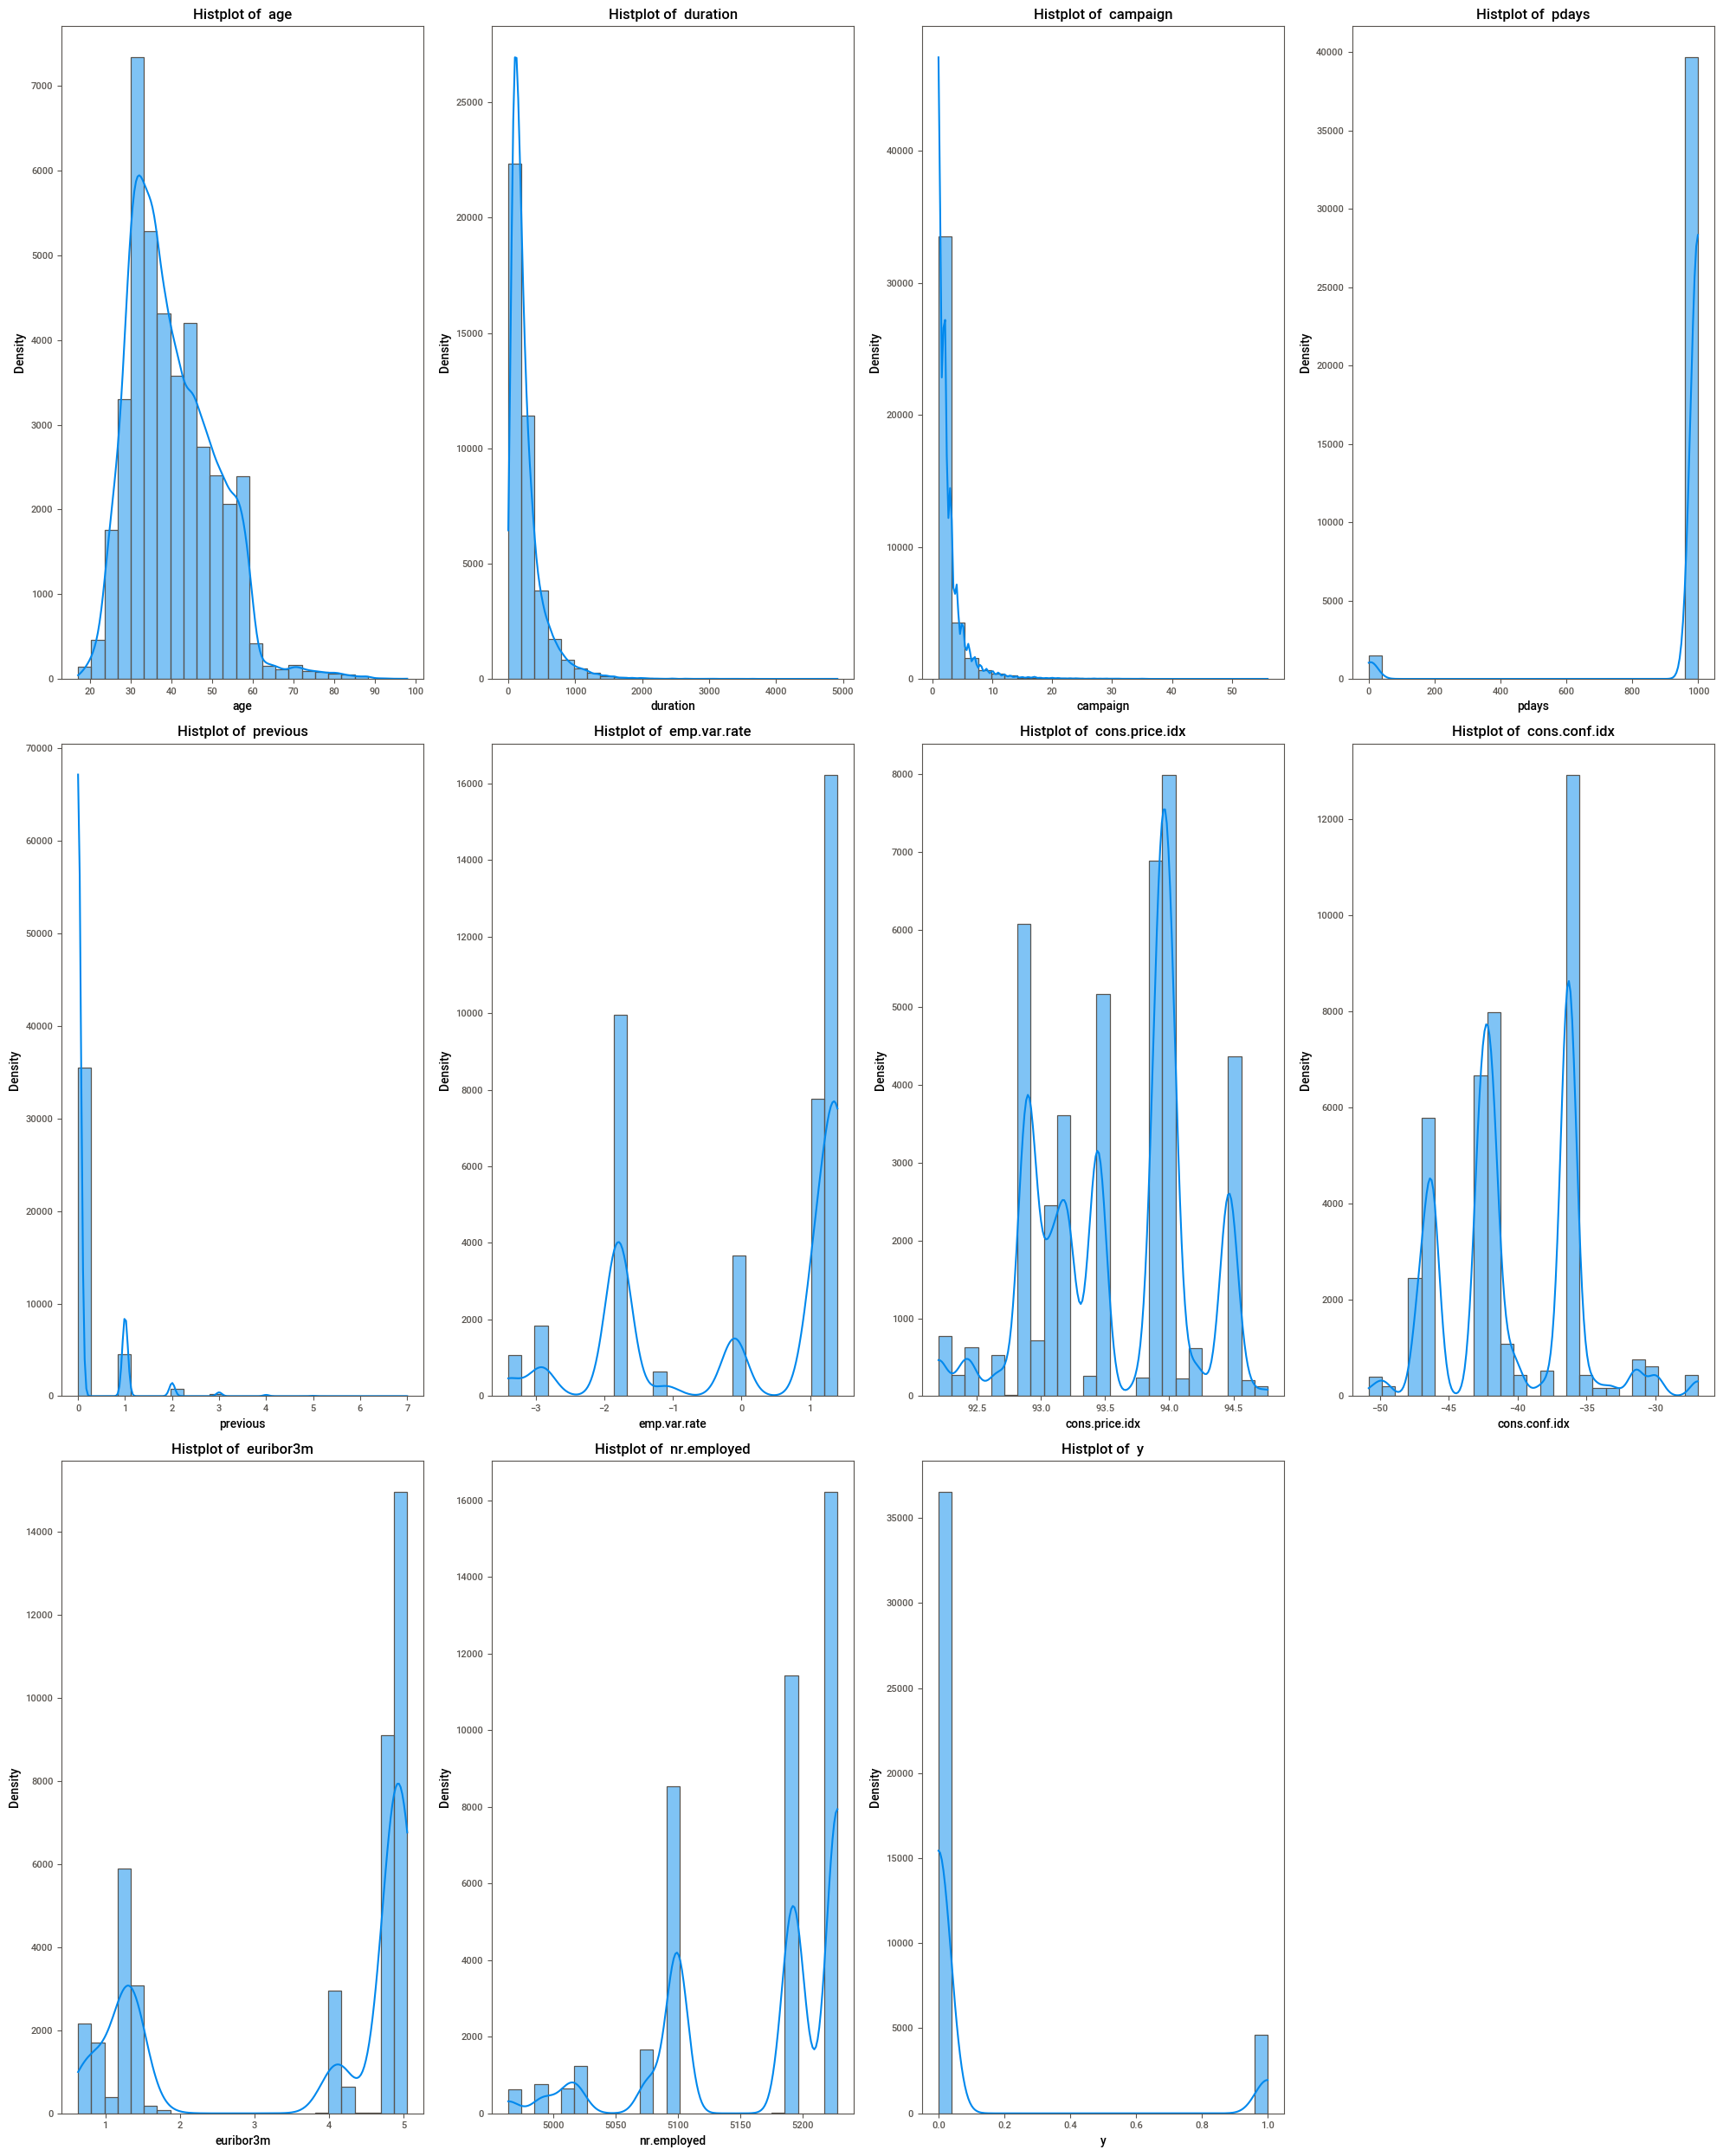

In [21]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in continous_data.columns:
    if plotnumber <= 12:
        plt.subplot(3,4, plotnumber)
        sns.histplot(x = df[column], kde = True, data = df, bins = 25)
        plt.title(f"Histplot of  {column}")
        plt.xlabel(column, fontsize = 10)
        plt.ylabel("Density", fontsize = 10)
        plotnumber += 1

plt.tight_layout()
plt.show()

#### Bivariate Analysis of continous data:

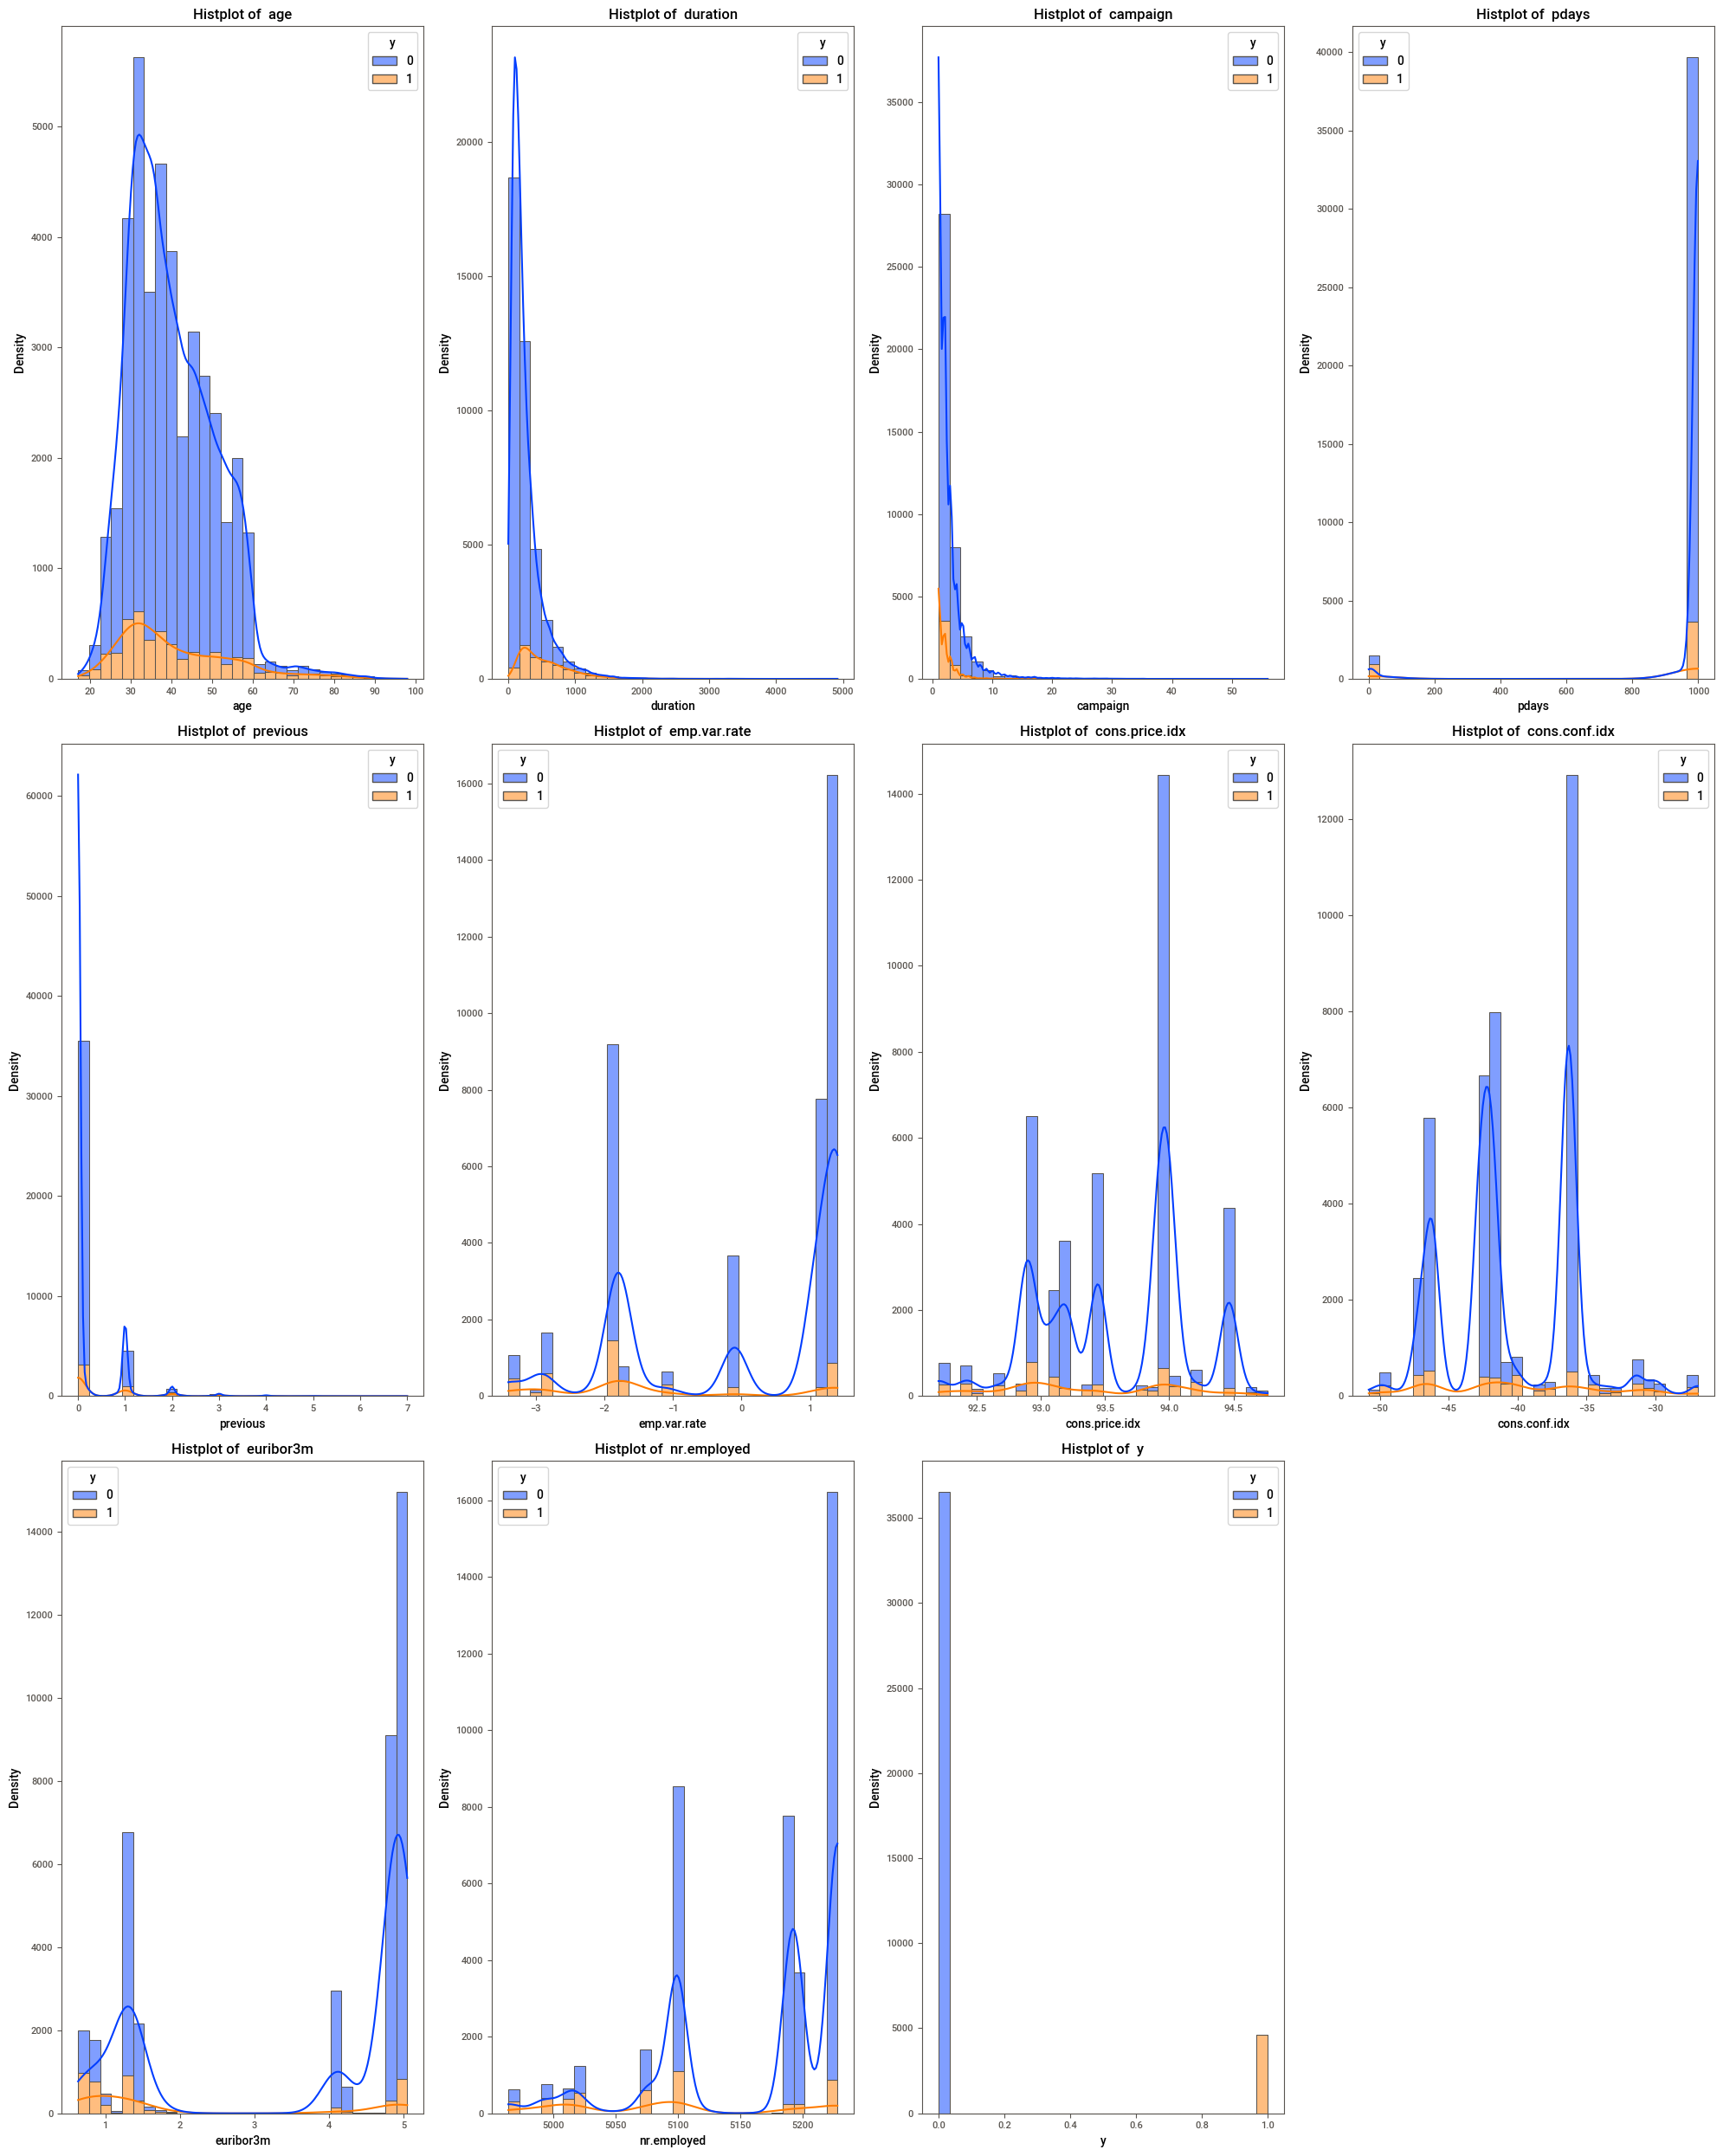

CPU times: total: 17.3 s
Wall time: 12.5 s


In [22]:
%%time
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in continous_data.columns:
    if plotnumber <= 12:
        plt.subplot(3,4, plotnumber)
        sns.histplot(x = df[column], kde = True,hue = df.y, multiple="stack", bins = 30, palette='bright')
        plt.title(f"Histplot of  {column}")
        plt.xlabel(column, fontsize = 10)
        plt.ylabel("Density", fontsize = 10)
        plotnumber += 1

plt.tight_layout()
plt.show()

#### univariate Analysis of Categorical_column:

#### lets separate(slicing) categorical column:

In [23]:
categorical_column = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']]

In [24]:
categorical_column.head()

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome  
0         mon  nonexistent  
1         mon  nonexistent  
2         mon  nonexistent  
3         mon  nonexistent  
4         mon  nonexistent

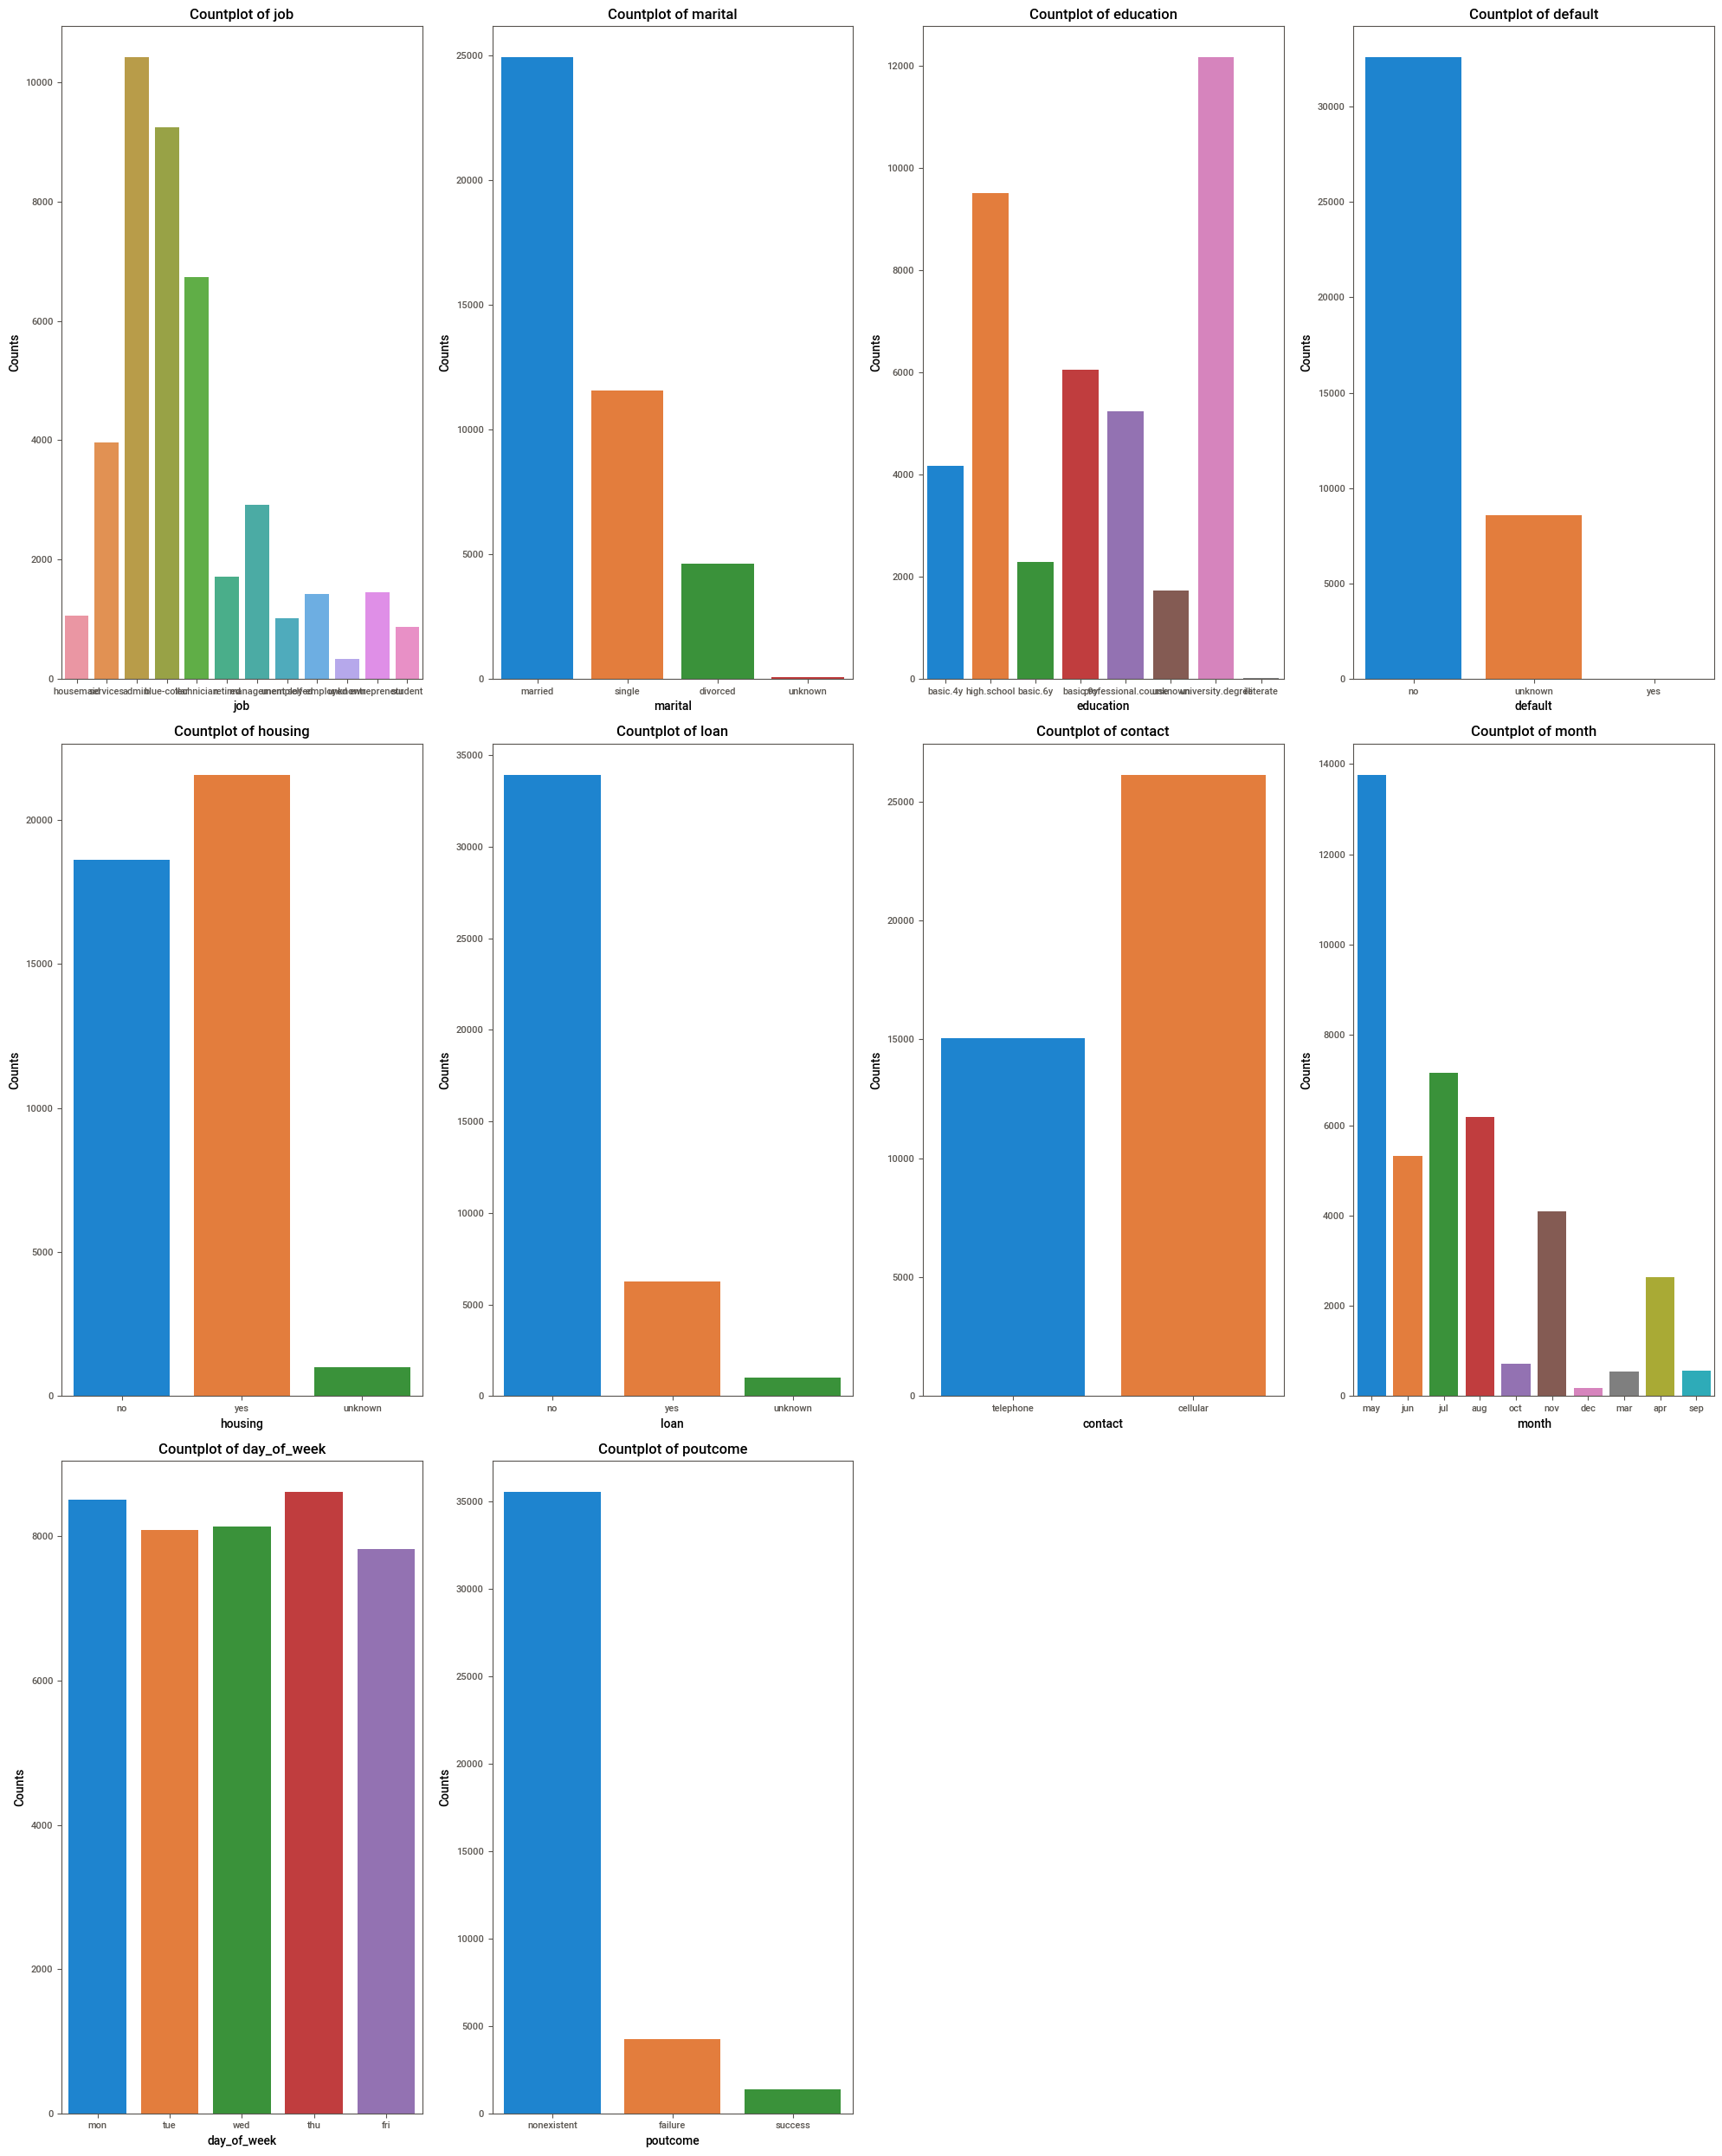

In [25]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in categorical_column.columns:
    if plotnumber <= 10:
        plt.subplot(3,4,plotnumber)
        sns.countplot(x = df[column])
        plt.title(f"Countplot of {column}")
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('Counts', fontsize = 10)
        plotnumber += 1

plt.tight_layout()
plt.show()

#### Insights from Categorical variables (univariate analysis):

1. **Job**:
   - The most common jobs among clients are administrative roles, blue-collar positions, and technician jobs, reflecting a diverse workforce. 
   - Notably, there's a considerable number of clients in service-oriented roles and management positions, indicating a broad spectrum of professions. 
   - However, there are also intriguing cases such as students, individuals with unknown job statuses, and those who are unemployed, warranting further exploration into their financial needs and behaviors.

2. **Marital**:
   - The majority of clients are married, showcasing the significance of family dynamics in financial decision-making. 
   - Conversely, there's a notable segment of single and divorced individuals, highlighting the importance of tailored financial solutions for varying life stages and relationship statuses. 
   - Interestingly, there are a few clients with unknown marital status, suggesting potential challenges in data collection or unique circumstances worth investigating.

3. **Education**:
   - The predominant education level among clients is a university degree, indicating a well-educated customer base with potentially higher financial literacy. 
   - High school graduates also form a substantial portion, underscoring the importance of accessible financial products and education for broader segments of the population. 
   - Nevertheless, there are intriguing outliers such as illiterate individuals and those with unknown educational backgrounds, raising questions about their financial inclusion and support needs.

4. **Default**:
   - The vast majority of clients have no default history, signifying responsible financial behavior and credit management practices.
   - However, there's a notable subset of clients with unknown default status, suggesting potential gaps in data reporting or unique circumstances requiring attention and support.

5. **Housing**:
   - A significant number of clients have housing loans, reflecting a widespread aspiration for homeownership and investment in real estate. 
   - Conversely, there's a substantial cohort of clients without housing loans, showcasing diverse housing situations and financial preferences. 
   - Additionally, there are intriguing cases of clients with unknown housing status, hinting at potential challenges in housing data collection or unique housing arrangements.

6. **Loan**:
   - The majority of clients do not have personal loans, indicating prudent borrowing habits and financial stability.
   - However, there's also a notable portion of clients with loans, suggesting varying degrees of debt management and financial risk tolerance.
   - Furthermore, clients with unknown loan status raise questions about data completeness and the need for comprehensive financial profiling.

7. **Contact**:
   - The preferred mode of contact for most clients is cellular communication, reflecting the ubiquitous use of mobile devices and digital connectivity.
   - Nevertheless, there's still a considerable segment of clients reached via telephone, emphasizing the importance of multi-channel communication strategies for effective outreach and engagement.

8. **Month**:
   - May emerges as the busiest month for client contacts, possibly due to seasonal trends or strategic marketing campaigns.
   - Conversely, December experiences the lowest contact volume, suggesting potential opportunities for targeted year-end promotions or client engagement initiatives.

9. **Day of Week**:
   - Thursdays see the highest number of client contacts, indicating a peak period for engagement and interaction.
   - Meanwhile, Fridays witness slightly fewer contacts, presenting opportunities for targeted outreach or campaign optimization strategies to maximize response rates.

10. **Poutcome**:
    - The majority of previous marketing campaign outcomes were categorized as nonexistent, indicating a large portion of clients who were not previously contacted.
    - However, there are also instances of failure and success outcomes, providing valuable insights into campaign effectiveness and client response patterns.

*** Job ***
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


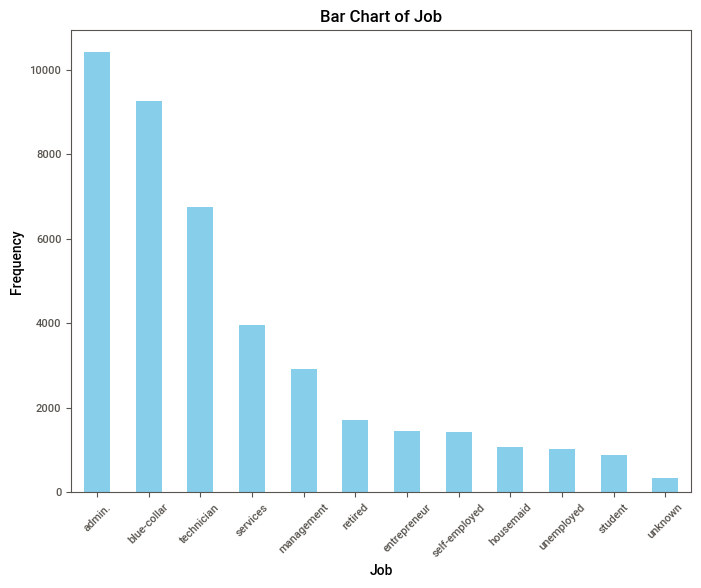

*** Marital ***
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64


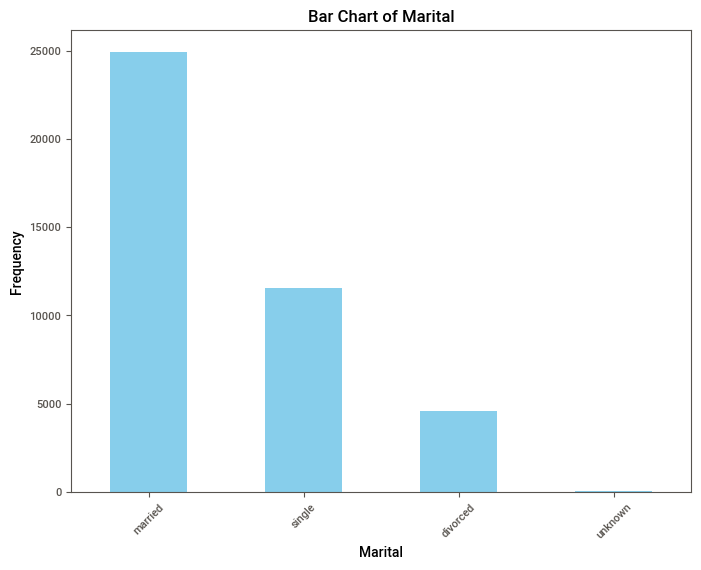

*** Education ***
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64


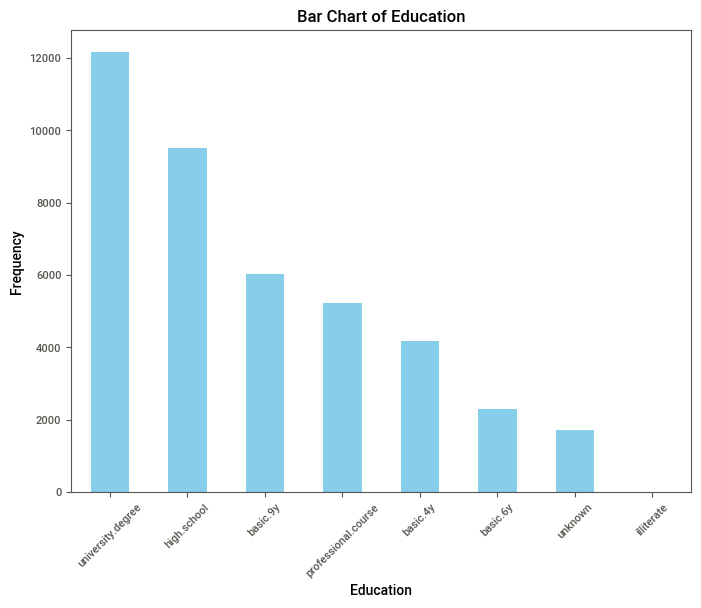

*** Default ***
no         32577
unknown     8596
yes            3
Name: default, dtype: int64


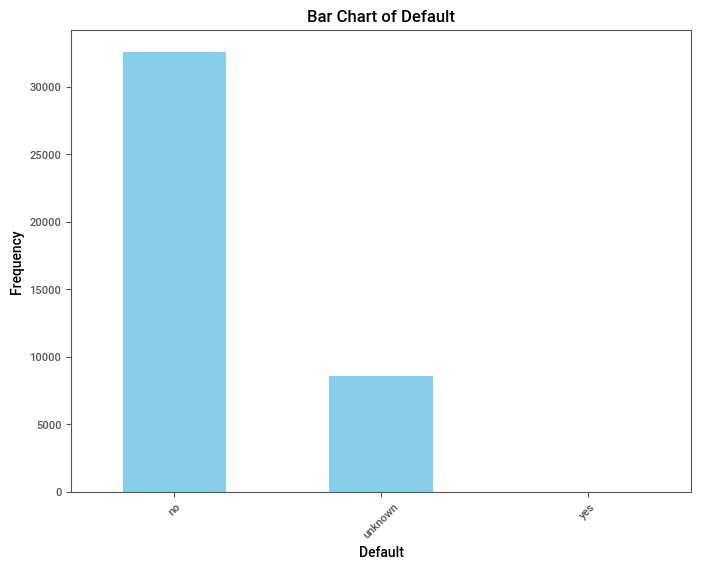

*** Housing ***
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64


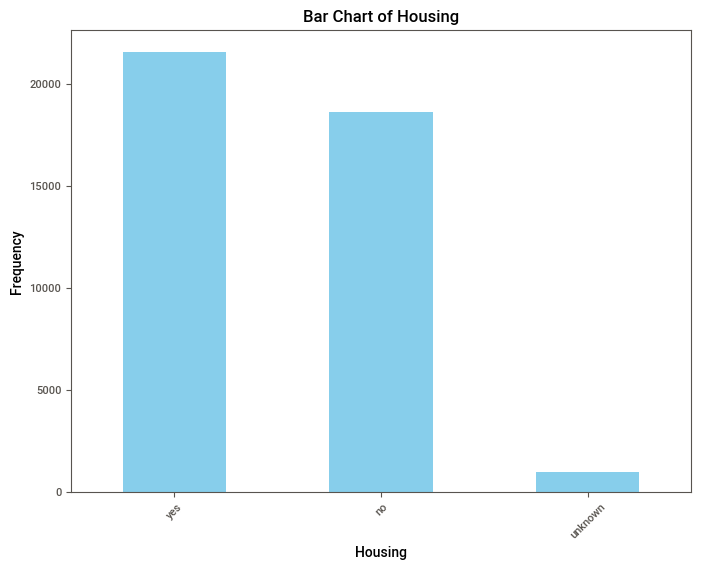

*** Loan ***
no         33938
yes         6248
unknown      990
Name: loan, dtype: int64


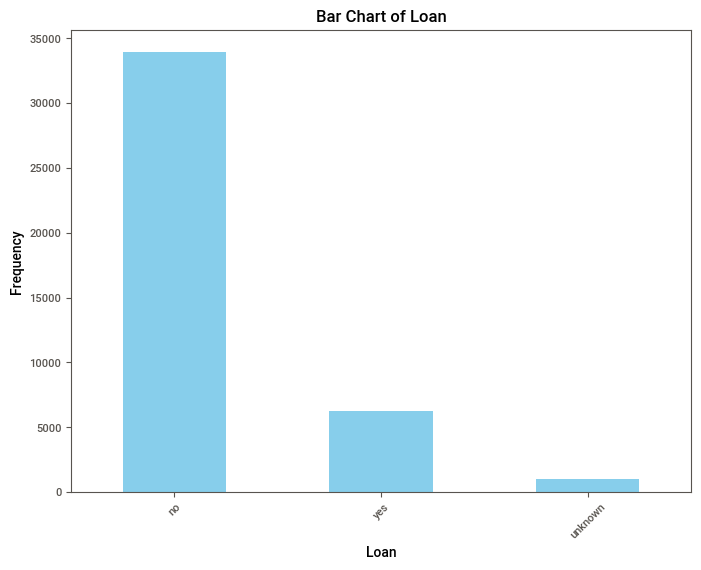

*** Contact ***
cellular     26135
telephone    15041
Name: contact, dtype: int64


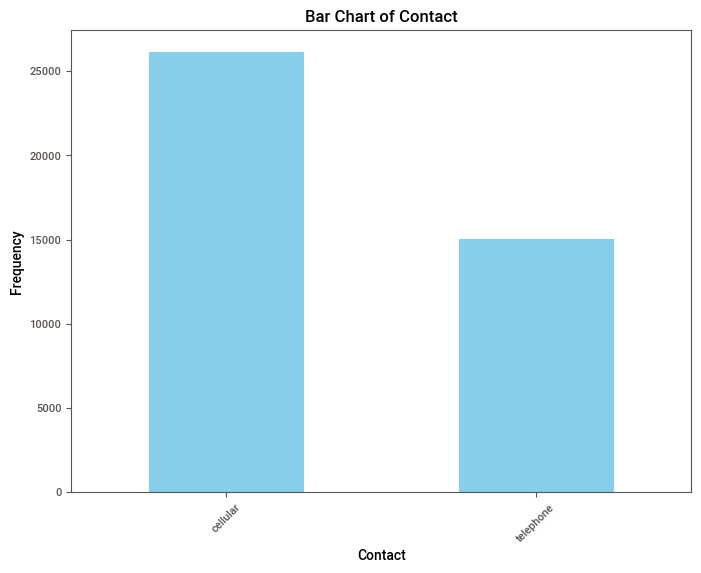

*** Month ***
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64


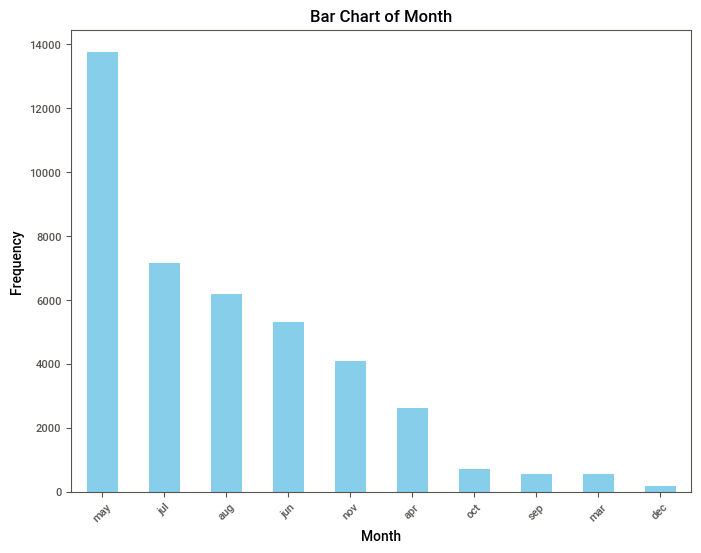

*** Day_of_week ***
thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64


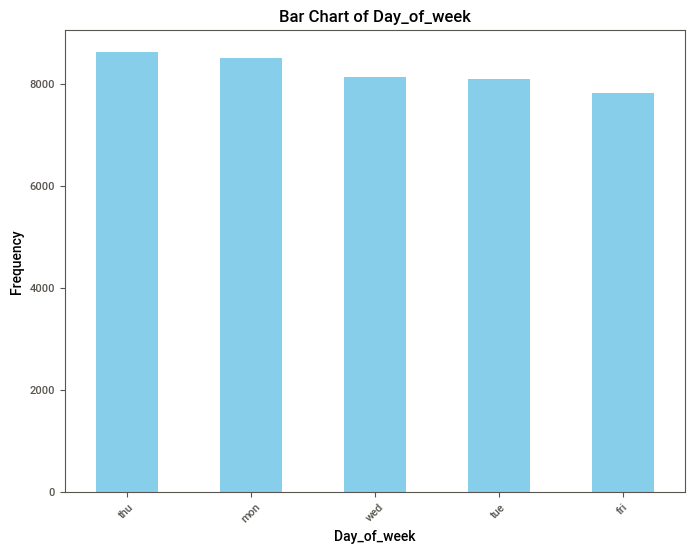

*** Poutcome ***
nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64


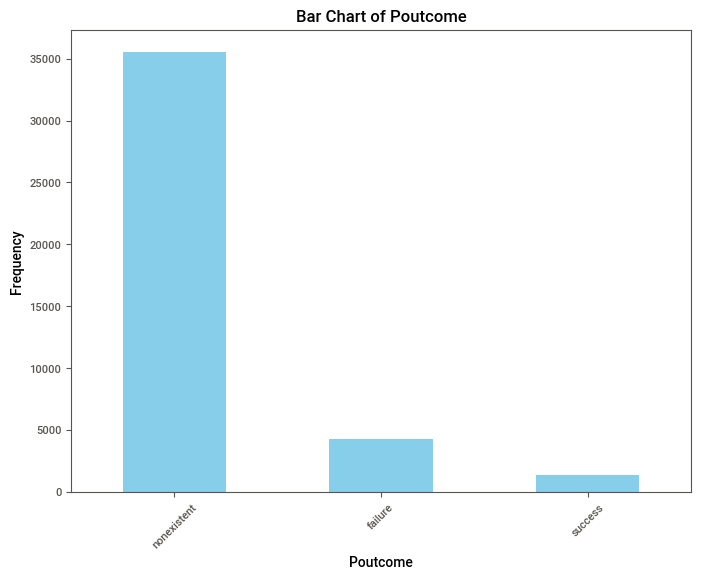

In [26]:
for variable in categorical_column:
    print(f"*** {variable.capitalize()} ***")
    
    # Calculate value counts
    value_counts = df[variable].value_counts()
    print(value_counts)
    

    value_counts.plot(kind='bar', figsize=(8, 6), color='skyblue')
    plt.title(f"Bar Chart of {variable.capitalize()}")
    plt.xlabel(variable.capitalize())
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

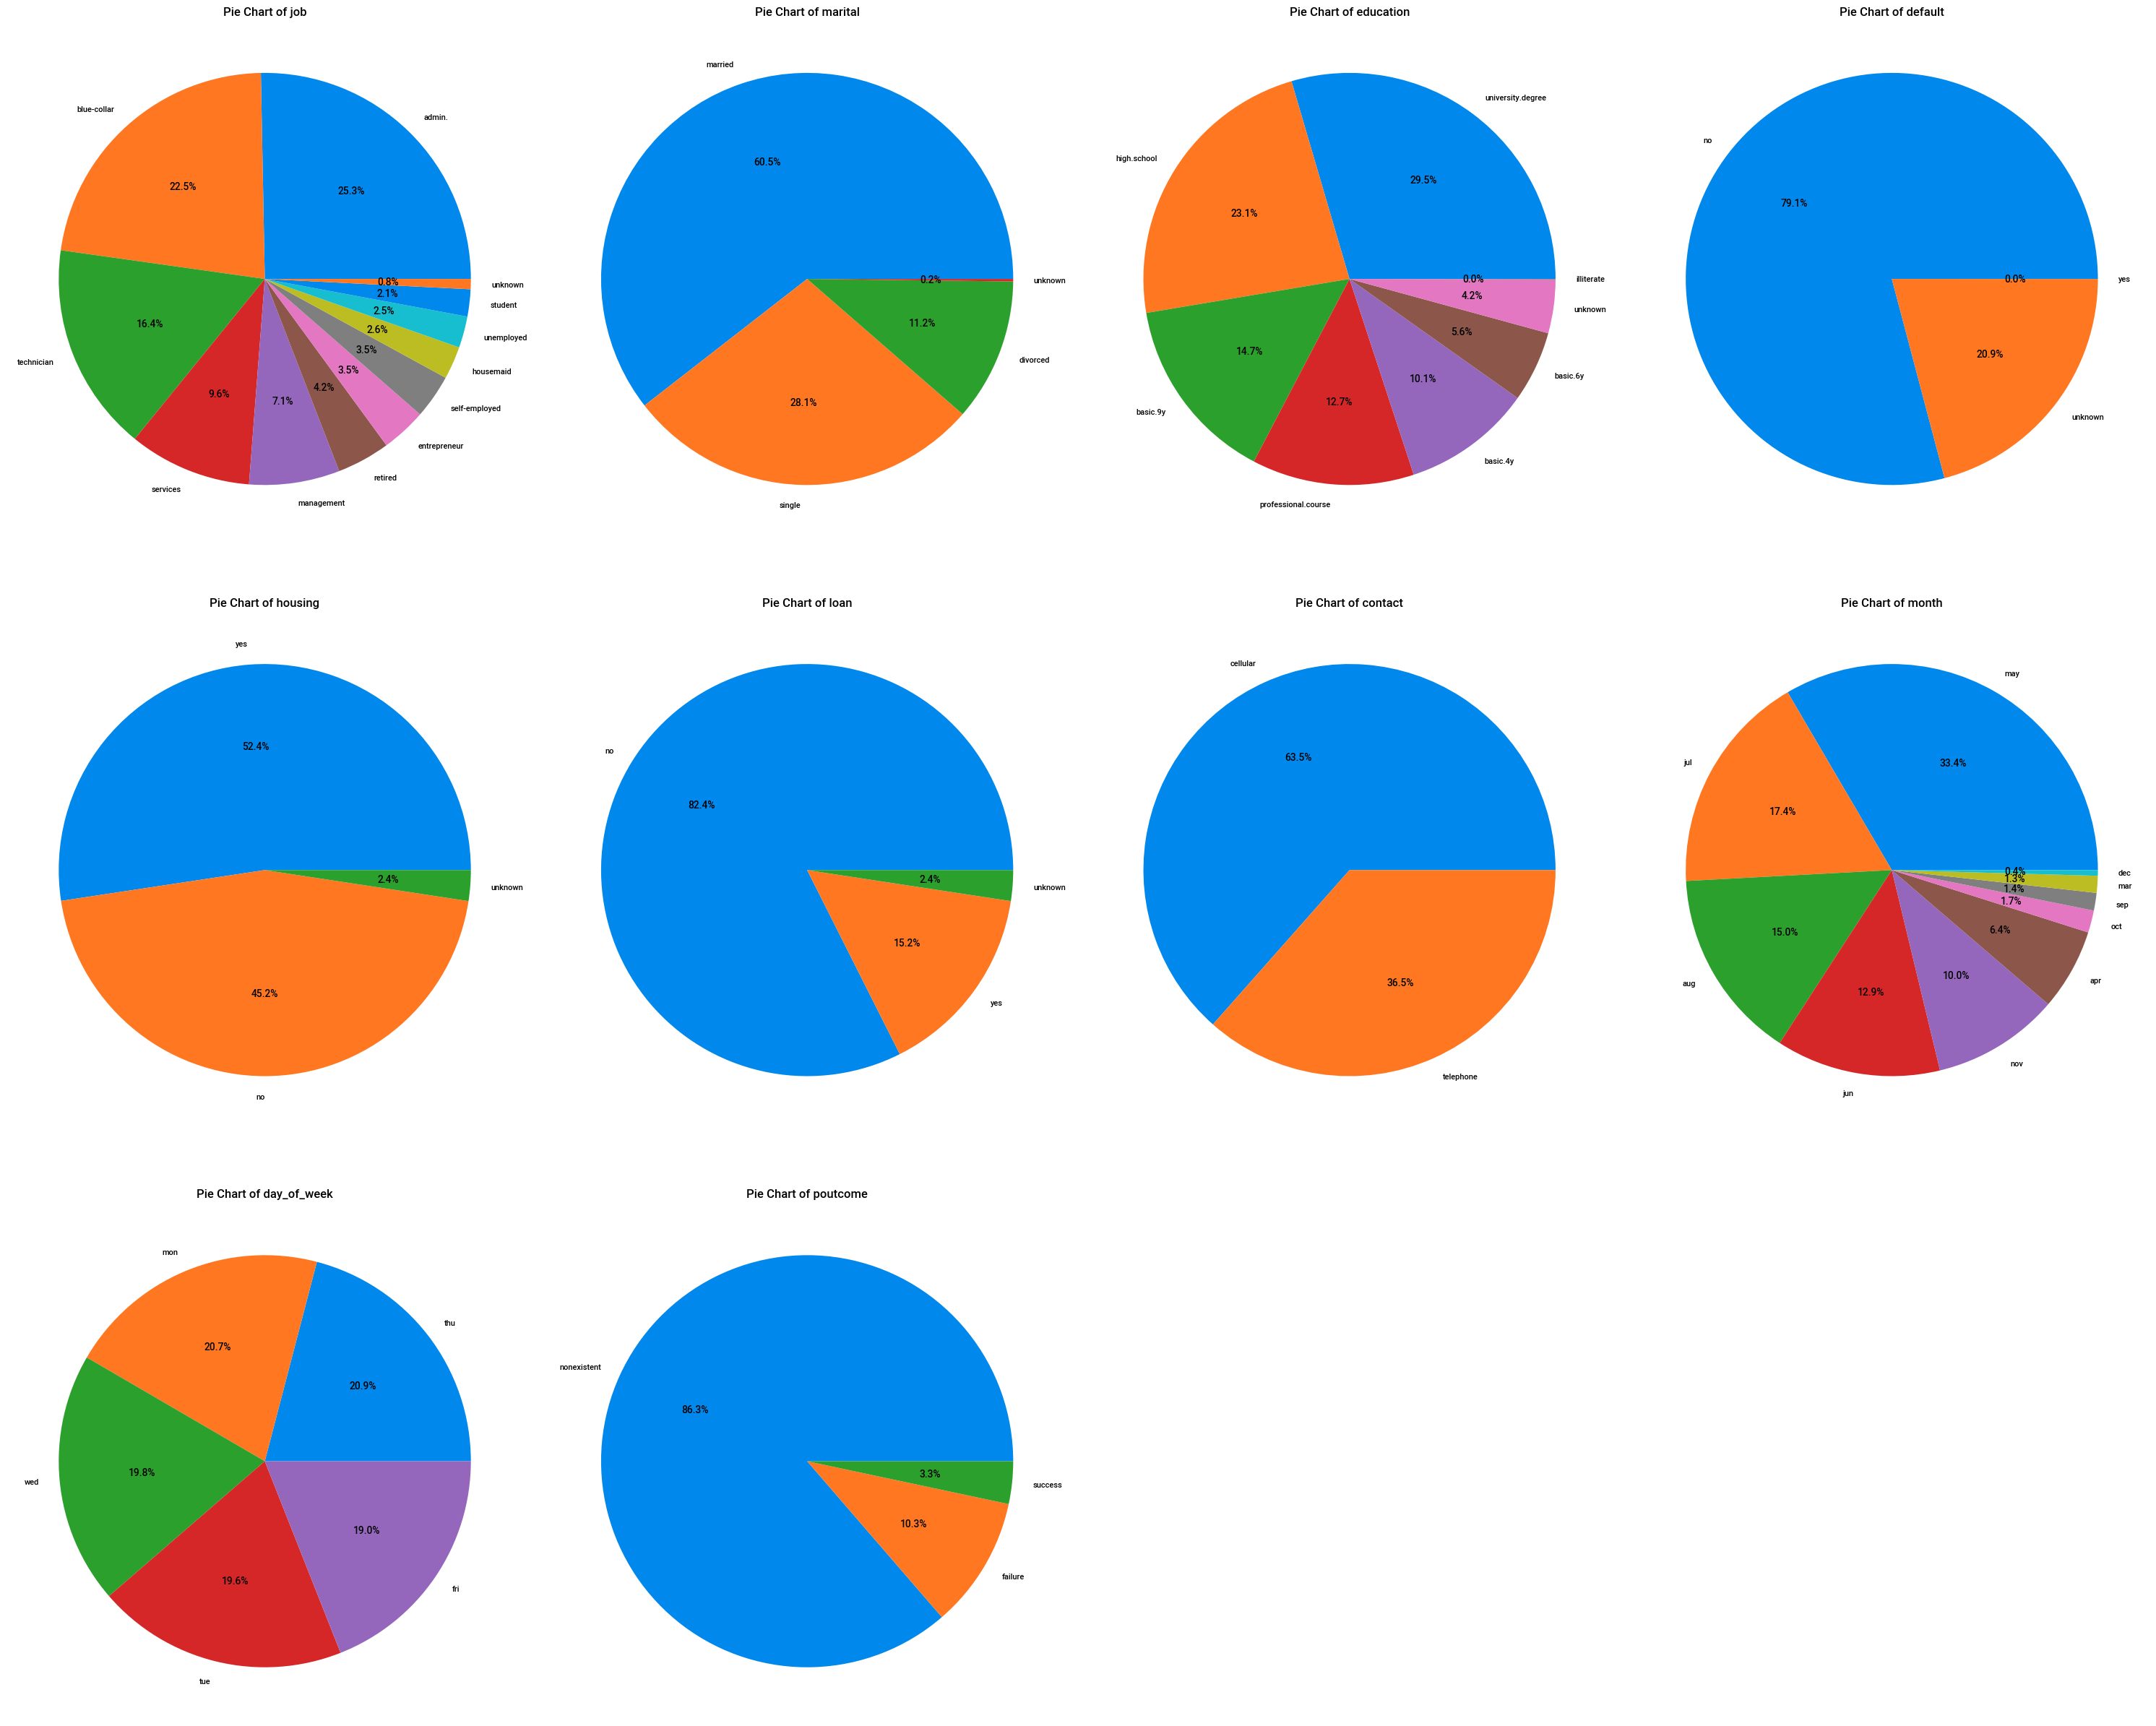

In [27]:
plt.figure(figsize=(30, 25), facecolor='white')
plotnumber = 1
for column in categorical_column.columns:
    if plotnumber <= 10:
        plt.subplot(3, 4, plotnumber)
        counts = df[column].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
        plt.title(f"Pie Chart of {column}")
        plotnumber += 1

plt.tight_layout()
plt.show()

#### Bivariate Analysis of Categorical_columns:

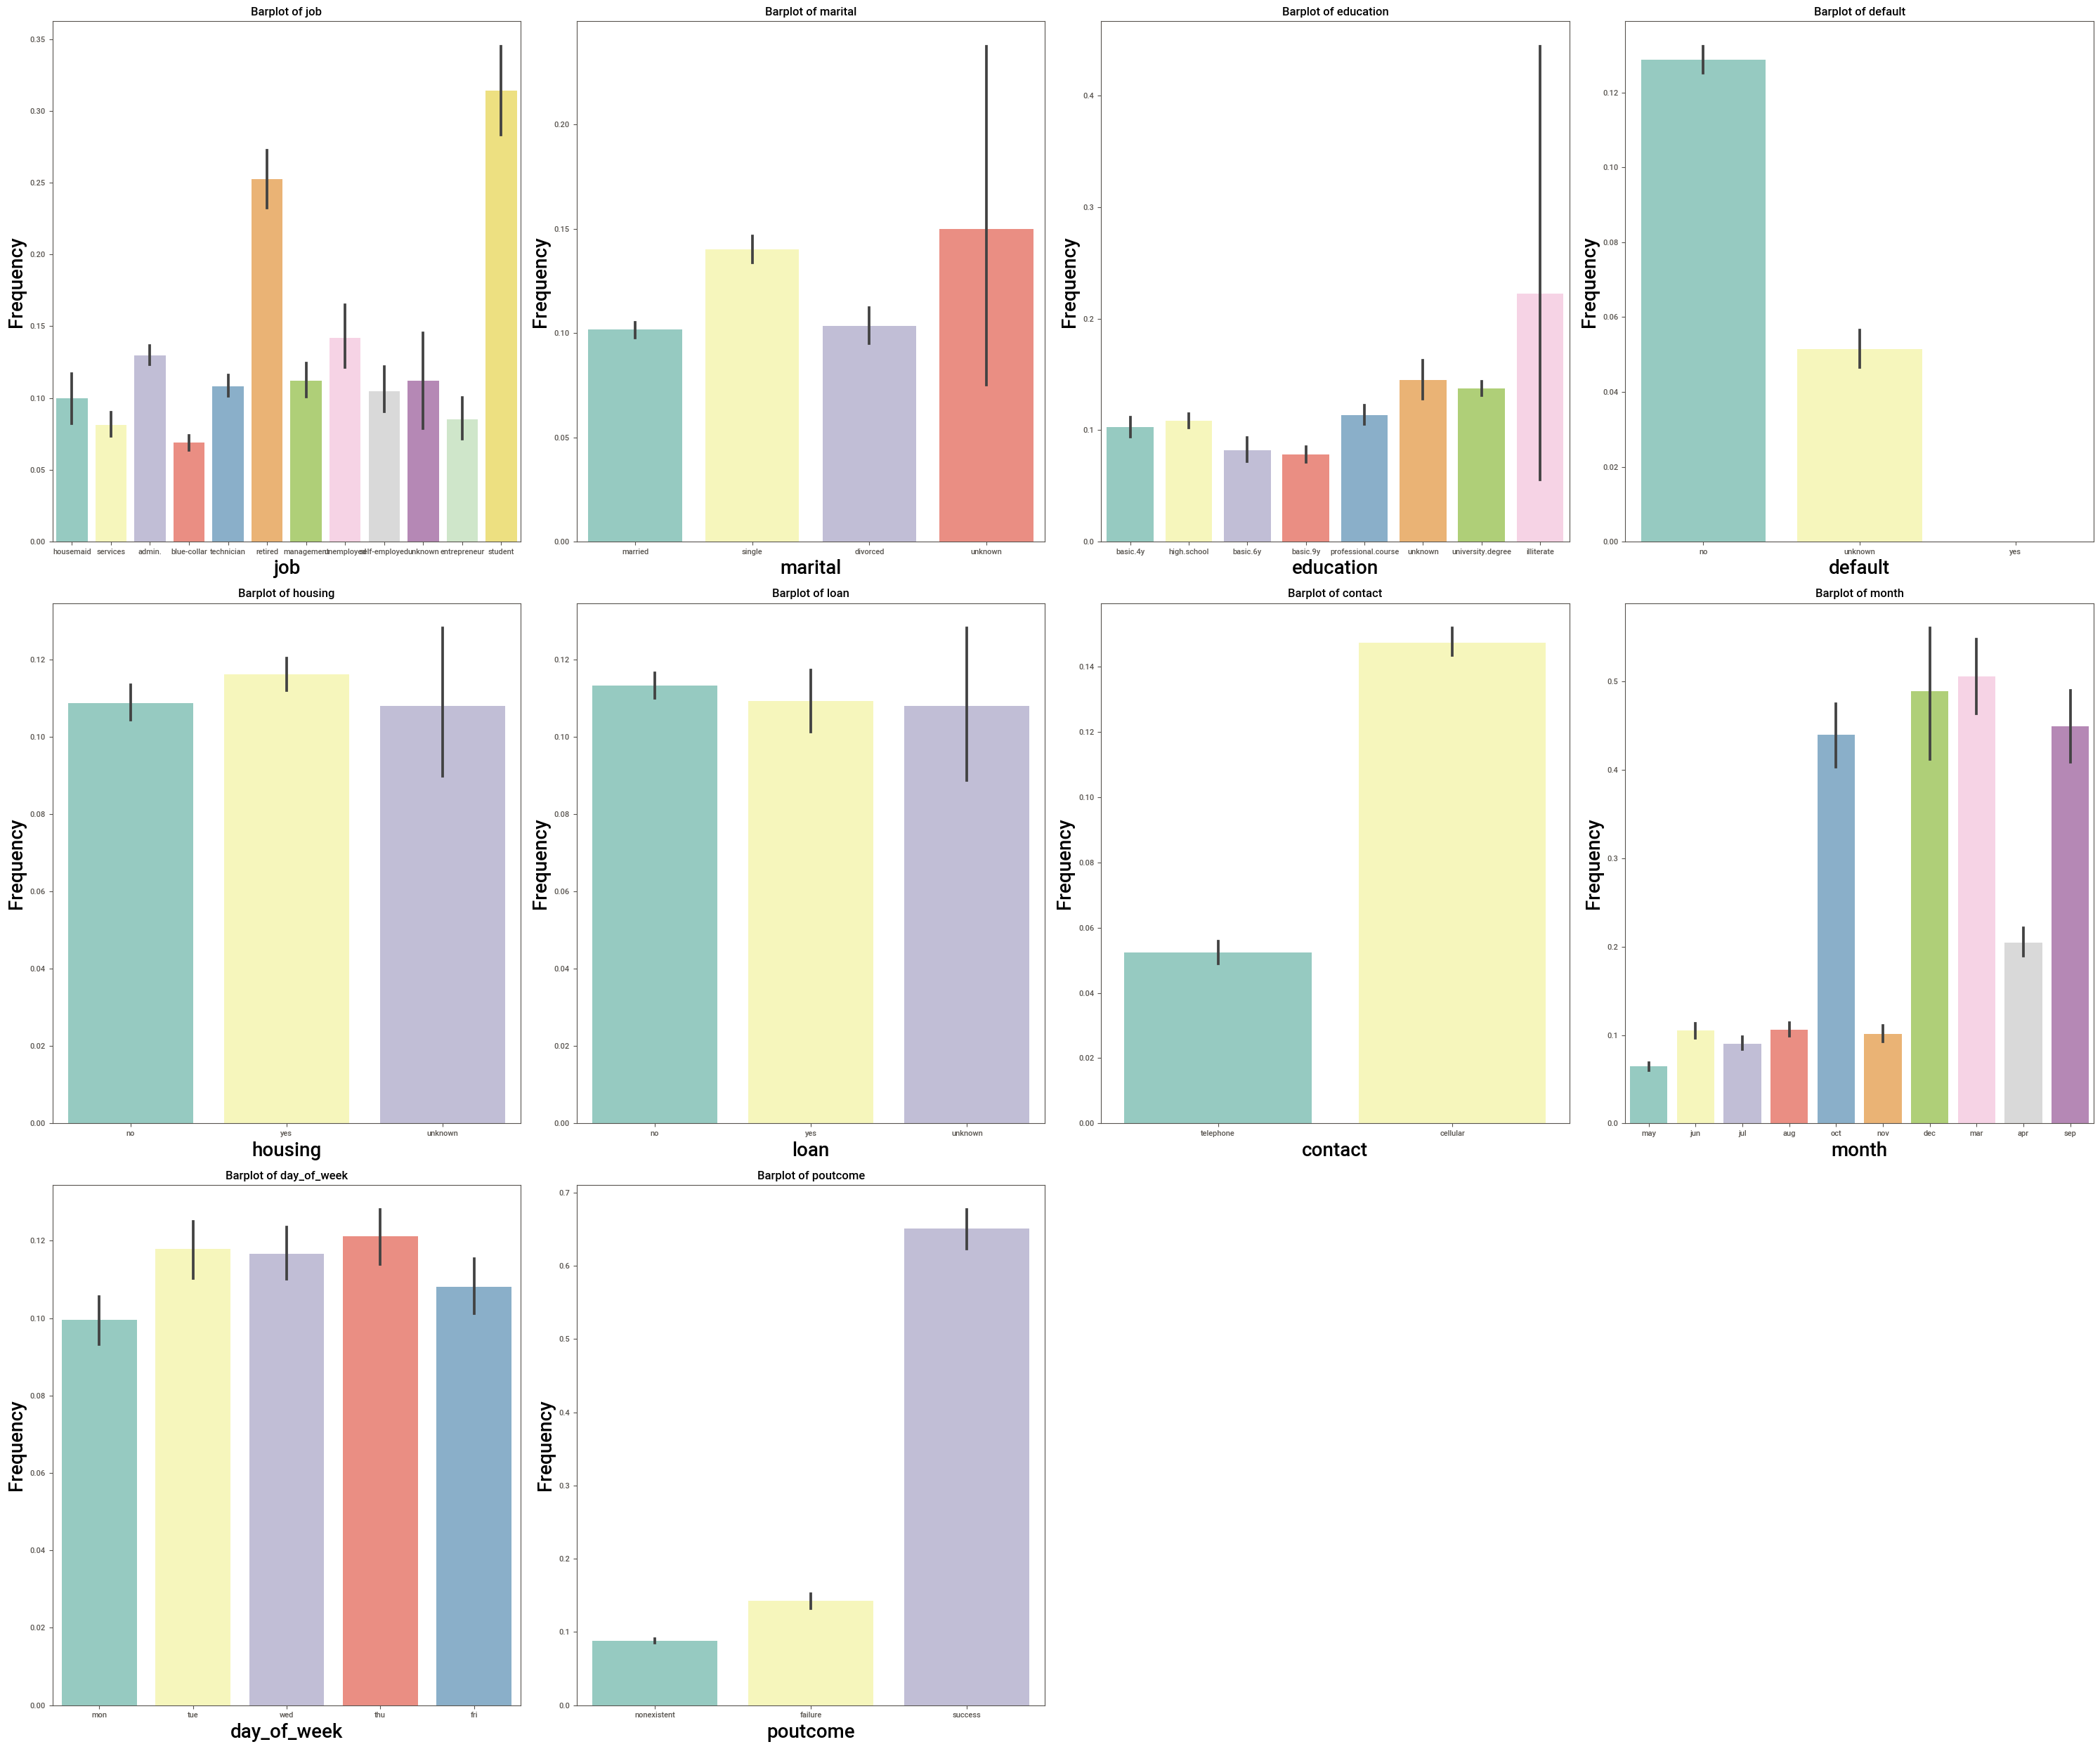

In [28]:
plt.figure(figsize = (30, 25), facecolor = 'white')
plotnumber = 1
for column in categorical_column.columns:
    if plotnumber<= 12:
        plt.subplot(3,4,plotnumber)
        sns.barplot(x = df[column], y = df.y, palette='Set3')
        plt.title(f"Barplot of {column}")
        plt.xlabel(column, fontsize = 20)
        plt.ylabel("Frequency", fontsize = 20)
        plotnumber += 1

plt.tight_layout()
plt.show()

Subscription behavior analysis by job category reveals varied responses: administration and management roles show moderate interest, while blue-collar workers and entrepreneurs display lower subscription rates. Retired individuals tend to subscribe more, whereas self-employed and unemployed individuals show limited interest.

Among marital statuses, married individuals constitute the largest group with significant interest, but diverse responses are evident within this group. Divorced and single individuals also show interest, while those with unknown marital status engage minimally.

Regarding education levels, university degree holders show notable interest, while high school graduates also display interest. However, substantial portions of both groups did not subscribe, indicating varied responses. Basic education levels exhibit lower subscription rates, suggesting potential differences in financial priorities or campaign receptiveness.

Examining default status, individuals without defaults demonstrate significant interest, but notable non-subscriber numbers are also observed. Those with unknown default status show some interest, while instances of defaults are minimal.

In terms of housing status, individuals with and without housing loans both show notable interest, suggesting diverse engagement patterns.

Regarding loans, individuals without personal loans and those with loans both display interest, indicating potential marketing opportunities in both segments.

Clients contacted via cellular communication show notable interest, while fewer subscriptions are observed among those contacted via telephone, highlighting the importance of leveraging preferred communication channels.

Subscription behavior by month reveals varied patterns, with May showing the highest non-subscriber count but also significant interest. March and December exhibit relatively higher subscription rates, while June has moderate engagement, emphasizing the need for strategic timing of marketing efforts.

Analyzing subscription behavior by the day of the week indicates varying engagement levels across different days, with Thursdays and Tuesdays showing high engagement despite notable non-subscriber counts.

Previous campaign outcomes also influence subscription rates, with successful outcomes yielding the highest subscription rate. Clients with nonexistent outcomes demonstrate significant interest, while those with failed outcomes show moderate interest. Adjusting strategies based on previous campaign outcomes can enhance engagement and subscription rates.

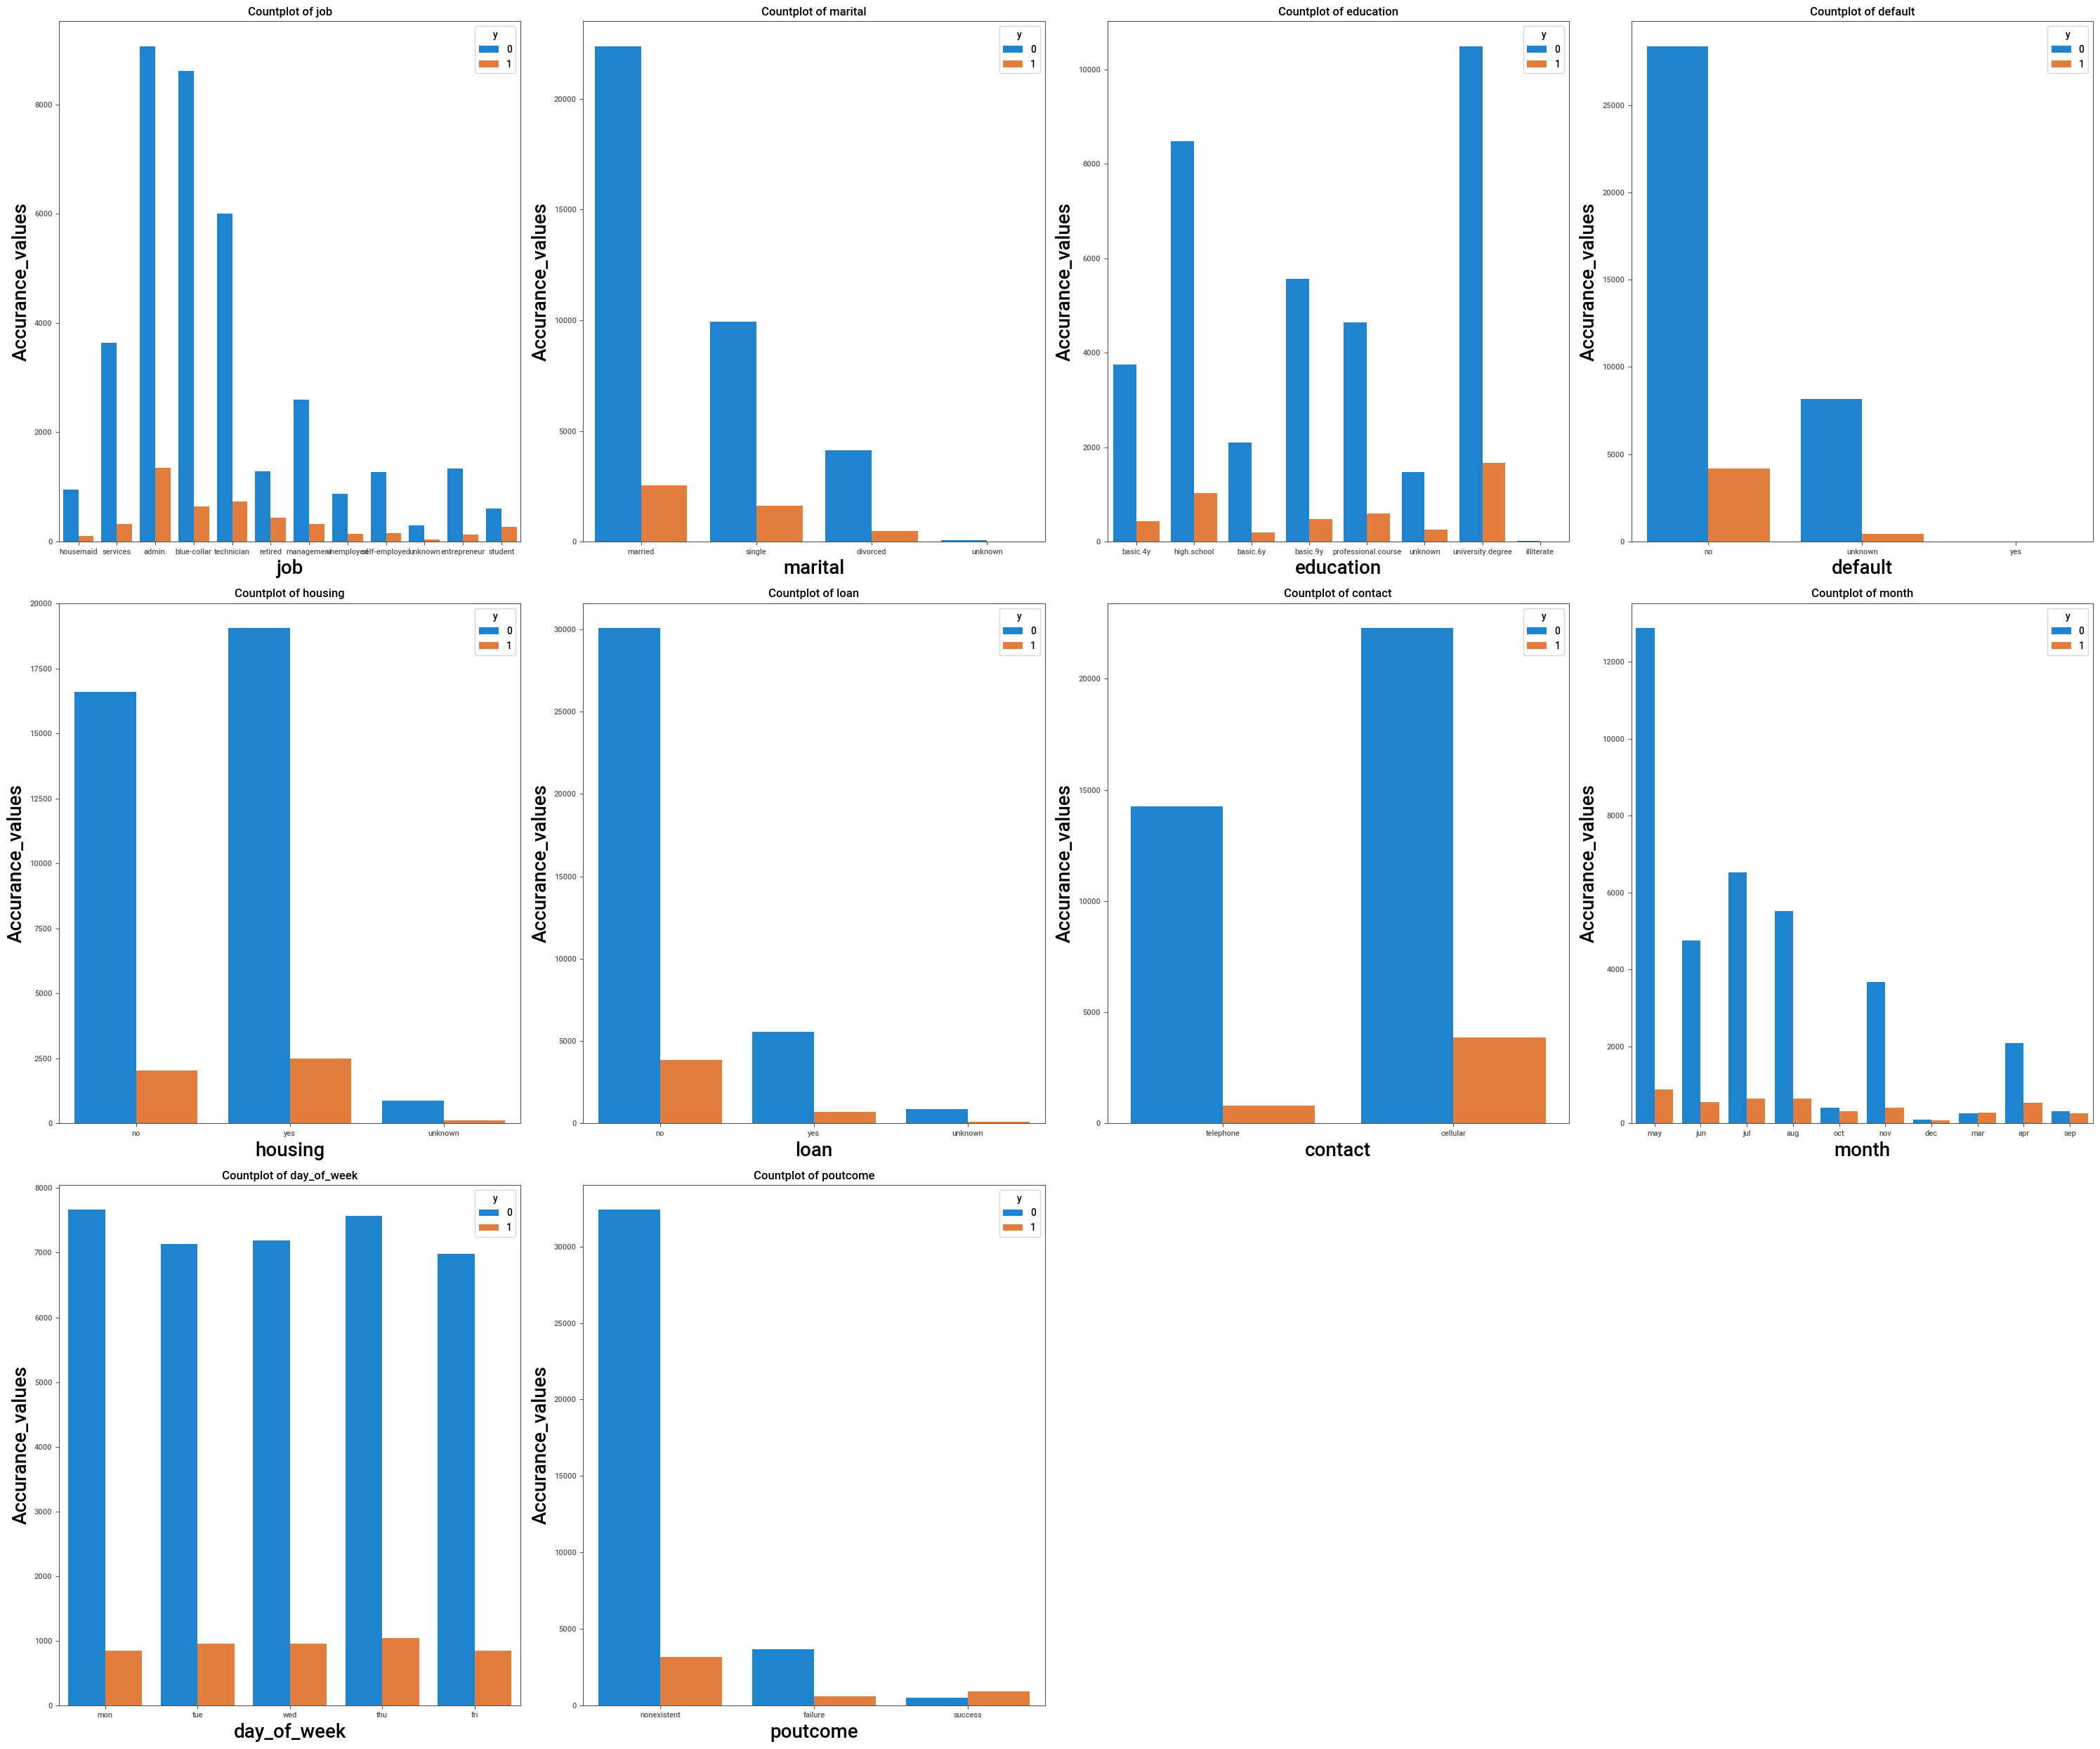

In [29]:
plt.figure(figsize = (30, 25), facecolor = 'white')
plotnumber = 1
for column in categorical_column.columns:
    if plotnumber <= 12:
        plt.subplot(3,4,plotnumber)
        sns.countplot(x = df[column], hue = df.y)
        plt.title(f"Countplot of {column}")
        plt.xlabel(column, fontsize = 20)
        plt.ylabel("Accurance_values", fontsize = 20)
        plotnumber += 1

plt.tight_layout()
plt.show()

#### Categorical Variable using bivariate Analysis:

****Job*******


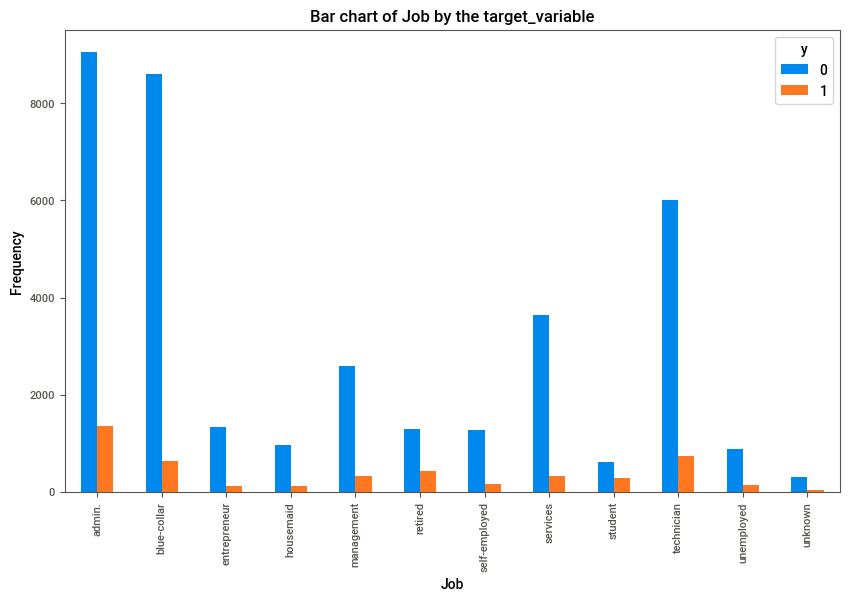

****Marital*******


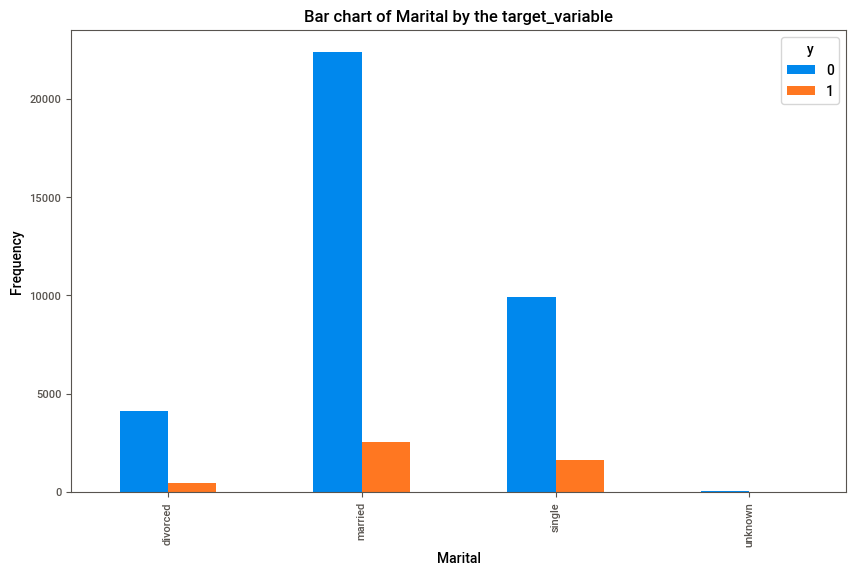

****Education*******


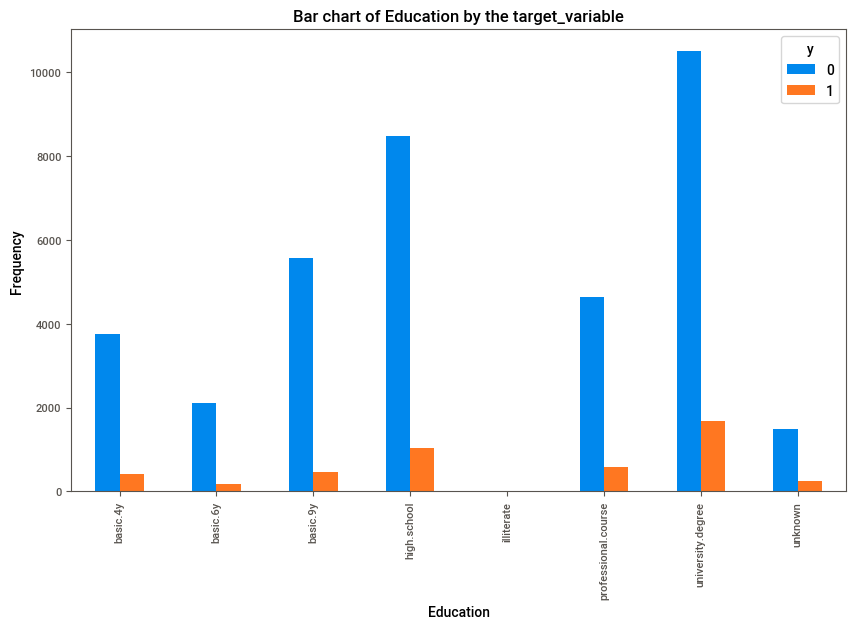

****Default*******


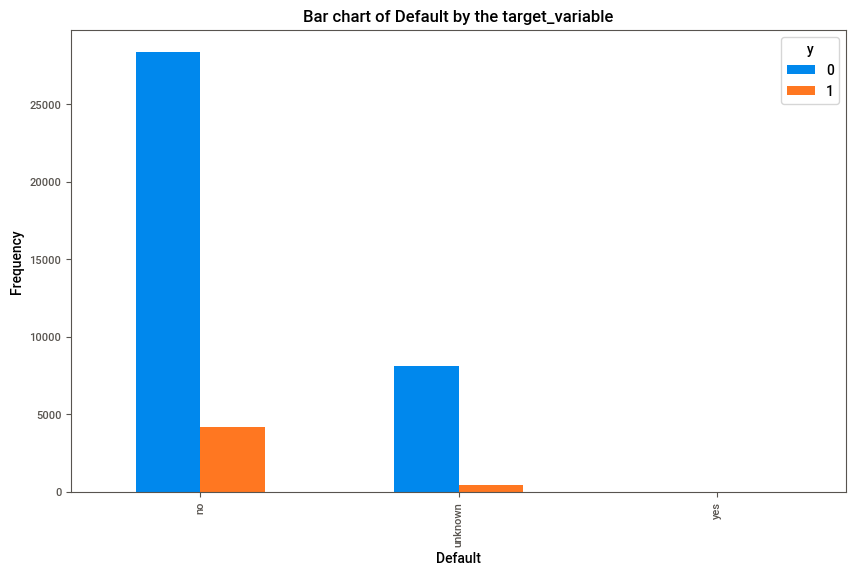

****Housing*******


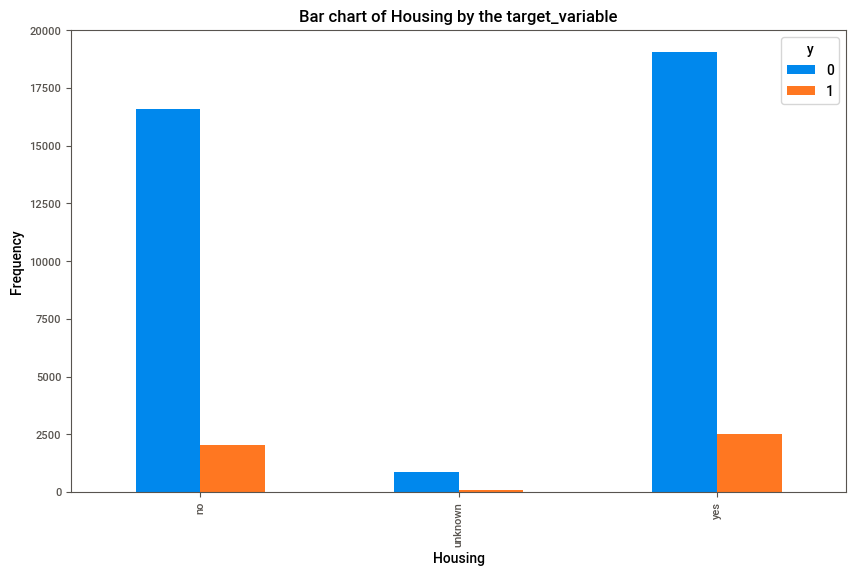

****Loan*******


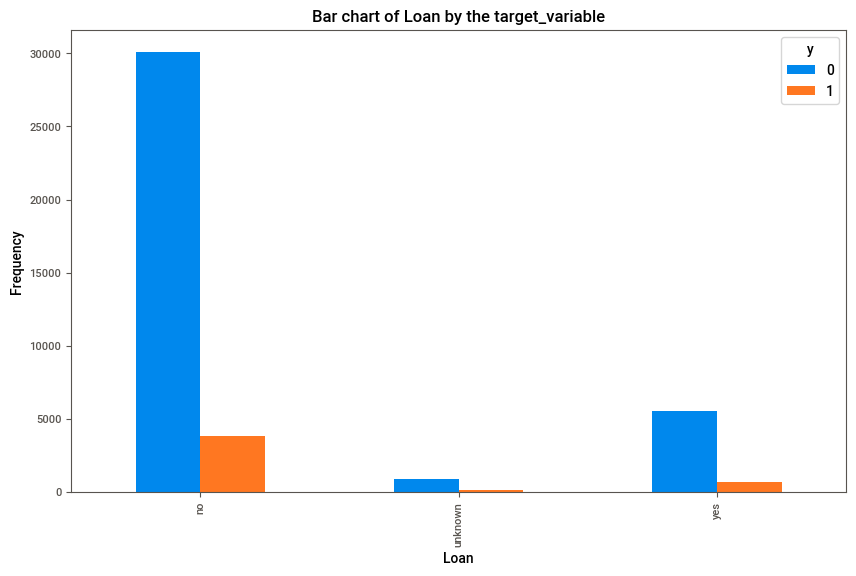

****Contact*******


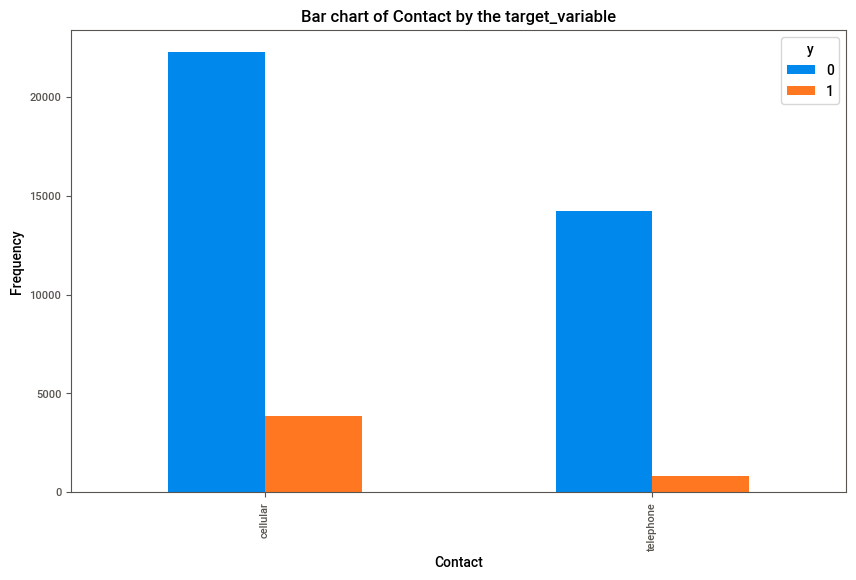

****Month*******


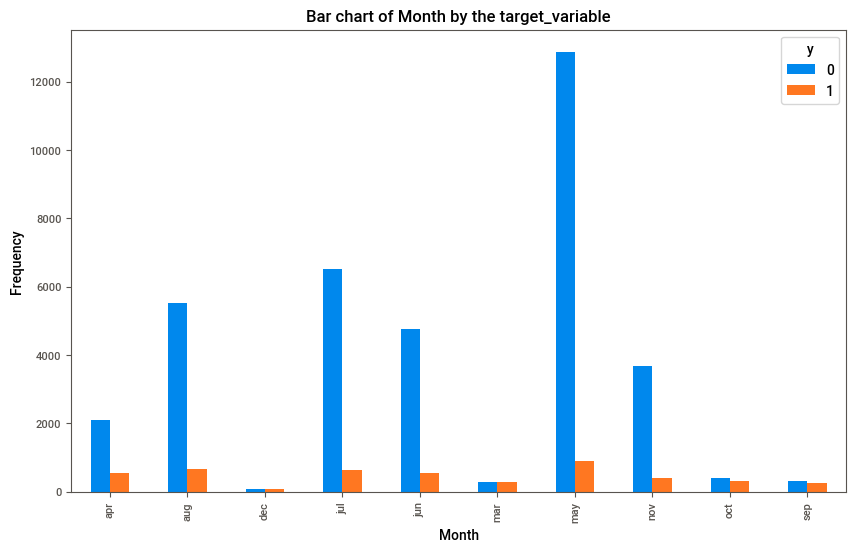

****Day_of_week*******


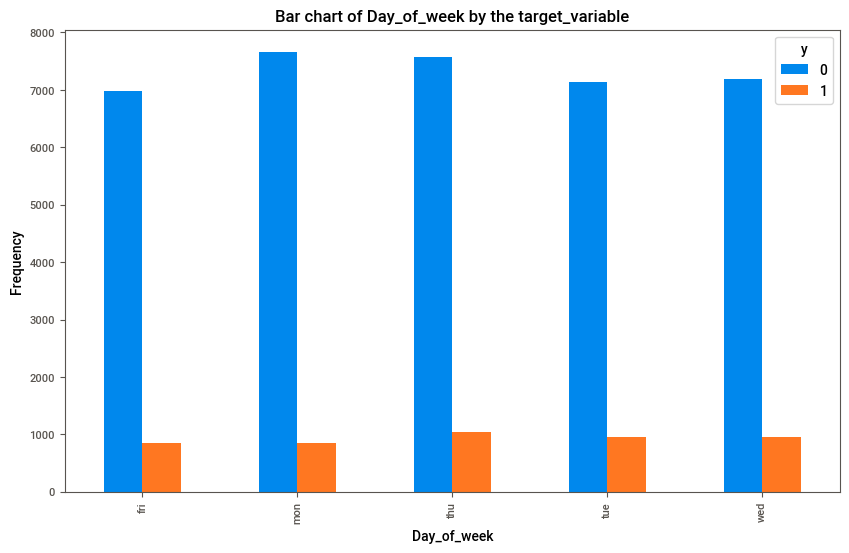

****Poutcome*******


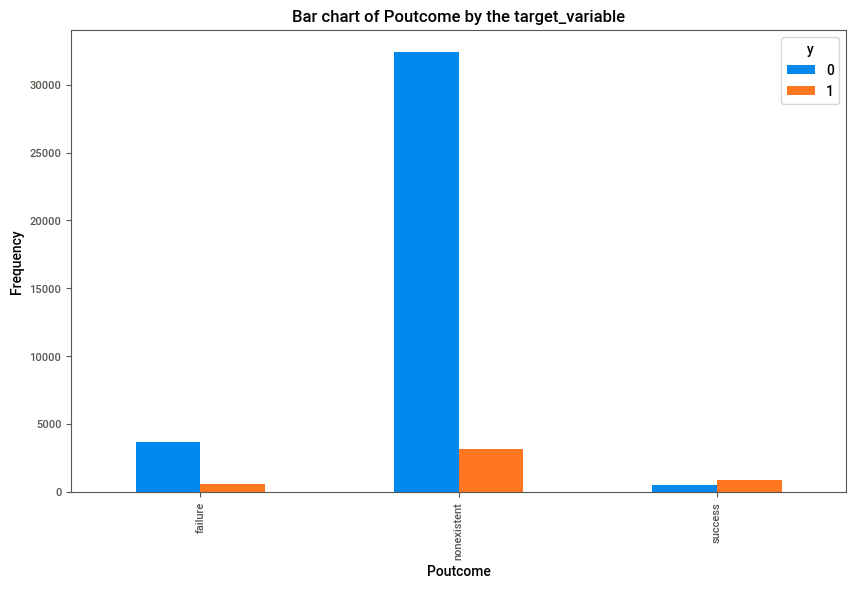

In [30]:
for feature in categorical_column.columns:
    print(f"****{feature.capitalize()}*******")

    group_counts = df.groupby([feature, 'y']).size().unstack()
    # print(group_counts)
    group_counts.plot(kind = 'bar',figsize = (10, 6))
    plt.title(f"Bar chart of {feature.capitalize()} by the target_variable")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Frequency")
    plt.show()

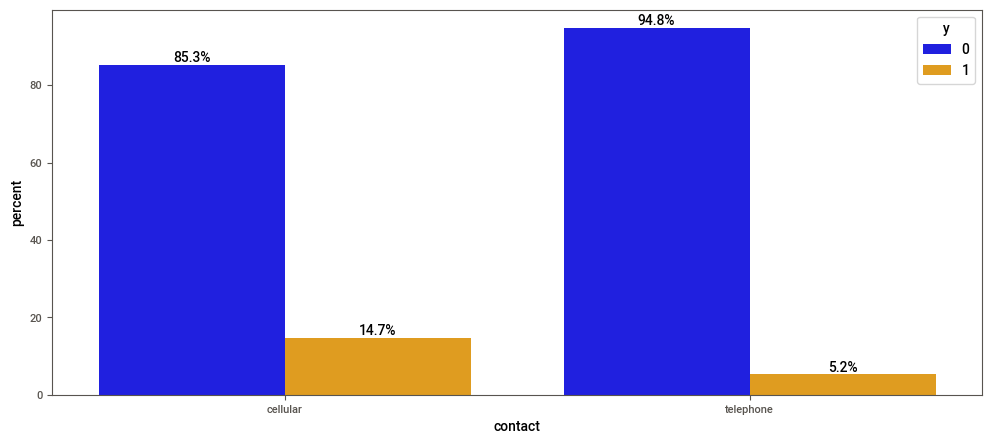

In [31]:
plt.figure(figsize=(12, 5))

# Calculate percentages
data_contact = (
    df.groupby("contact")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percent")
    .reset_index()
)

# Assign colors based on 'y' values
colors = {0: "blue", 1: "orange"}

# Create the barplot with specified colors
ax = sns.barplot(x="contact", y="percent", hue="y", data=data_contact, palette=colors)

# Iterate through each bar container and add labels
for container in ax.containers:
    labels = [f"{pct:.1f}%" for pct in container.datavalues]
    ax.bar_label(container, labels, fmt="%s")  # Customize format if needed

plt.show()

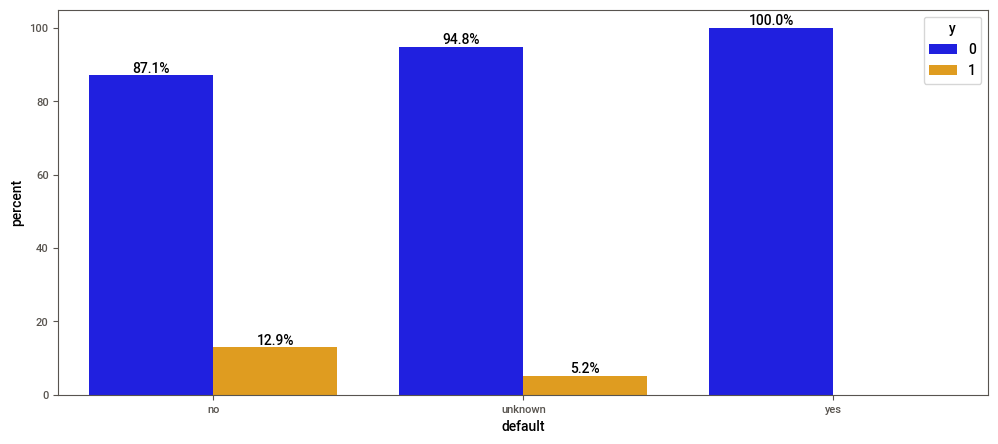

In [32]:
plt.figure(figsize=(12, 5))

# Calculate percentages
data_default = (
    df.groupby("default")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percent")
    .reset_index()
)

# Assign colors based on 'y' values
colors = {0: "blue", 1: "orange"}


# Create the barplot with specified colors
ax = sns.barplot(x="default", y="percent", hue="y", data=data_default, palette=colors)

# Iterate through each bar container and add labels
for container in ax.containers:
    labels = [f"{pct:.1f}%" for pct in container.datavalues]
    ax.bar_label(container, labels, fmt="%s")  # Customize format if needed

plt.show()

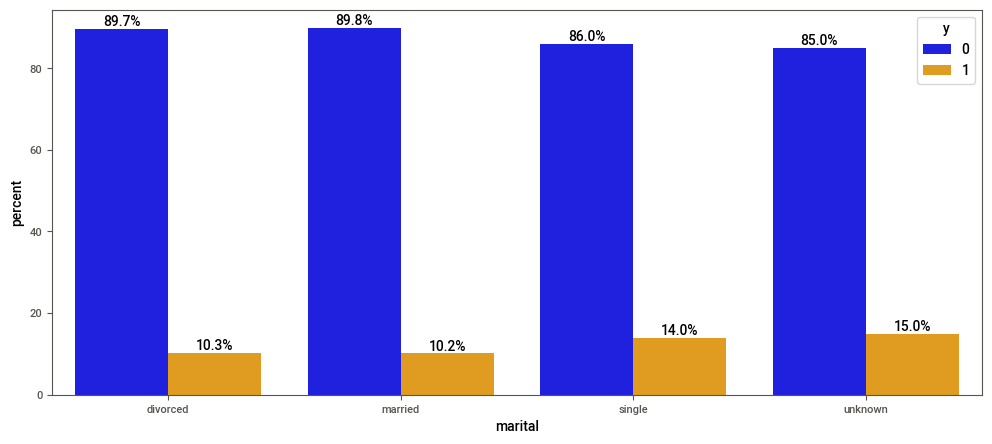

In [33]:
plt.figure(figsize=(12, 5))

# Calculate percentages
data_marital = (
    df.groupby("marital")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percent")
    .reset_index()
)

# Assign colors based on 'y' values
colors = {0: "blue", 1: "orange"}


# Create the barplot with specified colors
ax = sns.barplot(x="marital", y="percent", hue="y", data=data_marital, palette=colors)

# Iterate through each bar container and add labels
for container in ax.containers:
    labels = [f"{pct:.1f}%" for pct in container.datavalues]
    ax.bar_label(container, labels, fmt="%s")  # Customize format if needed

plt.show()

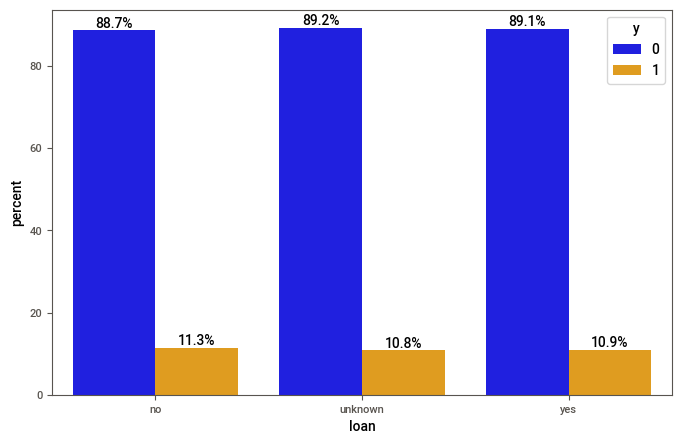

In [34]:
plt.figure(figsize=(8, 5))

# Calculate percentages
data_loan = (
    df.groupby("loan")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percent")
    .reset_index()
)

# Assign colors based on 'y' values
colors = {0: "blue", 1: "orange"}


# Create the barplot with specified colors
ax = sns.barplot(x="loan", y="percent", hue="y", data=data_loan, palette=colors)

# Iterate through each bar container and add labels
for container in ax.containers:
    labels = [f"{pct:.1f}%" for pct in container.datavalues]
    ax.bar_label(container, labels, fmt="%s")  # Customize format if needed

plt.show()

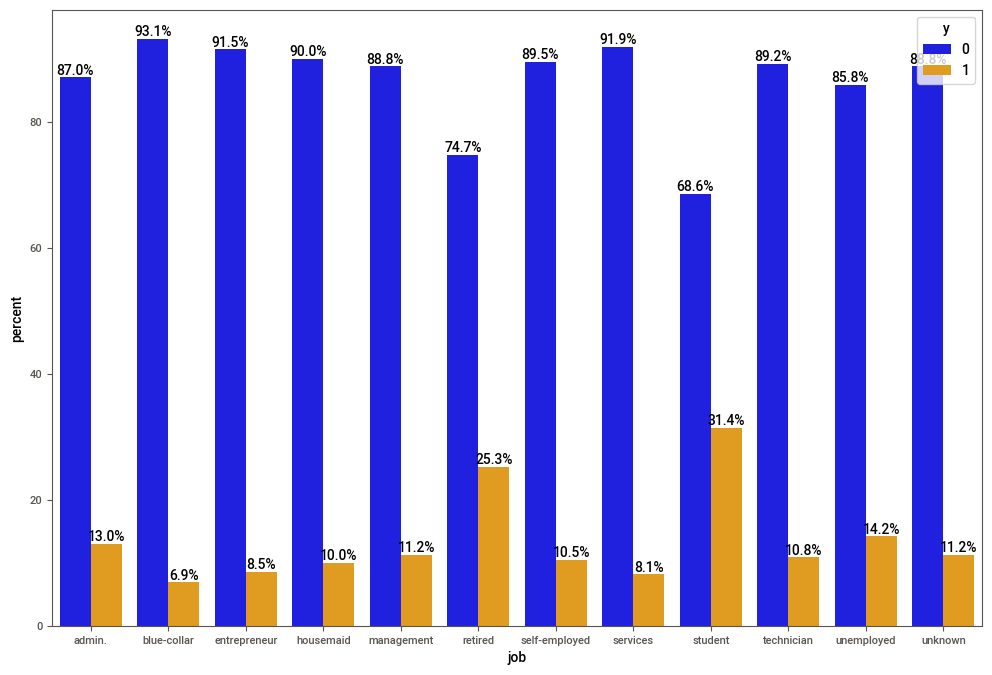

In [35]:
plt.figure(figsize=(12, 8))

# Calculate percentages
data_job = (
    df.groupby("job")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percent")
    .reset_index()
)

# Assign colors based on 'y' values
colors = {0: "blue", 1: "orange"}


# Create the barplot with specified colors
ax = sns.barplot(x="job", y="percent", hue="y", data=data_job, palette=colors)

# Iterate through each bar container and add labels
for container in ax.containers:
    labels = [f"{pct:.1f}%" for pct in container.datavalues]
    ax.bar_label(container, labels, fmt="%s")  # Customize format if needed

plt.show()

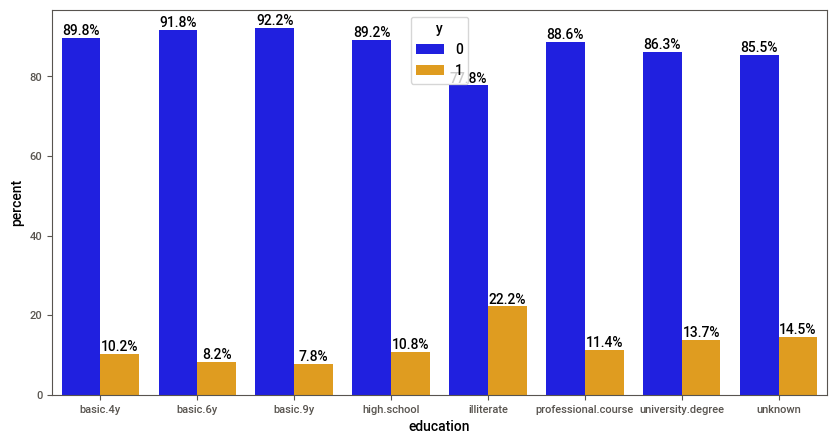

In [36]:
plt.figure(figsize=(10, 5))

# Calculate percentages
data_education = (
    df.groupby("education")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percent")
    .reset_index()
)

# Assign colors based on 'y' values
colors = {0: "blue", 1: "orange"}


# Create the barplot with specified colors
ax = sns.barplot(x="education", y="percent", hue="y", data=data_education, palette=colors)

# Iterate through each bar container and add labels
for container in ax.containers:
    labels = [f"{pct:.1f}%" for pct in container.datavalues]
    ax.bar_label(container, labels, fmt="%s")  # Customize format if needed

plt.show()

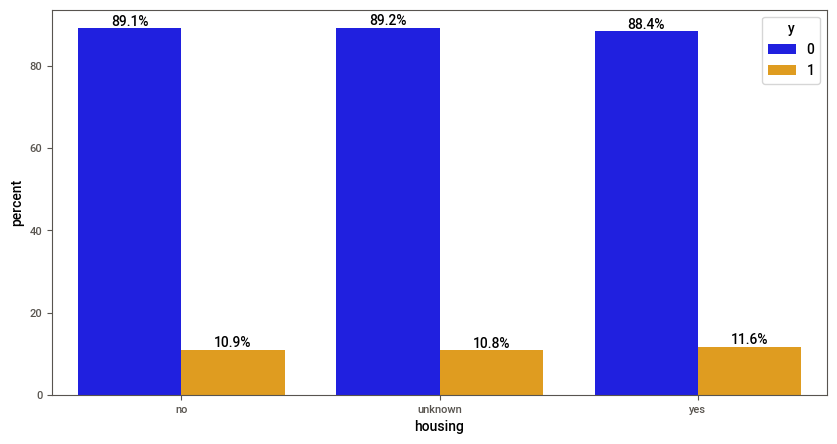

In [37]:
plt.figure(figsize=(10, 5))

# Calculate percentages
data_housing = (
    df.groupby("housing")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percent")
    .reset_index()
)

# Assign colors based on 'y' values
colors = {0: "blue", 1: "orange"}


# Create the barplot with specified colors
ax = sns.barplot(x="housing", y="percent", hue="y", data=data_housing, palette=colors)

# Iterate through each bar container and add labels
for container in ax.containers:
    labels = [f"{pct:.1f}%" for pct in container.datavalues]
    ax.bar_label(container, labels, fmt="%s")  # Customize format if needed

plt.show()

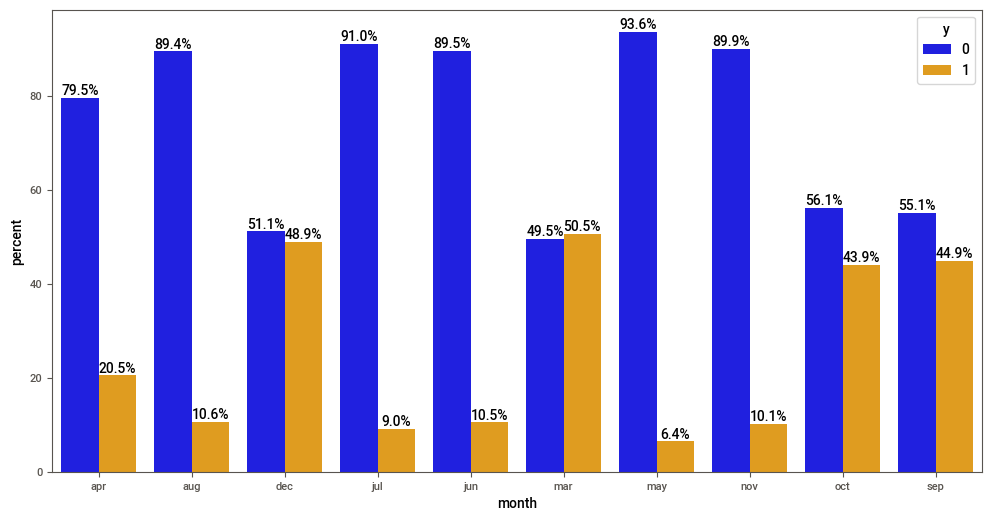

In [38]:
plt.figure(figsize=(12, 6))

# Calculate percentages
data_month = (
    df.groupby("month")["y"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percent")
    .reset_index()
)

# Assign colors based on 'y' values
colors = {0: "blue", 1: "orange"}


# Create the barplot with specified colors
ax = sns.barplot(x="month", y="percent", hue="y", data=data_month, palette=colors)

# Iterate through each bar container and add labels
for container in ax.containers:
    labels = [f"{pct:.1f}%" for pct in container.datavalues]
    ax.bar_label(container, labels, fmt="%s")  # Customize format if needed

plt.show()

#### *** Job ***

The analysis of subscription behavior by job category reveals varied responses to the campaign. While professions like administration and management show moderate interest, blue-collar workers and entrepreneurs demonstrate lower subscription rates. Retired individuals exhibit a higher tendency to subscribe, whereas self-employed and unemployed individuals show limited interest. Understanding these patterns helps tailor marketing strategies to effectively engage different demographic segments and improve campaign success.


#### *** Marital ***

Among the marital statuses, married individuals form the largest group, with 2532 subscribing to the term deposit, showing significant interest. However, a substantial number, 22396, did not subscribe, indicating diverse responses within this group. Divorced and single individuals also show interest, albeit to a lesser extent. Those with unknown marital status display minimal engagement with the campaign. Understanding these trends helps tailor marketing strategies for better engagement and higher subscription rates.


#### *** Education ***

Looking at education levels, those with university degrees, numbering 1670, have the highest subscription rate, showing notable interest in the term deposit. High school graduates also show interest, with 1031 subscribing. However, a considerable portion of university degree holders, 10498, and high school graduates, 8484, did not subscribe, highlighting varied responses within these groups. Basic education levels, such as 4-year, 6-year, and 9-year courses, display lower subscription rates, indicating potential differences in financial priorities or receptiveness to the campaign.

#### *** Default ***
Looking at the default status, individuals without defaults form the majority, with 4197 subscribing to the term deposit, showing significant interest. However, there are also notable numbers of non-subscribers among them, totaling 28391. Those with unknown default status also show some interest, with 443 subscribing. Interestingly, those with defaults are minimal in number, with only three instances. Understanding these trends helps in tailoring targeted marketing strategies to effectively engage different default status demographics and maximize subscription outcomes.

#### *** Housing ***
Looking at housing status, individuals with housing loans show notable interest, with 2507 subscribing to the term deposit. However, there is also significant interest among those without housing loans, with 2026 subscribing. Understanding these trends aids in tailoring marketing strategies to effectively engage individuals with different housing statuses and maximize subscription outcomes.

#### *** Loan ***

Individuals without personal loans display significant interest, with 3850 subscribing to the term deposit, while those with loans also show interest, with 683 subscribing. Understanding these trends helps in tailoring marketing strategies to effectively engage individuals with different loan statuses and maximize subscription outcomes.


#### *** Contact ***
Clients contacted via cellular communication show notable interest, with 3853 subscribing, whereas fewer subscriptions are observed among those contacted via telephone, totaling 787. Adjusting marketing strategies to leverage preferred communication channels could enhance subscription outcomes.


#### *** Month ***
Looking at subscription behavior by month, May has the highest number of non-subscribers, with 12883, but still shows significant interest, with 886 subscriptions. March and December display relatively higher subscription rates, with 276 and 89 subscriptions, respectively. In June, there were 4759 non-subscribers and 559 subscribers. Understanding these trends helps in timing marketing efforts effectively to capitalize on months with higher subscription rates and adjust strategies for those with lower engagement.


#### *** Day_of_week ***
Looking at subscription behavior by day of the week, Thursdays show the highest number of non-subscribers, with 7578, but also significant interest, with 1045 subscribers. Mondays and Wednesdays have similar patterns, with moderate interest and non-subscriber counts. Fridays have a higher number of non-subscribers, but still display notable interest. Tuesdays show a similar trend to Thursdays, with high engagement despite a significant number of non-subscribers. Understanding these trends helps in scheduling marketing efforts effectively to maximize engagement and subscription outcomes.


#### *** Poutcome ***
Clients from the previous marketing campaign with successful outcomes have the highest subscription rate, with 894 subscriptions. However, those with nonexistent outcomes show significant interest, with 3141 subscribers. Clients with failed previous outcomes also display moderate interest, with 605 subscribers. Adjusting strategies based on previous campaign outcomes can enhance engagement and subscription rates.

##### Multivariate Analysis:

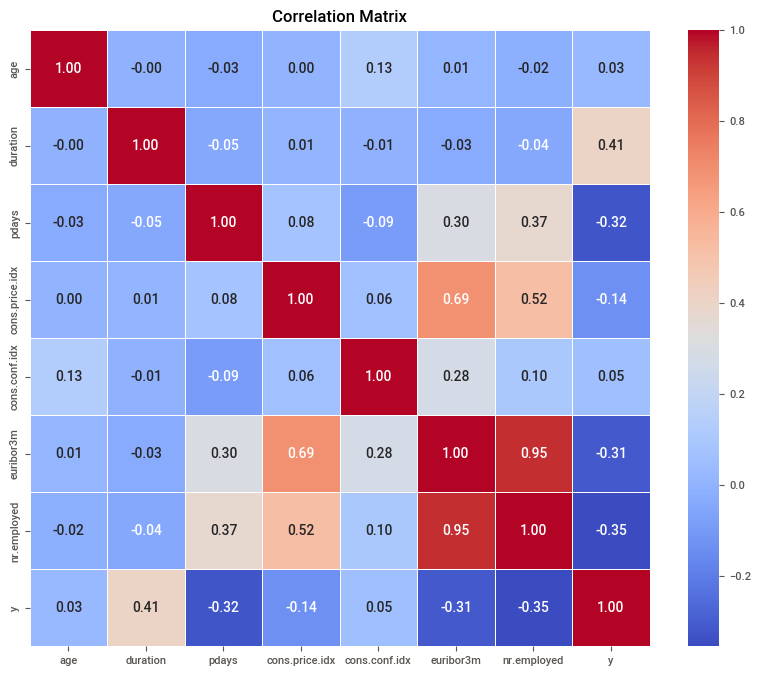

In [39]:
mult = df[['age', 'duration','pdays','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']]
correlation_matrix = mult.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

#### Insights from the Multivariate Analysis :

1. **Duration Influence**: The duration of the last contact seems to have a notable positive correlation with the target variable (y), indicating that longer durations might lead to a higher likelihood of success in the outcome.

2. **Economic Factors**: Variables like the consumer price index (cons.price.idx) and the number of employees (nr.employed) show moderate correlations with the target variable. This suggests that economic conditions could play a role in determining the outcome.

3. **Interest Rates Impact**: The euribor 3-month rate (euribor3m) exhibits a strong negative correlation with the target variable. This implies that lower interest rates might positively influence the outcome.

4. **Contact Frequency**: Interestingly, the number of days since the client was last contacted (pdays) shows a significant negative correlation with the target variable. This indicates that more recent contact attempts might be more effective.

5. **Consumer Confidence**: The consumer confidence index (cons.conf.idx) has a slight positive correlation with the target variable. This suggests that higher consumer confidence levels might correspond to a slightly higher likelihood of success in the outcome.

6. **Age Factor**: Age (age) doesn't seem to have a strong correlation with the target variable. However, it's worth noting that it has a slight negative correlation, indicating that older clients might be slightly less likely to achieve the desired outcome.

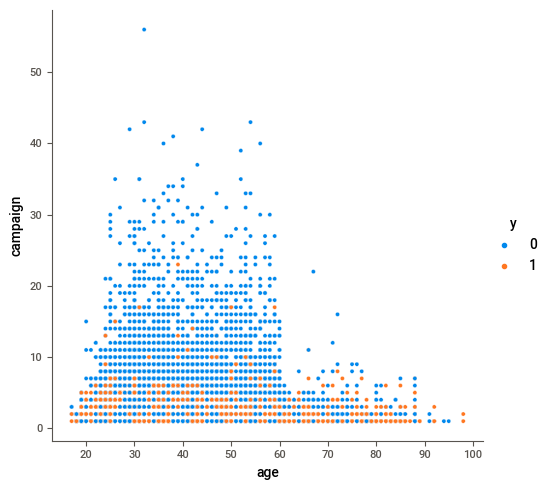

In [40]:
# Analyze Age vs campaign
sns.relplot(x = df.age, y= df.campaign, hue = df.y)

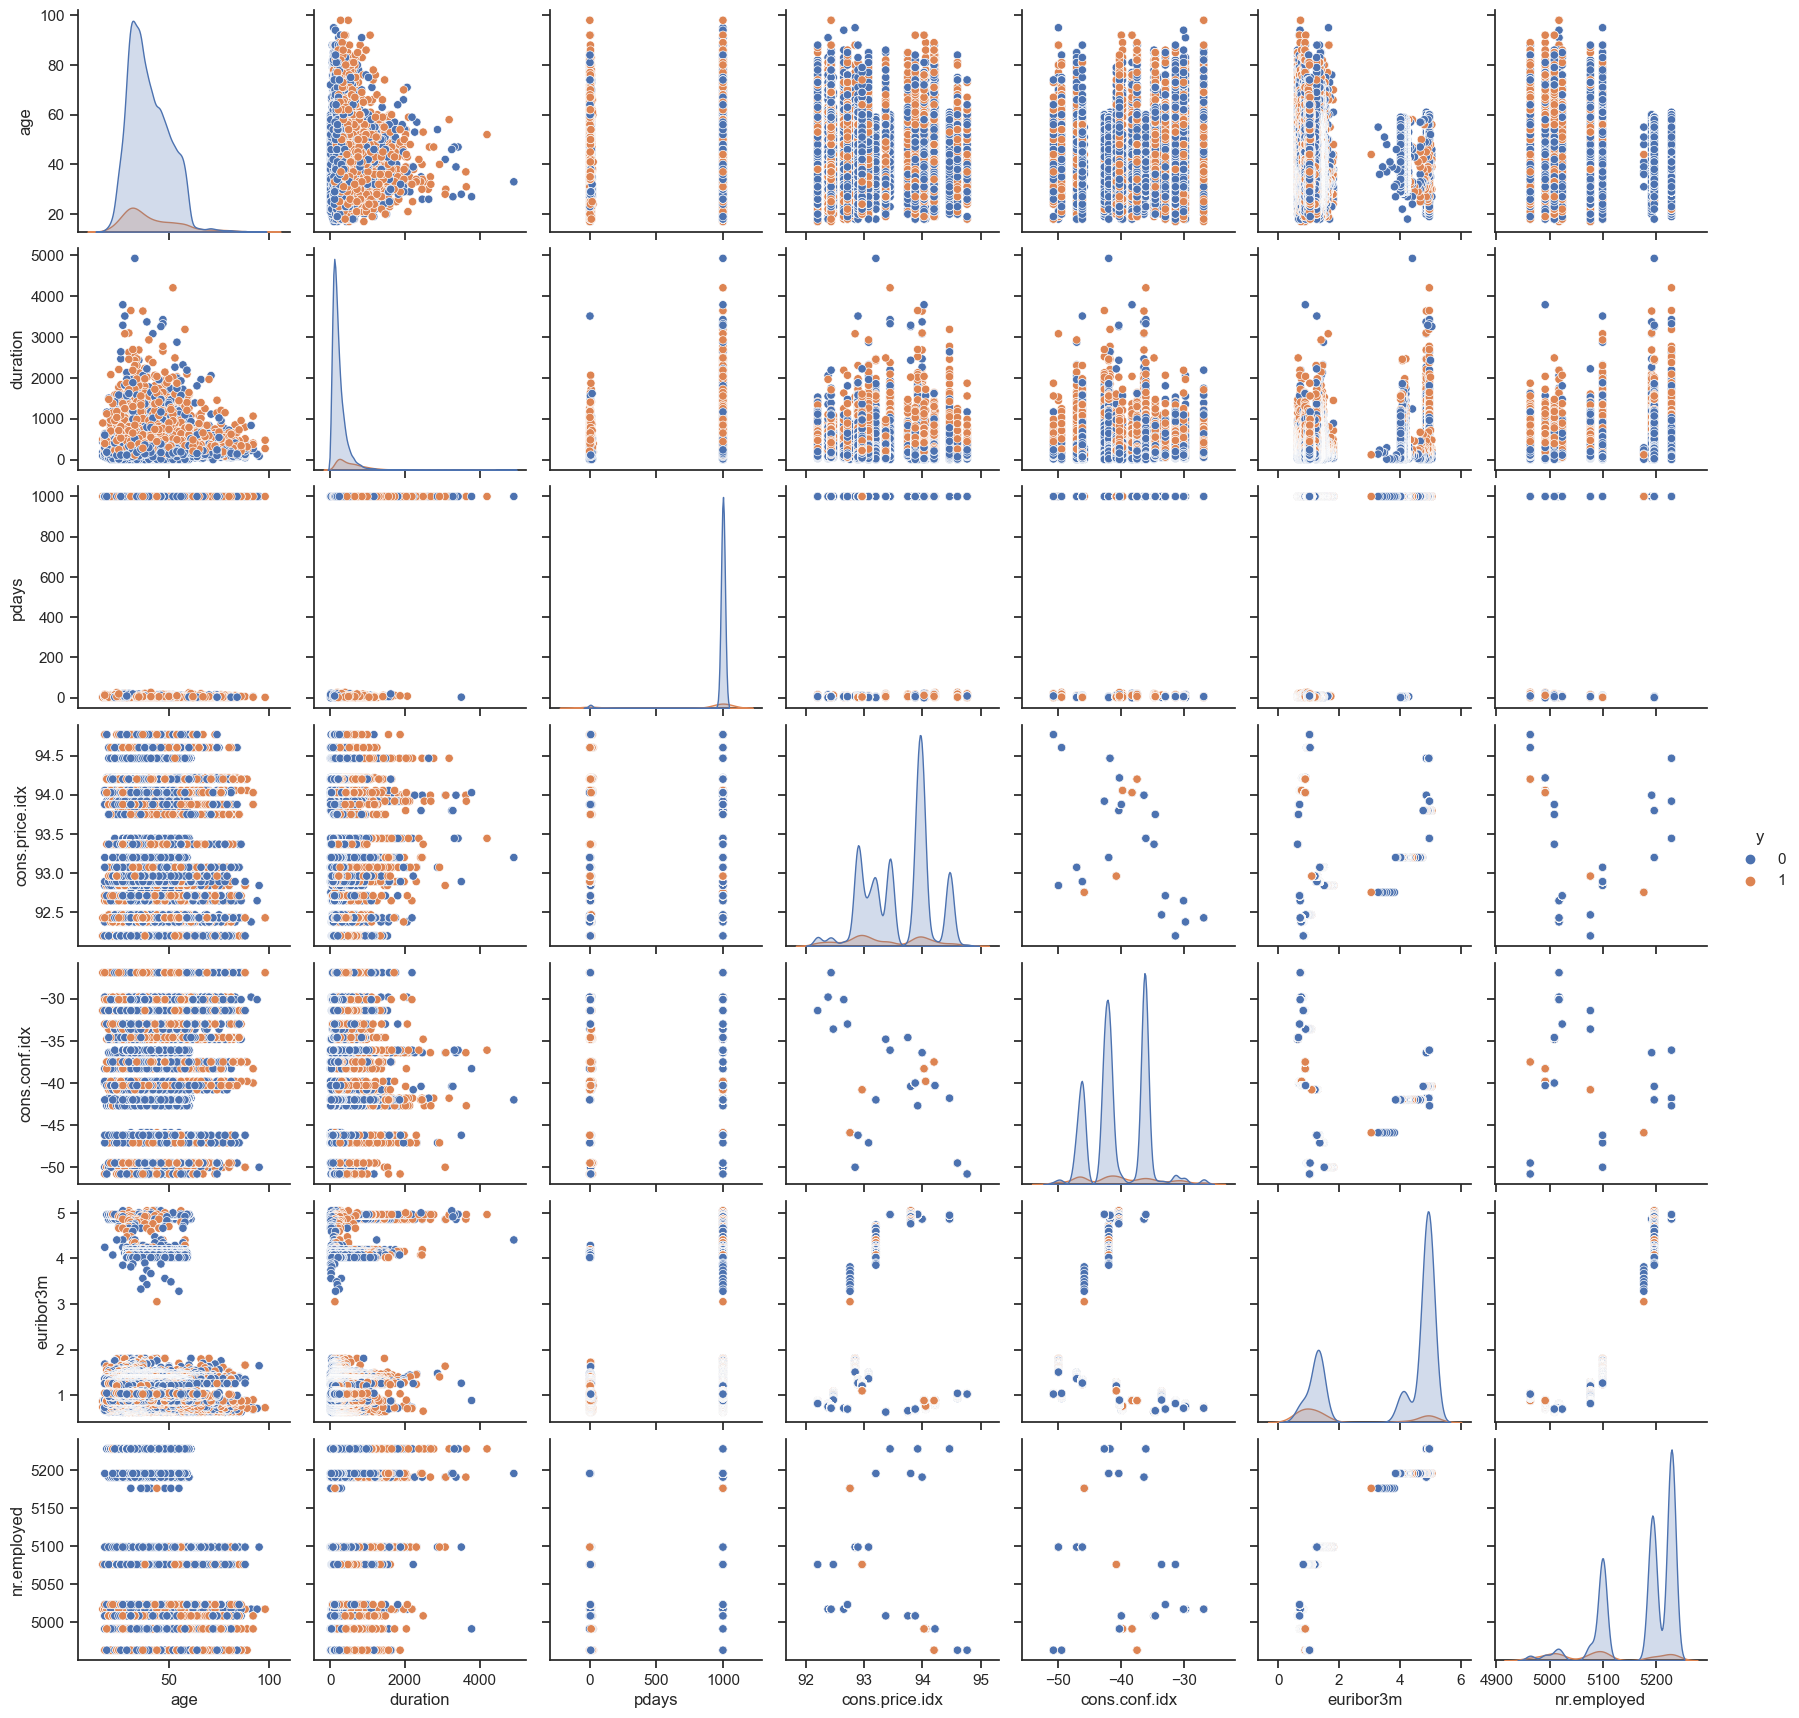

In [42]:
sns.set(style = 'ticks')
sns.pairplot(mult, diag_kind='kde', hue = 'y')
plt.show()

In [43]:
df.corr()

age  duration  campaign     pdays  previous  \
age             1.000000 -0.000808  0.004622 -0.034381  0.024379   
duration       -0.000808  1.000000 -0.071765 -0.047556  0.020600   
campaign        0.004622 -0.071765  1.000000  0.052606 -0.079182   
pdays          -0.034381 -0.047556  0.052606  1.000000 -0.587508   
previous        0.024379  0.020600 -0.079182 -0.587508  1.000000   
emp.var.rate   -0.000242 -0.027941  0.150786  0.271063 -0.420587   
cons.price.idx  0.001009  0.005303  0.127826  0.078920 -0.203197   
cons.conf.idx   0.129075 -0.008126 -0.013657 -0.091374 -0.050929   
euribor3m       0.010852 -0.032861  0.135169  0.296946 -0.454571   
nr.employed    -0.017607 -0.044672  0.144129  0.372659 -0.501411   
y               0.030381  0.405297 -0.066361 -0.324948  0.230202   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000242        0.001009       0.129075   0.010852   
duration           -0.027941        0.005303      -0.008126  -0.032861   
campaign            0.150786        0.127826      -0.013657   0.135169   
pdays               0.271063        0.078920      -0.091374   0.296946   
previous           -0.420587       -0.203197      -0.050929  -0.454571   
emp.var.rate        1.000000        0.775293       0.196257   0.972244   
cons.price.idx      0.775293        1.000000       0.059170   0.688180   
cons.conf.idx       0.196257        0.059170       1.000000   0.277864   
euribor3m           0.972244        0.688180       0.277864   1.000000   
nr.employed         0.906949        0.521945       0.100679   0.945146   
y                  -0.298289       -0.136134       0.054802  -0.307740   

                nr.employed         y  
age               -0.017607  0.030381  
duration          -0.044672  0.405297  
campaign           0.144129 -0.066361  
pdays              0.372659 -0.324948  
previous          -0.501411  0.230202  
emp.var.rate       0.906949 -0.298289  
cons.price.idx     0.521945 -0.136134  
cons.conf.idx      0.100679  0.054802  
euribor3m          0.945146 -0.307740  
nr.employed        1.000000 -0.354669  
y                 -0.354669  1.000000

#### insights:

This correlation matrix reveals the relationships between various features and the target variable 'y', representing whether a client subscribed to a term deposit or not.

1. **Duration (0.405)**: There is a moderate positive correlation between the duration of the last contact and the client's subscription status, indicating that longer call durations are associated with a higher likelihood of subscription.

2. **Pdays (-0.325)**: There is a moderate negative correlation between the number of days since the client was last contacted and their subscription status, suggesting that clients contacted more recently are more likely to subscribe.

3. **Previous (0.230)**: There is a moderate positive correlation between the number of contacts performed before this campaign and the client's subscription status, indicating that clients who were contacted more frequently in the past are more likely to subscribe.

4. **Euribor3m (-0.308)**: There is a moderate negative correlation between the Euribor 3-month rate and the client's subscription status, suggesting that lower Euribor rates are associated with a higher likelihood of subscription.

5. **Nr.employed (-0.355)**: There is a moderate negative correlation between the number of employees and the client's subscription status, indicating that higher employment rates are associated with a lower likelihood of subscription.


#### Data Preprocessing:

In [44]:
# Checking null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Statistical Measures of numerical features:

In [45]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  41176.000000    41176.000000   41176.000000  41176.000000   
mean       0.081922       93.575720     -40.502863      3.621293   
std        1.570883        0.578839       4.627860      1.734437   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.749000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr.employed             y  
count  41176.000000  41176.000000  
mean    5167.034870      0.112663  
std       72.251364      0.316184  
min     4963.600000      0.000000  
25%     5099.100000      0.000000  
50%     5191.000000      0.000000  
75%     5228.100000      0.000000  
max     5228.100000      1.000000

### Insights from the numerical features:

1. **Age**:
   - Clients' ages range from 17 to 98 years old.
   - The average age is around 40 years, showing a diverse age distribution.

2. **Duration (Last Contact Duration)**:
   - On average, the last contact with clients lasts about 4.3 minutes.
   - Some contacts were very brief or missed, indicated by durations of 0 seconds, while others lasted up to 1.4 hours.

3. **Campaign (Number of Contacts)**:
   - Clients were contacted around 2.57 times on average during this campaign.
   - The maximum number of contacts for a single client was 56, showing variability in engagement levels.

4. **Pdays (Days Since Last Contact)**:
   - On average, it's been about 962 days since clients were last contacted from a previous campaign.
   - A value of 999 means some clients were not previously contacted.

5. **Previous (Number of Previous Contacts)**:
   - On average, clients had very few previous contacts before this campaign, around 0.17.
   - Some clients had up to 7 previous contacts, indicating varying levels of prior engagement.

6. **Emp.var.rate (Employment Variation Rate)**:
   - The average employment variation rate is approximately 0.08, reflecting changes in employment levels over time.

7. **Cons.price.idx (Consumer Price Index)**:
   - The average consumer price index is around 93.58, which measures inflation or deflation.

8. **Cons.conf.idx (Consumer Confidence Index)**:
   - The average consumer confidence index is approximately -40.50, with higher values indicating greater consumer confidence.

9. **Euribor3m (Euribor 3-Month Rate)**:
   - The average euribor 3-month rate is approximately 3.62, impacting borrowing costs and investment decisions.

10. **Nr.employed (Number of Employees)**:
    - On average, there are around 5167 employees, reflecting economic activity.

11. **Target Variable (y)**:
    - Around 11.27% of clients subscribed to a term deposit, as indicated by the target variable ('yes').

#### Statistical Measures of categorical features:

In [46]:
df.describe(include= 'O')

job  marital          education default housing   loan   contact  \
count    41176    41176              41176   41176   41176  41176     41176   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10419    24921              12164   32577   21571  33938     26135   

        month day_of_week     poutcome  
count   41176       41176        41176  
unique     10           5            3  
top       may         thu  nonexistent  
freq    13767        8618        35551

##### Insights from the categorical features

1. **Job**:
   - There are 12 unique job categories.
   - The most common job category is 'admin.', with 10,422 occurrences.

2. **Marital**:
   - There are 4 unique marital status categories.
   - The most common marital status is 'married', with 24,928 occurrences.

3. **Education**:
   - There are 8 unique education level categories.
   - The most common education level is 'university.degree', with 12,168 occurrences.

4. **Default**:
   - There are 3 unique categories indicating whether clients have credit in default ('yes', 'no', 'unknown').
   - The majority of clients (32,588) have no default.

5. **Housing**:
   - There are 3 unique categories indicating whether clients have a housing loan ('yes', 'no', 'unknown').
   - The majority of clients (21,576) have a housing loan.

6. **Loan**:
   - There are 3 unique categories indicating whether clients have a personal loan ('yes', 'no', 'unknown').
   - The majority of clients (33,950) do not have a personal loan.

7. **Contact**:
   - There are 2 unique categories indicating the contact communication type ('cellular', 'telephone').
   - The most common contact communication type is 'cellular', with 26,144 occurrences.

8. **Month**:
   - There are 10 unique categories representing the last contact month of the year.
   - The most common month for contacts is 'May', with 13,769 occurrences.

9. **Day of Week**:
   - There are 5 unique categories representing the last contact day of the week.
   - The most common day for contacts is 'Thursday' (thu), with 8,623 occurrences.

10. **Poutcome**:
    - There are 3 unique categories representing the outcome of the previous marketing campaign ('failure', 'nonexistent', 'success').
    - The most common outcome is 'nonexistent', indicating that in most cases, there was no previous campaign outcome recorded.

In [47]:
categorical_col = []
for column in df.columns:
    if df[column].dtypes == object and len(df[column].unique())  <= 50:
        categorical_col.append(column)
        print(f"{column}:{df[column].unique()}")
        print("***************************")

job:['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
***************************
marital:['married' 'single' 'divorced' 'unknown']
***************************
education:['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
***************************
default:['no' 'unknown' 'yes']
***************************
housing:['no' 'yes' 'unknown']
***************************
loan:['no' 'yes' 'unknown']
***************************
contact:['telephone' 'cellular']
***************************
month:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
***************************
day_of_week:['mon' 'tue' 'wed' 'thu' 'fri']
***************************
poutcome:['nonexistent' 'failure' 'success']
***************************


#### Replacement of unknown values in each feature with mode of that features:

In [48]:
for feature in categorical_column.columns:
    mode_value = df[feature].mode()[0]
    df[feature].replace('unknown', mode_value, inplace = True)

#### Encoding of categorical columns:

In [49]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

##### Ordinal Features Encoding :
"job" and "education" appear to have categories that could have a natural order or ranking. For example, "basic.4y" may be considered lower in terms of education compared to "university.degree"

In [50]:
ordinal_features = df[['education']]

In [51]:
for column in ordinal_features.columns:
    df[column] = LE.fit_transform(df[column])

#### Nominal Encoding:

In [52]:
nominal_features  = ['job','marital','default','housing', 'loan','contact','month','day_of_week','poutcome']

In [53]:
df = pd.get_dummies(df, columns = nominal_features, drop_first= True)

In [54]:
df.head()

age  education  duration  campaign  pdays  previous  emp.var.rate  \
0   56          0       261         1    999         0           1.1   
1   57          3       149         1    999         0           1.1   
2   37          3       226         1    999         0           1.1   
3   40          1       151         1    999         0           1.1   
4   56          3       307         1    999         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  job_blue-collar  \
0          93.994          -36.4      4.857       5191.0  0                0   
1          93.994          -36.4      4.857       5191.0  0                0   
2          93.994          -36.4      4.857       5191.0  0                0   
3          93.994          -36.4      4.857       5191.0  0                0   
4          93.994          -36.4      4.857       5191.0  0                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0                 0              1               0            0   
1                 0              0               0            0   
2                 0              0               0            0   
3                 0              0               0            0   
4                 0              0               0            0   

   job_self-employed  job_services  job_student  job_technician  \
0                  0             0            0               0   
1                  0             1            0               0   
2                  0             1            0               0   
3                  0             0            0               0   
4                  0             1            0               0   

   job_unemployed  marital_married  marital_single  default_yes  housing_yes  \
0               0                1               0            0            0   
1               0                1               0            0            0   
2               0                1               0            0            1   
3               0                1               0            0            0   
4               0                1               0            0            0   

   loan_yes  contact_telephone  month_aug  month_dec  month_jul  month_jun  \
0         0                  1          0          0          0          0   
1         0                  1          0          0          0          0   
2         0                  1          0          0          0          0   
3         0                  1          0          0          0          0   
4         1                  1          0          0          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
0          0          1          0          0          0                1   
1          0          1          0          0          0                1   
2          0          1          0          0          0                1   
3          0          1          0          0          0                1   
4          0          1          0          0          0                1   

   day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_nonexistent  \
0                0                0                0                     1   
1                0                0                0                     1   
2                0                0                0                     1   
3                0                0                0                     1   
4                0                0                0                     1   

   poutcome_success  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

#### Handling Outlier :

In [55]:
boxplot_info = {}

for column in df.columns[:-1]:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min_limit = Q1 - 1.5 * IQR
    max_limit = Q3 + 1.5 * IQR
    boxplot_info[column] = {
        "Min_limit": min_limit,
        "Max_limit":max_limit,
        "IQR":IQR
    }
print()
for column, info in boxplot_info.items():
    print(f"Min_limit, Max_limit and IQR of : {column}")
    print(f"Column : {column}")
    print(f"Min_limit :{info['Min_limit']}")
    print(f"Max_limit : {info['Max_limit']}")
    print(f"IQR : {info['IQR']}")
    print("------------")


Min_limit, Max_limit and IQR of : age
Column : age
Min_limit :9.5
Max_limit : 69.5
IQR : 15.0
------------
Min_limit, Max_limit and IQR of : education
Column : education
Min_limit :-4.0
Max_limit : 12.0
IQR : 4.0
------------
Min_limit, Max_limit and IQR of : duration
Column : duration
Min_limit :-223.5
Max_limit : 644.5
IQR : 217.0
------------
Min_limit, Max_limit and IQR of : campaign
Column : campaign
Min_limit :-2.0
Max_limit : 6.0
IQR : 2.0
------------
Min_limit, Max_limit and IQR of : pdays
Column : pdays
Min_limit :999.0
Max_limit : 999.0
IQR : 0.0
------------
Min_limit, Max_limit and IQR of : previous
Column : previous
Min_limit :0.0
Max_limit : 0.0
IQR : 0.0
------------
Min_limit, Max_limit and IQR of : emp.var.rate
Column : emp.var.rate
Min_limit :-6.6000000000000005
Max_limit : 6.200000000000001
IQR : 3.2
------------
Min_limit, Max_limit and IQR of : cons.price.idx
Column : cons.price.idx
Min_limit :91.69650000000001
Max_limit : 95.3725
IQR : 0.9189999999999969
-------

In [56]:
# lets see it through boxplot and observe plots ,min_limits, max_limits, IQR and also outlier 

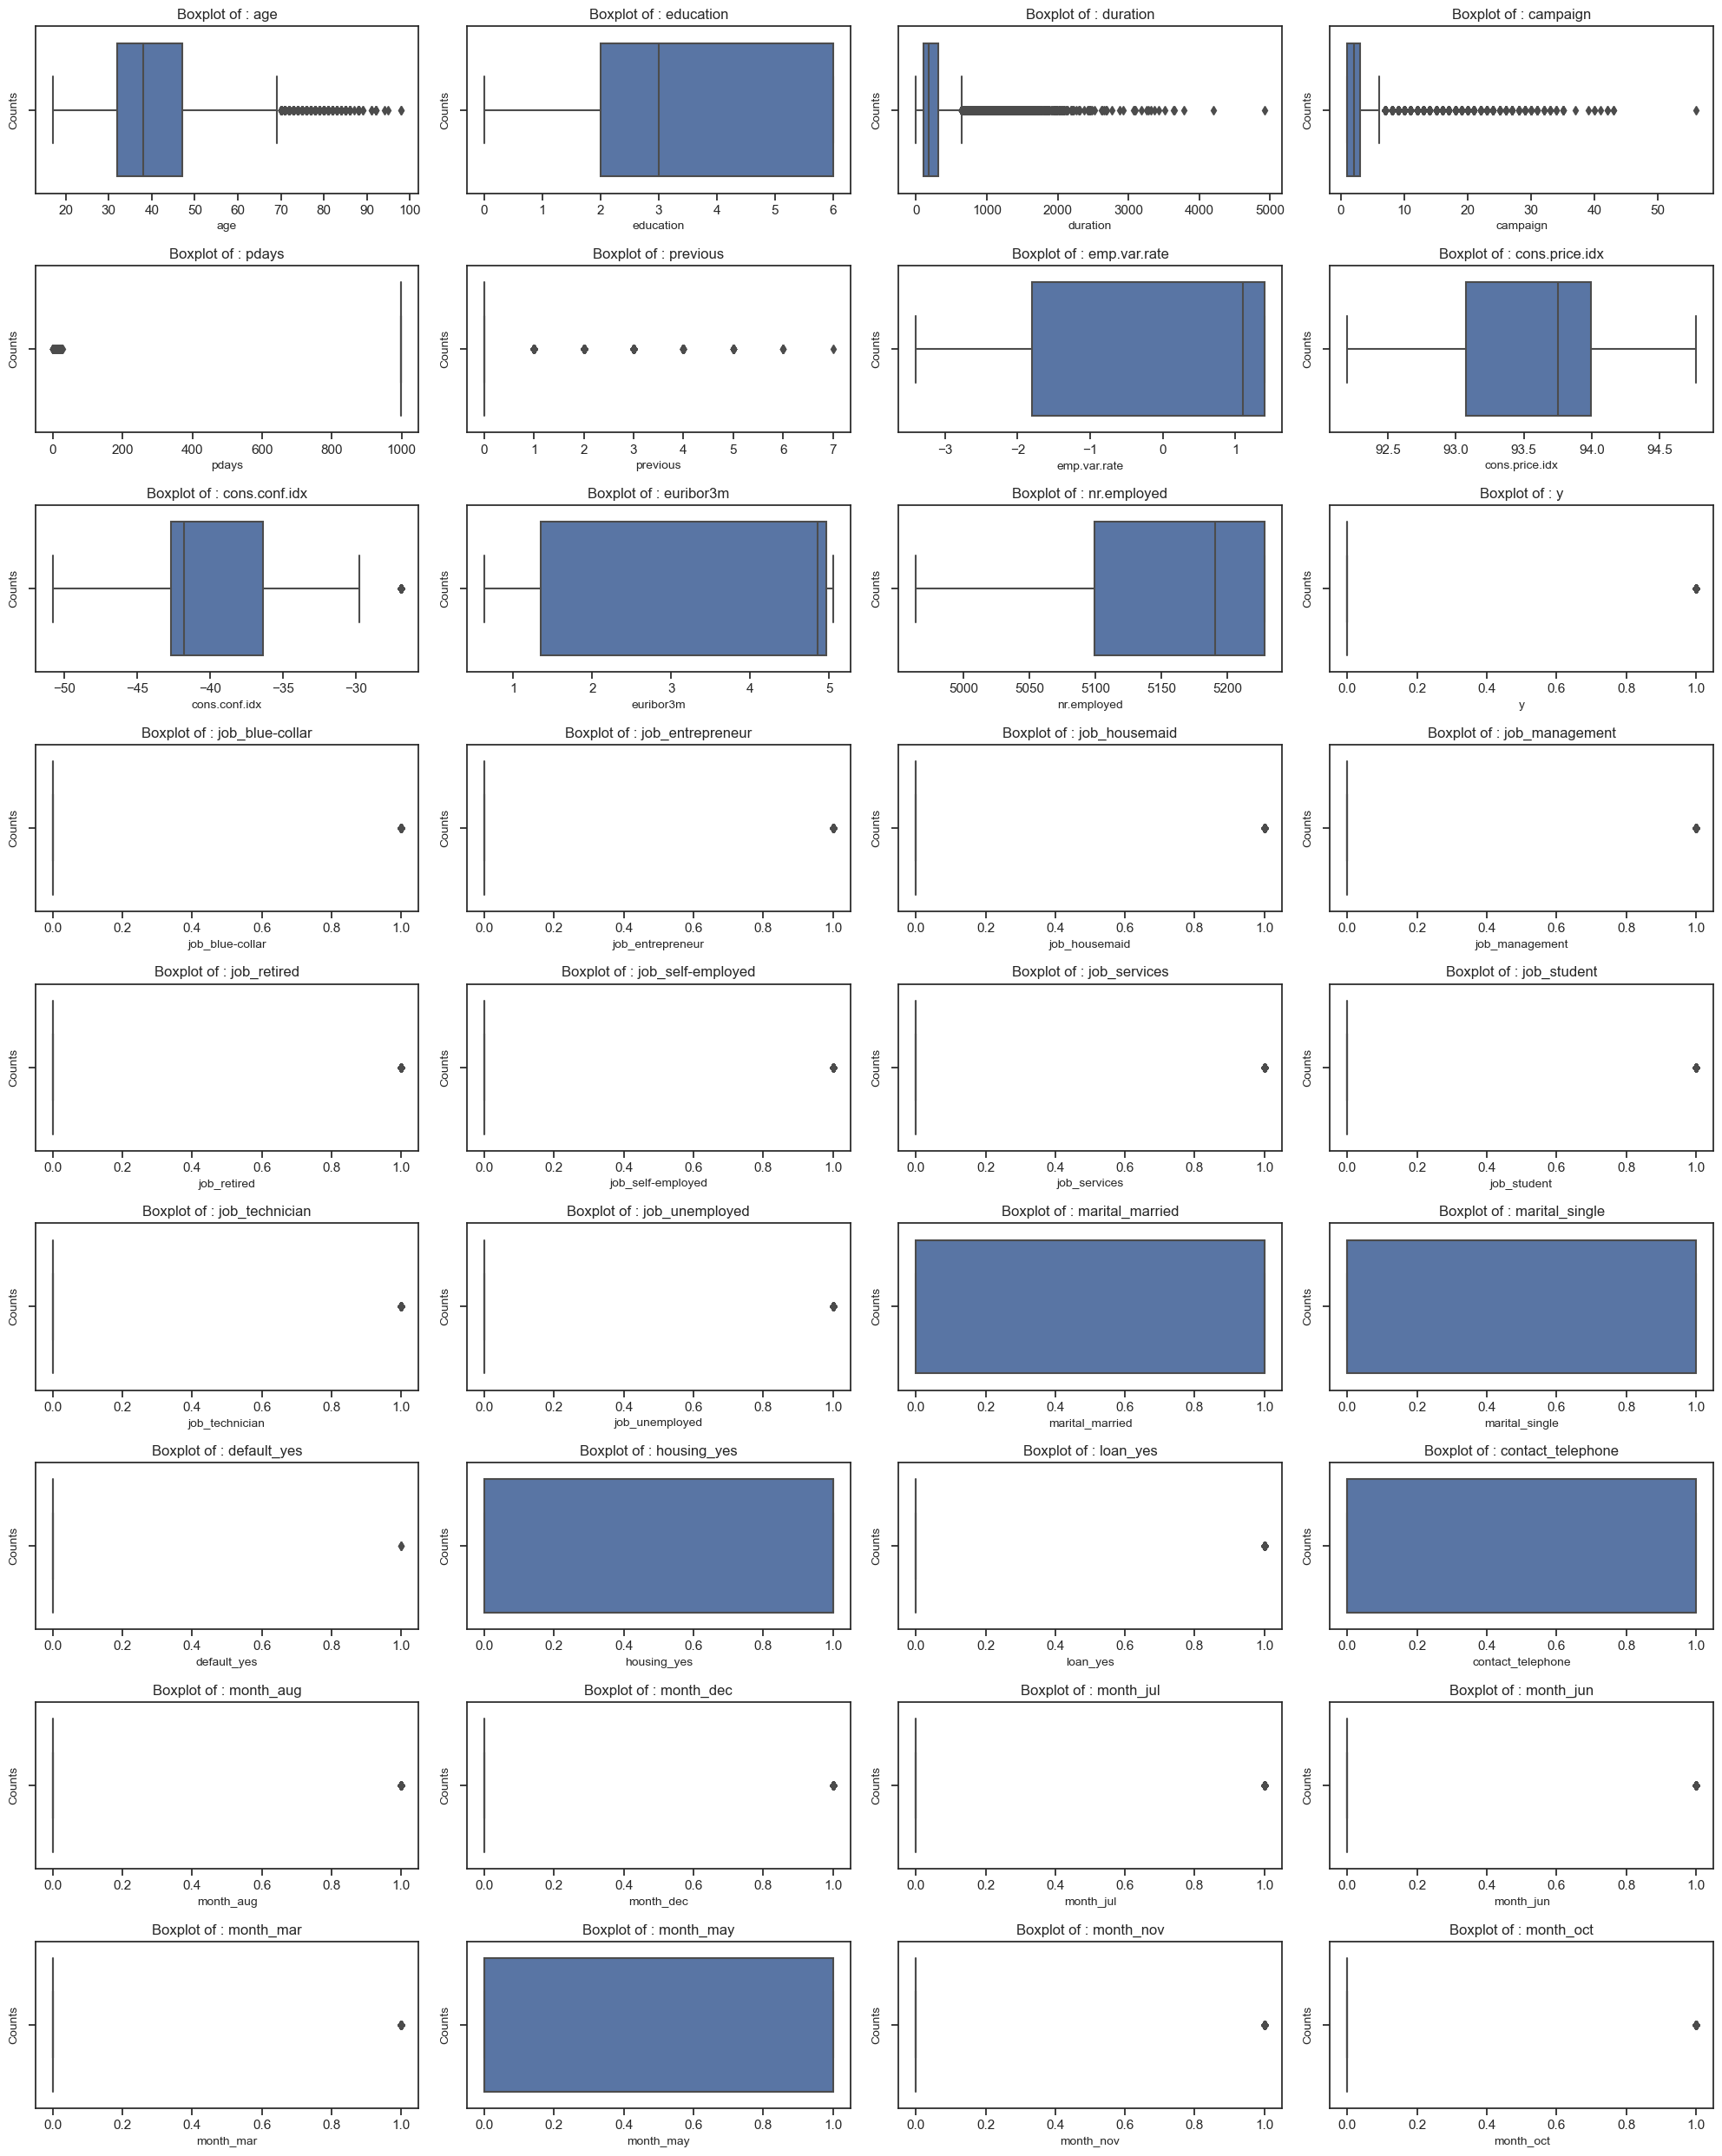

In [57]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in df.columns[:-1]:
    if plotnumber <= 36:
        plt.subplot(9,4,plotnumber)
        sns.boxplot(x = df[column])
        plt.title(f"Boxplot of : {column}")
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('Counts', fontsize = 10)
        plotnumber += 1

plt.tight_layout()
plt.show()

In [58]:
# lets check how many outlier each feature have :

In [59]:
def identify_outlier(column):
    q1= df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    outliers = df[(df[column] < min_limit) | (df[column] > max_limit)]
    return outliers

In [60]:
for column in df.columns[:-1]:
    outliers = identify_outlier(column)
    outliers_counts = len(outliers)
    if outliers_counts >= 0:
        print(f"feature {column} has {outliers_counts}  outliers")
        print("--------------")

feature age has 468  outliers
--------------
feature education has 0  outliers
--------------
feature duration has 2963  outliers
--------------
feature campaign has 2406  outliers
--------------
feature pdays has 1515  outliers
--------------
feature previous has 5625  outliers
--------------
feature emp.var.rate has 0  outliers
--------------
feature cons.price.idx has 0  outliers
--------------
feature cons.conf.idx has 446  outliers
--------------
feature euribor3m has 0  outliers
--------------
feature nr.employed has 0  outliers
--------------
feature y has 4639  outliers
--------------
feature job_blue-collar has 9253  outliers
--------------
feature job_entrepreneur has 1456  outliers
--------------
feature job_housemaid has 1060  outliers
--------------
feature job_management has 2924  outliers
--------------
feature job_retired has 1718  outliers
--------------
feature job_self-employed has 1421  outliers
--------------
feature job_services has 3967  outliers
--------------
f

##### Replace the oulier values in continous features is replaced with median value of each features:

In [61]:
outlier_feature = df[['age','previous','cons.conf.idx']]

In [62]:
for column in outlier_feature.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    df[column] = np.where((df[column]< min_limit) | (df[column] > max_limit),
                         df[column].median(),df[column])

##### Replacing outliers in discrete and categorical values with mode of that features:

In [63]:
discrete_outlier = df[['duration','previous' ,'campaign', 'pdays']]

In [64]:
for column in discrete_outlier.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    df[column] = np.where((df[column]<min_limit) | (df[column]>max_limit),
                         df[column].mode()[0], df[column])

In [65]:
df.head(4)

age  education  duration  campaign  pdays  previous  emp.var.rate  \
0  56.0          0       261         1    999       0.0           1.1   
1  57.0          3       149         1    999       0.0           1.1   
2  37.0          3       226         1    999       0.0           1.1   
3  40.0          1       151         1    999       0.0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  job_blue-collar  \
0          93.994          -36.4      4.857       5191.0  0                0   
1          93.994          -36.4      4.857       5191.0  0                0   
2          93.994          -36.4      4.857       5191.0  0                0   
3          93.994          -36.4      4.857       5191.0  0                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0                 0              1               0            0   
1                 0              0               0            0   
2                 0              0               0            0   
3                 0              0               0            0   

   job_self-employed  job_services  job_student  job_technician  \
0                  0             0            0               0   
1                  0             1            0               0   
2                  0             1            0               0   
3                  0             0            0               0   

   job_unemployed  marital_married  marital_single  default_yes  housing_yes  \
0               0                1               0            0            0   
1               0                1               0            0            0   
2               0                1               0            0            1   
3               0                1               0            0            0   

   loan_yes  contact_telephone  month_aug  month_dec  month_jul  month_jun  \
0         0                  1          0          0          0          0   
1         0                  1          0          0          0          0   
2         0                  1          0          0          0          0   
3         0                  1          0          0          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
0          0          1          0          0          0                1   
1          0          1          0          0          0                1   
2          0          1          0          0          0                1   
3          0          1          0          0          0                1   

   day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_nonexistent  \
0                0                0                0                     1   
1                0                0                0                     1   
2                0                0                0                     1   
3                0                0                0                     1   

   poutcome_success  
0                 0  
1                 0  
2                 0  
3                 0

##### Scaling of data using standard Scaler:

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler= StandardScaler()

In [68]:
df[['age','duration','pdays','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']] =  scaler.fit_transform(df[['age','duration','pdays','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']])

In [69]:
df.head()

age  education  duration  campaign  pdays  previous  emp.var.rate  \
0  1.706473          0  0.475689         1    0.0       0.0           1.1   
1  1.810407          3 -0.328616         1    0.0       0.0           1.1   
2 -0.268276          3  0.224343         1    0.0       0.0           1.1   
3  0.043526          1 -0.314254         1    0.0       0.0           1.1   
4  1.706473          3  0.806028         1    0.0       0.0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  job_blue-collar  \
0        0.722628       0.968037   0.712463     0.331695  0                0   
1        0.722628       0.968037   0.712463     0.331695  0                0   
2        0.722628       0.968037   0.712463     0.331695  0                0   
3        0.722628       0.968037   0.712463     0.331695  0                0   
4        0.722628       0.968037   0.712463     0.331695  0                0   

   job_entrepreneur  job_housemaid  job_management  job_retired  \
0                 0              1               0            0   
1                 0              0               0            0   
2                 0              0               0            0   
3                 0              0               0            0   
4                 0              0               0            0   

   job_self-employed  job_services  job_student  job_technician  \
0                  0             0            0               0   
1                  0             1            0               0   
2                  0             1            0               0   
3                  0             0            0               0   
4                  0             1            0               0   

   job_unemployed  marital_married  marital_single  default_yes  housing_yes  \
0               0                1               0            0            0   
1               0                1               0            0            0   
2               0                1               0            0            1   
3               0                1               0            0            0   
4               0                1               0            0            0   

   loan_yes  contact_telephone  month_aug  month_dec  month_jul  month_jun  \
0         0                  1          0          0          0          0   
1         0                  1          0          0          0          0   
2         0                  1          0          0          0          0   
3         0                  1          0          0          0          0   
4         1                  1          0          0          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
0          0          1          0          0          0                1   
1          0          1          0          0          0                1   
2          0          1          0          0          0                1   
3          0          1          0          0          0                1   
4          0          1          0          0          0                1   

   day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_nonexistent  \
0                0                0                0                     1   
1                0                0                0                     1   
2                0                0                0                     1   
3                0                0                0                     1   
4                0                0                0                     1   

   poutcome_success  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

#### Feature Selection:

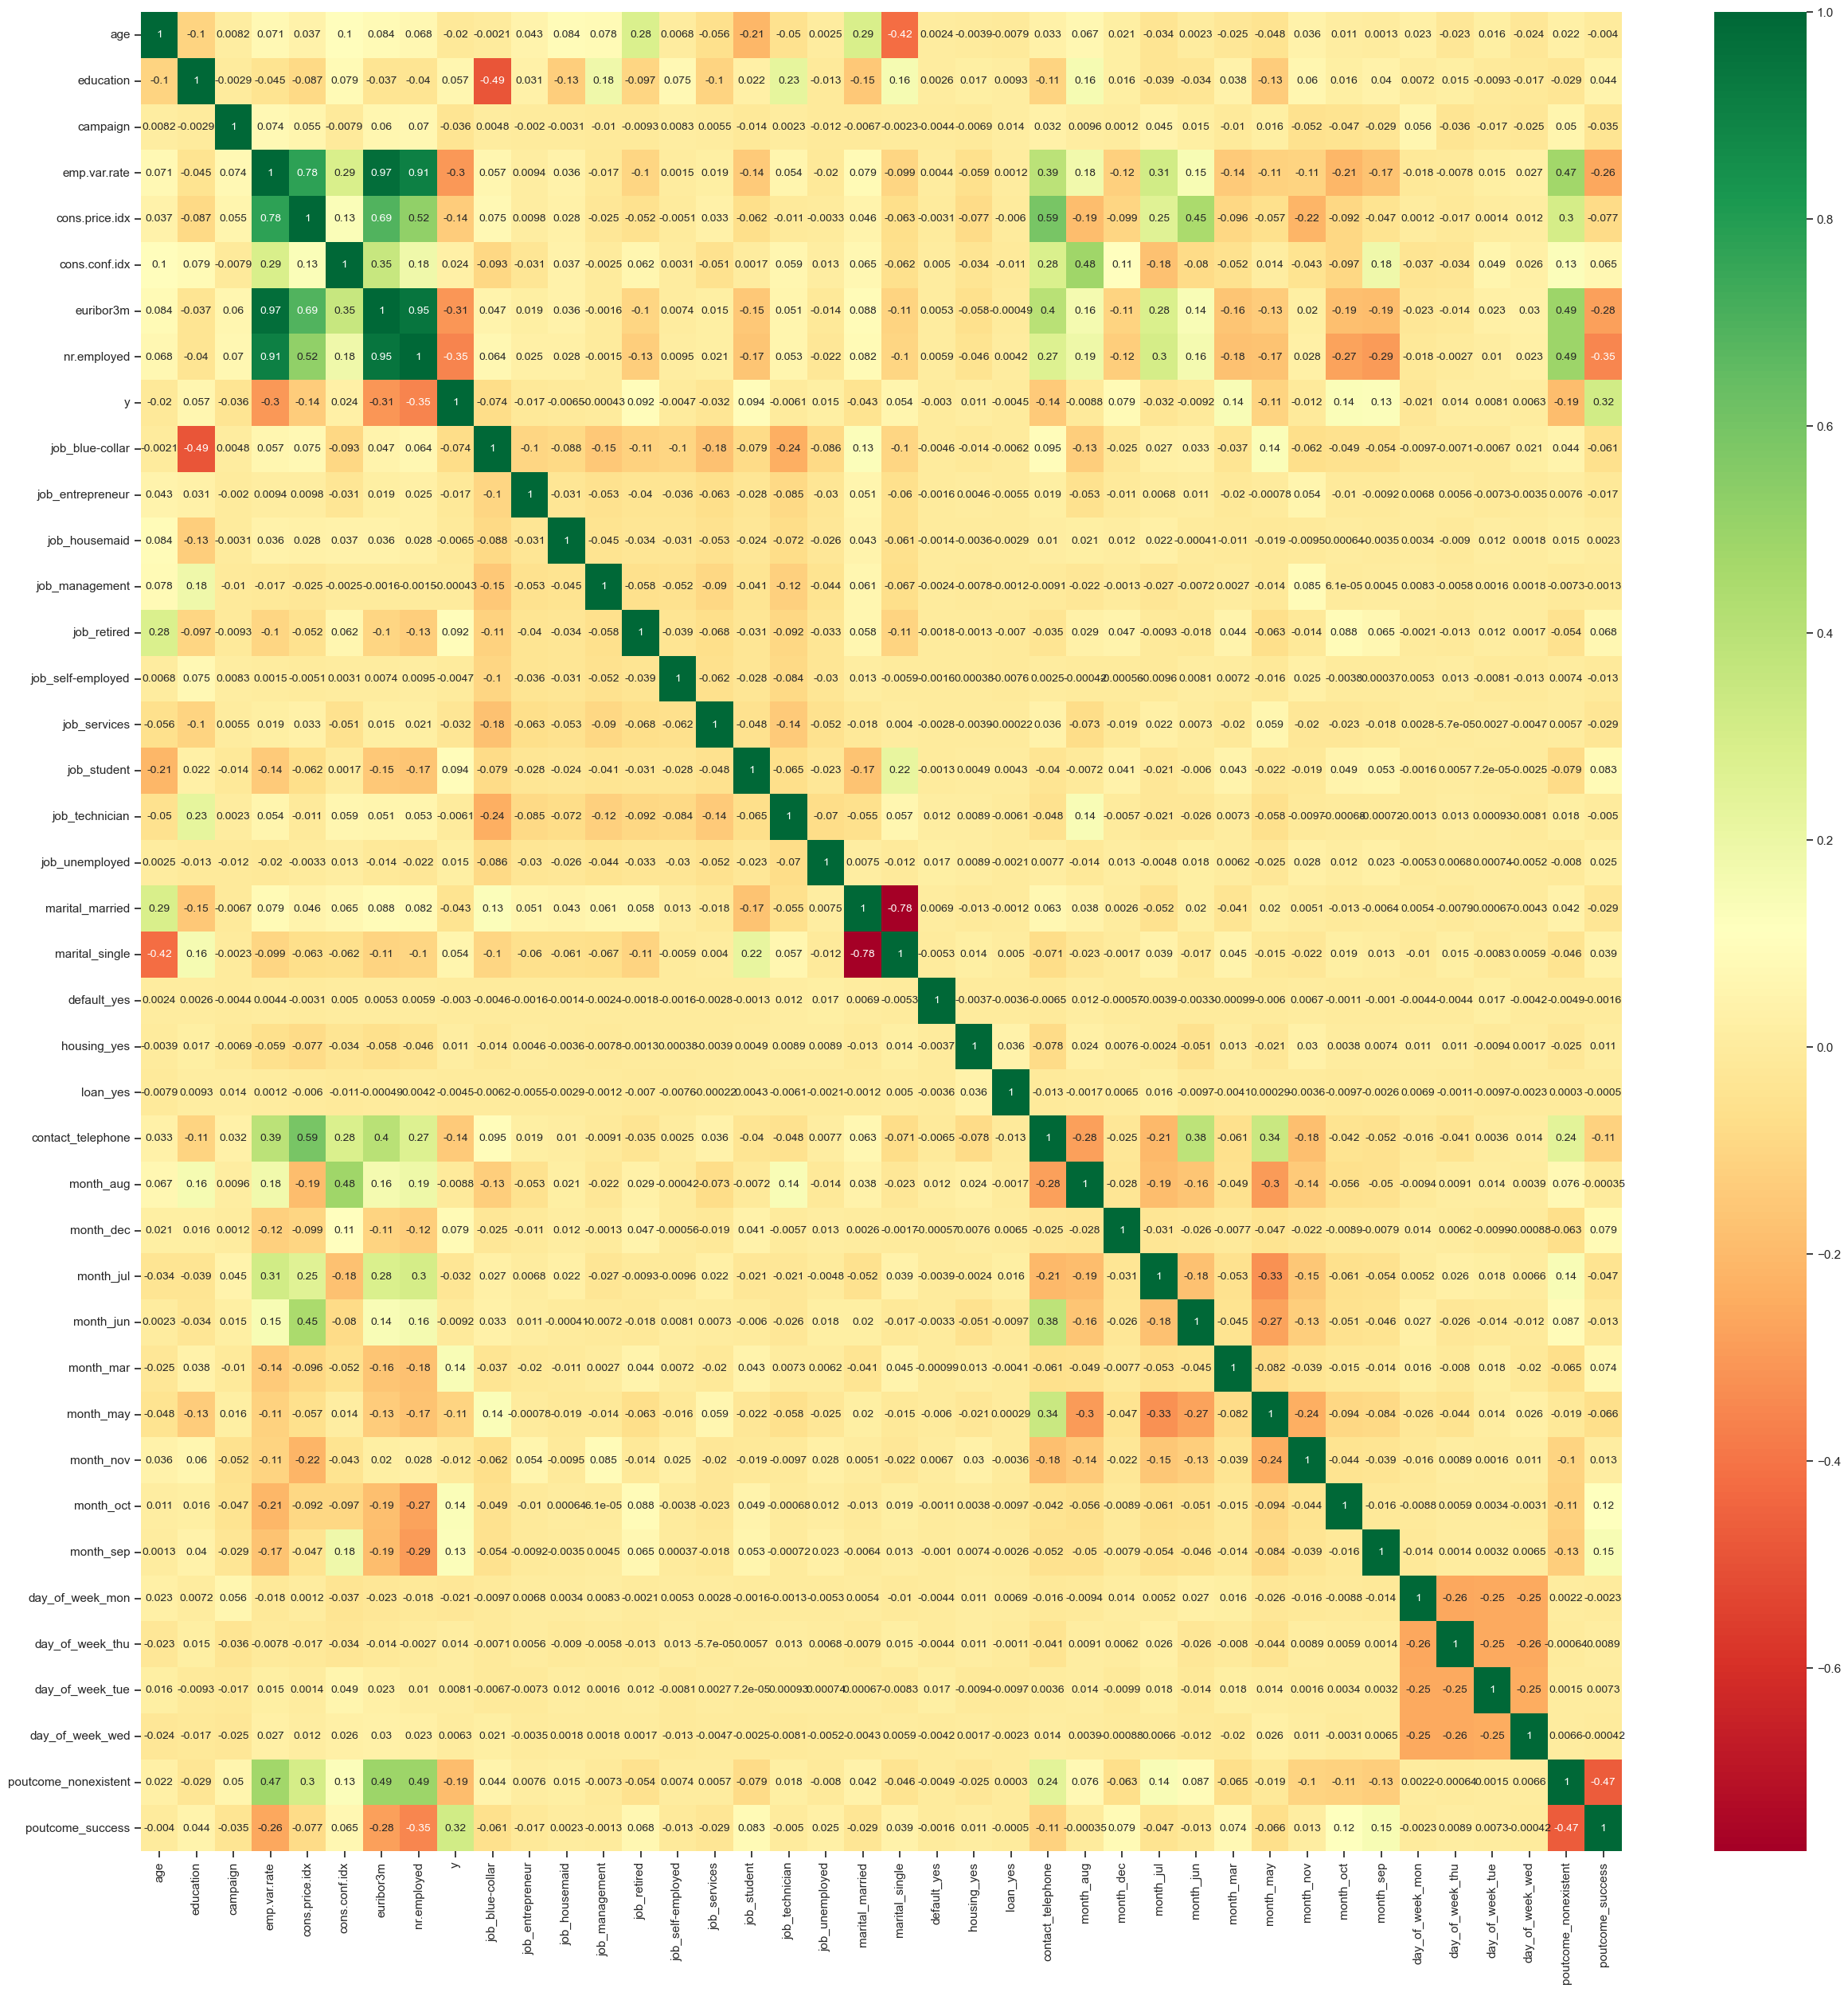

In [70]:
plt.figure(figsize = (30, 30))
l = ['previous', 'pdays', 'duration']
target_corr = df.drop(l, axis = 1).corr()
sns.heatmap(target_corr, annot = True, cmap = 'RdYlGn', annot_kws = {'size':10})
plt.show()

#### Feature selection:

In [71]:
pd.set_option('display.max_rows', None)

In [72]:
df.std()

age                     1.000012
education               2.081271
duration                1.000012
campaign                1.266288
pdays                   0.000000
previous                0.000000
emp.var.rate            1.570883
cons.price.idx          1.000012
cons.conf.idx           1.000012
euribor3m               1.000012
nr.employed             1.000012
y                       0.316184
job_blue-collar         0.417402
job_entrepreneur        0.184691
job_housemaid           0.158370
job_management          0.256848
job_retired             0.199959
job_self-employed       0.182538
job_services            0.295064
job_student             0.144219
job_technician          0.369974
job_unemployed          0.154984
marital_married         0.488385
marital_single          0.449417
default_yes             0.008535
housing_yes             0.497705
loan_yes                0.358772
contact_telephone       0.481516
month_aug               0.357066
month_dec               0.066337
month_jul 

In [73]:
y = df.y

We should drop both 'pdays' and 'previous' features because they have no variability, meaning all their values are the same. Including them won't improve the model and might even introduce noise and In order to make realistic Predictive model we will drop duration(clearly Mentioned in the Problem statement)

In [74]:
l2 = ['duration','pdays','previous','y']
x = df.drop(l2,axis = 1)

In [75]:
y = df.y

In [76]:
x.head()

age  education  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
0  1.706473          0         1           1.1        0.722628       0.968037   
1  1.810407          3         1           1.1        0.722628       0.968037   
2 -0.268276          3         1           1.1        0.722628       0.968037   
3  0.043526          1         1           1.1        0.722628       0.968037   
4  1.706473          3         1           1.1        0.722628       0.968037   

   euribor3m  nr.employed  job_blue-collar  job_entrepreneur  job_housemaid  \
0   0.712463     0.331695                0                 0              1   
1   0.712463     0.331695                0                 0              0   
2   0.712463     0.331695                0                 0              0   
3   0.712463     0.331695                0                 0              0   
4   0.712463     0.331695                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
1               0            0                  0             1            0   
2               0            0                  0             1            0   
3               0            0                  0             0            0   
4               0            0                  0             1            0   

   job_technician  job_unemployed  marital_married  marital_single  \
0               0               0                1               0   
1               0               0                1               0   
2               0               0                1               0   
3               0               0                1               0   
4               0               0                1               0   

   default_yes  housing_yes  loan_yes  contact_telephone  month_aug  \
0            0            0         0                  1          0   
1            0            0         0                  1          0   
2            0            1         0                  1          0   
3            0            0         0                  1          0   
4            0            0         1                  1          0   

   month_dec  month_jul  month_jun  month_mar  month_may  month_nov  \
0          0          0          0          0          1          0   
1          0          0          0          0          1          0   
2          0          0          0          0          1          0   
3          0          0          0          0          1          0   
4          0          0          0          0          1          0   

   month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0          0          0                1                0                0   
1          0          0                1                0                0   
2          0          0                1                0                0   
3          0          0                1                0                0   
4          0          0                1                0                0   

   day_of_week_wed  poutcome_nonexistent  poutcome_success  
0                0                     1                 0  
1                0                     1                 0  
2                0                     1                 0  
3                0                     1                 0  
4                0                     1                 0

### Model Building

In [77]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import f1_score,accuracy_score, recall_score,precision_score, classification_report, confusion_matrix

This will split your data x and target y into training and testing sets, with 75% of the data used for training and 25% for testing.
The stratify=y argument ensures that the class distribution in the target variable y is preserved in both the training and testing sets.
The random_state=42 argument sets the random seed for reproducibility.

In [78]:
smot = SMOTE(random_state=42)
x_sm, y_sm = smot.fit_resample(x,y)

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x_sm, y_sm, stratify=y_sm, test_size = 0.25, random_state = 42 )

In [80]:
x_test.shape, y_test.shape

((18269, 39), (18269,))

In [81]:
Counter(y_train)

Counter({1: 27403, 0: 27402})

##### DecisionTreeClassifier:

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dtree = DecisionTreeClassifier(random_state = 0)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [84]:
y_pred = dtree.predict(x_test)

In [85]:
tr_f1 = f1_score(y_test, y_pred)
tr_acc = accuracy_score(y_test, y_pred)
tr_recall = recall_score(y_test, y_pred)
tr_pre = precision_score(y_test, y_pred)

In [86]:
print("Decision_tree_classifier f1_score : {}".format(tr_f1))
print("......................................")
print("Decision_tree_classifier accuracy_score : {}".format(tr_acc))
print("...........................................")
print("Decision_tree_classifier recall_score : {}".format(tr_recall))
print("..........................................")
print("Decision_tree_classifier precision_score : {}".format(tr_pre))
print()

Decision_tree_classifier f1_score : 0.886212669438894
......................................
Decision_tree_classifier accuracy_score : 0.8846680168591603
...........................................
Decision_tree_classifier recall_score : 0.8982920954674841
..........................................
Decision_tree_classifier precision_score : 0.8744537994244911



#### Hyper parameter Tuinig for decision Tree:

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [88]:
params = {
    'criterion' :["gini", "entropy"],
    'splitter':["best", "random"],
    'max_depth':(list(range(1,30))),
    'min_samples_split' : [2,3,4],
    'min_samples_leaf':(list(range(1, 20)))
}
tune_dtree = DecisionTreeClassifier(random_state=42)
tree_clf= GridSearchCV(estimator=tune_dtree, param_grid=params, cv=5,verbose=1 ,scoring='f1', n_jobs=-1, refit=True)

In [89]:
%%time
# tree_clf.fit(x, y)
# tree_clf.fit(x_train,y_train)

CPU times: total: 0 ns
Wall time: 0 ns


In [90]:
# tree_clf.best_estimator_

In [91]:
# tree_clf.best_params_

In [92]:
clf_tree = DecisionTreeClassifier(criterion= 'gini',
 max_depth = 29,
 min_samples_leaf = 1,
 min_samples_split = 2,
 splitter = 'best')

In [93]:
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=29)

In [94]:
y_clf = clf_tree.predict(x_test)

In [95]:
tune_tree_f1 = f1_score(y_test, y_clf)
tune_tree_accuracy = accuracy_score(y_test, y_clf)
tune_tree_recall = recall_score(y_test, y_clf)
tune_tree_pre = precision_score(y_test, y_clf)

In [96]:
print("Tuned DecisionTreeClassifier f1_score : {}".format(tune_tree_f1))
print("..........................................")
print("Tuned DecisionTreeClassifier accuracy_score : {}".format(tune_tree_accuracy))
print("................................................")
print("Tuned DecisionTreeClassifier recall_score : {}".format(tune_tree_recall))
print("..............................................")
print("Tuned DecisionTreeClassifier precision_score : {}".format(tune_tree_pre))
print()

Tuned DecisionTreeClassifier f1_score : 0.8868851573889099
..........................................
Tuned DecisionTreeClassifier accuracy_score : 0.8853248672614812
................................................
Tuned DecisionTreeClassifier recall_score : 0.8991679439456974
..............................................
Tuned DecisionTreeClassifier precision_score : 0.8749334185575797



In [97]:
cr = classification_report(y_test, y_clf)
print("classifiaction_report of DecisionTreeClassifer:\n  {}".format(cr))

classifiaction_report of DecisionTreeClassifer:
                precision    recall  f1-score   support

           0       0.90      0.87      0.88      9135
           1       0.87      0.90      0.89      9134

    accuracy                           0.89     18269
   macro avg       0.89      0.89      0.89     18269
weighted avg       0.89      0.89      0.89     18269



#### Cross_Val_score  DecisionTreeClassifier:

In [98]:
score =  cross_val_score(dtree, x_sm, y_sm, cv = 3, scoring='f1')
print("Cross_val_score DecisionTreeClassifier score: {}".format(score))
print("...............................................")
print("Cross_val_score DecisionTreeClassifier score mean_value: {}".format(score.mean()))
print(".........................................................")
print("Cross_val_score DecisionTreeClassifier standardDeviation: {}".format(score.std()))

Cross_val_score DecisionTreeClassifier score: [0.56711529 0.65994032 0.6591532 ]
...............................................
Cross_val_score DecisionTreeClassifier score mean_value: 0.6287362683198363
.........................................................
Cross_val_score DecisionTreeClassifier standardDeviation: 0.04357379440986226


#### RandomForestClassifier :

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [101]:
y_hat = rf.predict(x_test)

In [102]:
rf_f1 = f1_score(y_test, y_hat)
rf_acc = accuracy_score(y_test, y_hat)
rf_recall = recall_score(y_test, y_hat)
rf_pre = precision_score(y_test, y_hat)

In [103]:
print("RandomForestClassifier f1_score : {}".format(rf_f1))
print("....................................")
print("RandomForestClassifier accuracy_score : {}".format(rf_acc))
print(".........................................")
print("RandomForestClassifier recall_score : {}".format(rf_recall))
print("........................................")
print("RandomForestClassifier precision_score : {}".format(rf_pre))
print()

RandomForestClassifier f1_score : 0.9193609944932121
....................................
RandomForestClassifier accuracy_score : 0.9190431879139526
.........................................
RandomForestClassifier recall_score : 0.923034814977009
........................................
RandomForestClassifier precision_score : 0.915716302813077



#### Hyper Parameter Tuning for RandomForestClassifier:

In [104]:
param = {
    'n_estimators' :[int(x) for x in np.linspace(100, 1900, num = 11)],
    'max_features' : ['auto','sqrt','log2',None],
    'ma_depth': [None] + [int(x) for x in np.linspace(10, 110, num= 11)],
    'min_samples_split' : [2,5,10,12],
    'min_samples_leaf': [1,2,4],
    'bootstrap' : [True, False]
}
rf = RandomForestClassifier()
# rf_vl = GridSearchCV(rf,param, cv=5, scoring='f1', verbose=3, refit=True, n_jobs=-1)

In [105]:
# rf_vl.fit(x_train, y_train)

In [106]:
# rf_vl.best_params_

In [107]:
rf_clf = RandomForestClassifier(max_depth =  50,
 max_features = 'sqrt',
 max_samples = 0.9,
 min_samples_leaf =  1,
 min_samples_split =  0.001,
 n_estimators =  400)

In [108]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, max_samples=0.9, min_samples_split=0.001,
                       n_estimators=400)

In [109]:
y_rf_clf = rf_clf.predict(x_test)

In [110]:
tune_rf_f1 = f1_score(y_test, y_rf_clf)
tune_rf_acc = accuracy_score(y_test, y_rf_clf)
tune_rf_recall = recall_score(y_test, y_rf_clf)
tune_rf_pre = precision_score(y_test, y_rf_clf)

In [111]:
print("RandomForestClassifier Tuned_f1_score : {}".format(tune_rf_f1))
print("....................................")
print("RandomForestClassifier Tuned_rf_acc : {}".format(tune_rf_acc))
print("....................................")
print("RandomForestClassifier Tuned_recall_score : {}".format(tune_rf_recall))
print("....................................")
print("RandomForestClassifier Tuned_precision_score : {}".format(tune_rf_pre))
print("....................................")
print()

RandomForestClassifier Tuned_f1_score : 0.8665307047360074
....................................
RandomForestClassifier Tuned_rf_acc : 0.8710383710110022
....................................
RandomForestClassifier Tuned_recall_score : 0.8373111451718853
....................................
RandomForestClassifier Tuned_precision_score : 0.8978633482038038
....................................



In [112]:
cr = classification_report(y_test, y_rf_clf)
print("classification_report of Tuned_RandomForestClassifier:\n  {}".format(cr))

classification_report of Tuned_RandomForestClassifier:
                precision    recall  f1-score   support

           0       0.85      0.90      0.88      9135
           1       0.90      0.84      0.87      9134

    accuracy                           0.87     18269
   macro avg       0.87      0.87      0.87     18269
weighted avg       0.87      0.87      0.87     18269



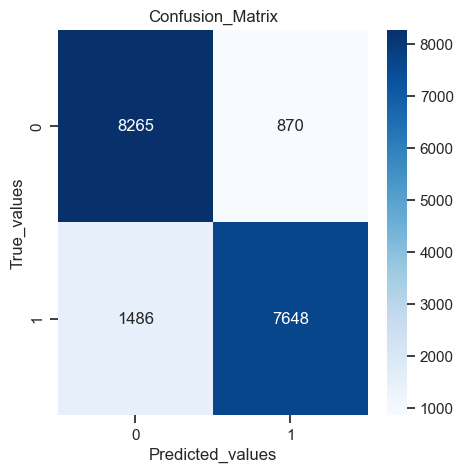

In [113]:
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, y_rf_clf),annot  = True,fmt = 'd',cmap='Blues' )
plt.title("Confusion_Matrix")
plt.xlabel("Predicted_values")
plt.ylabel("True_values")
plt.show()

#### Cross_val_score For RandomForestClassifier:

In [114]:
score =  cross_val_score(rf, x_sm, y_sm, cv = 3, scoring='f1')
print("Cross_val_score RandomForestClassifier score: {}".format(score))
print("...............................................")
print("Cross_val_score RandomForestClassifier score mean_value: {}".format(score.mean()))
print(".........................................................")
print("Cross_val_score RandomForestClassifier standardDeviation: {}".format(score.std()))

Cross_val_score RandomForestClassifier score: [0.59351841 0.66779968 0.66110146]
...............................................
Cross_val_score RandomForestClassifier score mean_value: 0.6408065182070531
.........................................................
Cross_val_score RandomForestClassifier standardDeviation: 0.033549371094286885


#### GBM:

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

In [116]:
gbc =GradientBoostingClassifier(n_estimators=400)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=400)

In [117]:
y_gb = gbc.predict(x_test)

In [118]:
gbm_f1= f1_score(y_test, y_gb)
gbm_acc = accuracy_score(y_test, y_gb)
gbm_recall = recall_score(y_test, y_gb)
gbm_pre = precision_score(y_test, y_gb)

In [119]:
print("GradientBoostingClassifier f1_score : {}".format(gbm_f1))
print("........................................")
print("GradientBoostingClassifier accuracy_score : {}".format(gbm_acc))
print("...............................................")
print("GradientBoostingClassifier recall_score : {}".format(gbm_recall))
print("............................................")
print("GradientBoostingClassifier Precision_score : {}".format(gbm_pre))
print()

GradientBoostingClassifier f1_score : 0.90925336460602
........................................
GradientBoostingClassifier accuracy_score : 0.9110515080190487
...............................................
GradientBoostingClassifier recall_score : 0.8912853076417779
............................................
GradientBoostingClassifier Precision_score : 0.9279607887837684



In [120]:
cr = classification_report(y_test, y_gb)
print("GradientBoostingClassifier  classification_report:\n  {}".format(cr))

GradientBoostingClassifier  classification_report:
                precision    recall  f1-score   support

           0       0.90      0.93      0.91      9135
           1       0.93      0.89      0.91      9134

    accuracy                           0.91     18269
   macro avg       0.91      0.91      0.91     18269
weighted avg       0.91      0.91      0.91     18269



CPU times: total: 93.8 ms
Wall time: 178 ms


Text(29.75, 0.5, 'Actual_values')

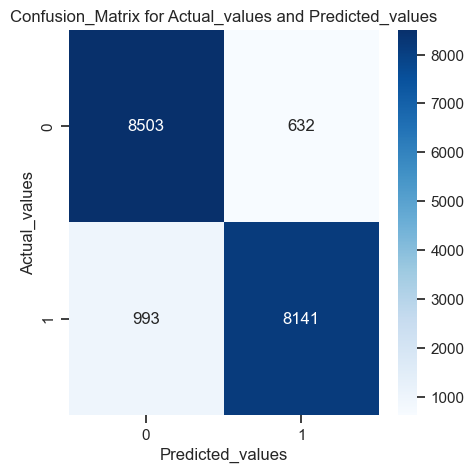

In [121]:
%%time
plt.figure(figsize = (5, 5))
cm =confusion_matrix(y_test, y_gb)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Confusion_Matrix for Actual_values and Predicted_values")
plt.xlabel("Predicted_values")
plt.ylabel("Actual_values")

#### Hyperparameter GradientBoostingClassifier:

In [122]:
# xgb  = GradientBoostingClassifier()
# params = {
#     'learning_rate': [0.1,0.01,0.001],
#     'n_estimators' : [100, 200, 300],
#     'max_depth':[3,5,7],
#     'min_samples_split':[2,5,10],
#     'min_samples_leaf':[1,2,4],
#     'subsample':[0.8, 0.9, 1.0],
#     'max_features': ['sqrt','log2'],
#     'random_state':[42]
# }

In [123]:
# grid_cv = GridSearchCV(estimator=gb, param_grid=params, cv=5, scoring='f1', verbose=2, n_jobs=-1 , refit=True)
# grid_cv.fit(x_smot, y_smot)

In [124]:
gb = GradientBoostingClassifier()
params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42]
}

grid_cv = RandomizedSearchCV(estimator=gb, param_distributions=params, cv=5, n_iter=100, scoring='f1',verbose=3, random_state=10)
# grid_cv.fit(x_train, y_train)

In [125]:
# grid_cv.best_params_

In [126]:
# gbc = GradientBoostingClassifier(subsample = 1.0,
#  random_state = 42,
#  n_estimators =300,
#  min_samples_split = 2,
#  min_samples_leaf = 1,
#  max_features = 'log2',
#  max_depth = 7,
#  learning_rate = 0.1)

In [127]:
# grid_cv.best_score_

In [128]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=400)

In [129]:
y_gbc = gbc.predict(x_test)

In [130]:
gbc_f1 = f1_score(y_test, y_gbc)
gbc_acc = accuracy_score(y_test, y_gbc)
gbc_recall = recall_score(y_test, y_gbc)
gbc_pre = precision_score(y_test, y_gbc)

In [131]:
print("GradientBoostingClassifier f1_score : {}".format(gbc_f1))
print("......................................")
print("GradientBoostingClassifier accuracy_score : {}".format(gbc_acc))
print("......................................")
print("GradientBoostingClassifier recall_score : {}".format(gbc_recall))
print("......................................")
print("GradientBoostingClassifier precision_score : {}".format(gbc_pre))
print("......................................")
print()

GradientBoostingClassifier f1_score : 0.90925336460602
......................................
GradientBoostingClassifier accuracy_score : 0.9110515080190487
......................................
GradientBoostingClassifier recall_score : 0.8912853076417779
......................................
GradientBoostingClassifier precision_score : 0.9279607887837684
......................................



In [132]:
cr = classification_report(y_test, y_gb)
print("classification_report of GradientBoostingClassifier:\n  {}".format(cr))

classification_report of GradientBoostingClassifier:
                precision    recall  f1-score   support

           0       0.90      0.93      0.91      9135
           1       0.93      0.89      0.91      9134

    accuracy                           0.91     18269
   macro avg       0.91      0.91      0.91     18269
weighted avg       0.91      0.91      0.91     18269



CPU times: total: 141 ms
Wall time: 230 ms


Text(29.75, 0.5, 'Actual_values')

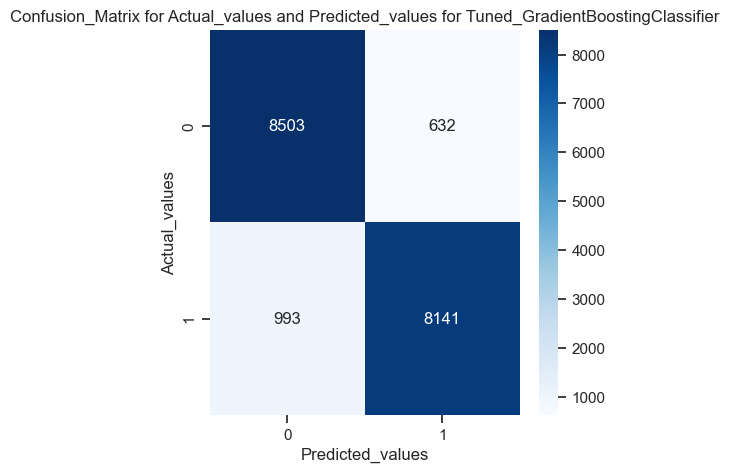

In [133]:
%%time
plt.figure(figsize = (5, 5))
cm =confusion_matrix(y_test, y_gbc)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Confusion_Matrix for Actual_values and Predicted_values for Tuned_GradientBoostingClassifier")
plt.xlabel("Predicted_values")
plt.ylabel("Actual_values")

#### Cross_val_Score of GradientboostingClassifier:

In [134]:
score =  cross_val_score(gbc, x, y, cv = 3, scoring='f1')
print("Cross_val_score GradientboostingClassifier score: {}".format(score))
print("...............................................")
print("Cross_val_score GradientboostingClassifier score mean_value: {}".format(score.mean()))
print(".........................................................")
print("Cross_val_score GradientboostingClassifier standardDeviation: {}".format(score.std()))

Cross_val_score GradientboostingClassifier score: [0.         0.         0.20998302]
...............................................
Cross_val_score GradientboostingClassifier score mean_value: 0.06999434069043577
.........................................................
Cross_val_score GradientboostingClassifier standardDeviation: 0.09898694589377725


##### BaggingClassifier:

In [135]:
from sklearn.ensemble import BaggingClassifier

In [136]:
bs = RandomForestClassifier(random_state=1)
bg_model = BaggingClassifier(estimator=bs, random_state=42)

In [137]:
%%time
bg_model.fit(x_train, y_train)

CPU times: total: 1min 7s
Wall time: 1min 15s


BaggingClassifier(estimator=RandomForestClassifier(random_state=1),
                  random_state=42)

In [138]:
y_br = bg_model.predict(x_test)

In [139]:
bagg_f1 = f1_score(y_test, y_br)
bagg_acc = accuracy_score(y_test, y_br)
bagg_recall = recall_score(y_test, y_br)
bagg_pre = precision_score(y_test, y_br)

In [140]:
print("BaggingClassifier f1_score {}".format(bagg_f1))
print("............................")
print("BaggingClassifier accuracy_score {}".format(bagg_acc))
print("............................")
print("BaggingClassifier recall_score {}".format(bagg_recall))
print("............................")
print("BaggingClassifier precision_score {}".format(bagg_pre))
print("............................")
print()

BaggingClassifier f1_score 0.9145657500680644
............................
BaggingClassifier accuracy_score 0.9141168098965461
............................
BaggingClassifier recall_score 0.9194219400043793
............................
BaggingClassifier precision_score 0.9097605893186004
............................



In [141]:
cr = classification_report(y_test, y_br)
print("Classification_report of Bagging Classifier:\n  {}".format(cr))

Classification_report of Bagging Classifier:
                precision    recall  f1-score   support

           0       0.92      0.91      0.91      9135
           1       0.91      0.92      0.91      9134

    accuracy                           0.91     18269
   macro avg       0.91      0.91      0.91     18269
weighted avg       0.91      0.91      0.91     18269



CPU times: total: 46.9 ms
Wall time: 209 ms


Text(29.75, 0.5, 'Actual_values')

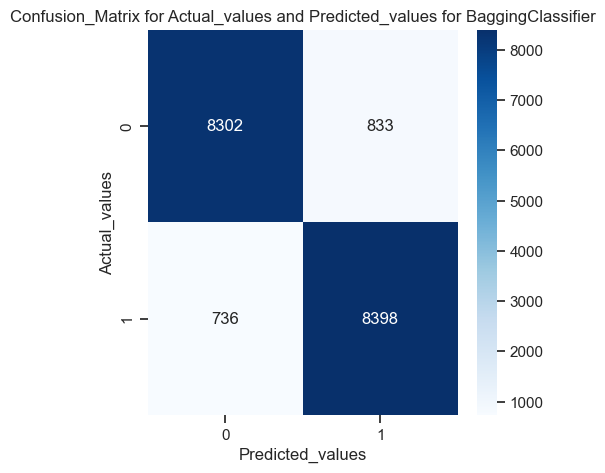

In [142]:
%%time
plt.figure(figsize = (5, 5))
cm =confusion_matrix(y_test, y_br)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Confusion_Matrix for Actual_values and Predicted_values for BaggingClassifier")
plt.xlabel("Predicted_values")
plt.ylabel("Actual_values")

#### cross_val_score for Baggingclassifier :

In [143]:
score =  cross_val_score(bg_model, x_sm, y_sm, cv = 3, scoring='f1')
print("Cross_val_score Baggingclassifier score: {}".format(score))
print("...............................................")
print("Cross_val_score Baggingclassifier score mean_value: {}".format(score.mean()))
print(".........................................................")
print("Cross_val_score Baggingclassifier standardDeviation: {}".format(score.std()))

Cross_val_score Baggingclassifier score: [0.59767756 0.66860482 0.65705209]
...............................................
Cross_val_score Baggingclassifier score mean_value: 0.6411114884796668
.........................................................
Cross_val_score Baggingclassifier standardDeviation: 0.031072455683804547


Cross-validation scores for the BaggingClassifier show how well the model generalizes to unseen data: around 62.7%, 69.9%, and 67.1% of accuracy across different folds. The average score, approximately 66.6%, indicates the overall performance. The standard deviation, roughly 2.97%, reflects the consistency of the model's performance, with lower values suggesting more stable predictions.

### KNNClassifier:

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [145]:
# error_rate = []
# for i in range(1, 11):
#     Knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(x_train, y_train)
#     pred = knn.predict(x_test)
#     error_rate.append(np.mean(pred != y_test))

# error_rate

## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [146]:
error_rate

[0.1345995949422519,
 0.13503749521046582,
 0.15129454266790737,
 0.14467130111117193,
 0.16185888663856807,
 0.1549072198806722,
 0.17198533034101485,
 0.1630083748426296,
 0.17674749575784116,
 0.1683179155947233]

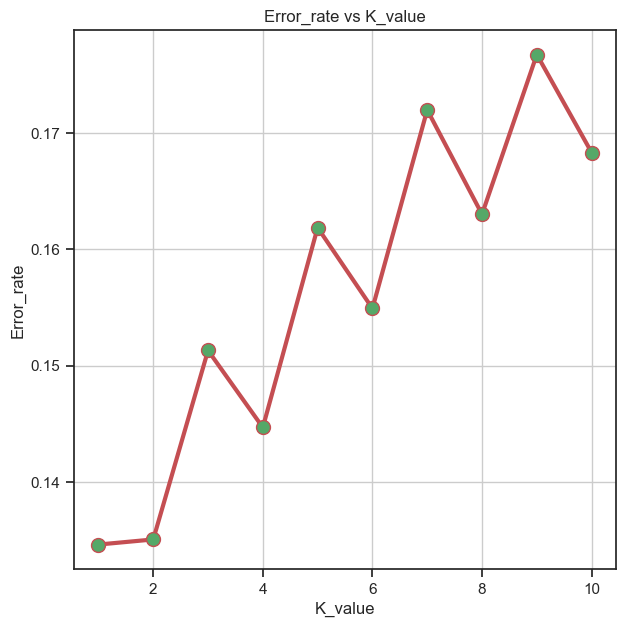

In [147]:
plt.figure(figsize = (7, 7))
plt.plot(range(1, 11),error_rate,  color='r', linestyle='-',linewidth = 3,
         marker='o',markerfacecolor='g', markersize=10)

plt.title("Error_rate vs K_value")
plt.xlabel("K_value")
plt.ylabel("Error_rate")
plt.grid()
plt.show()

In [148]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [149]:
y_kn = knn.predict(x_test)

In [150]:
knn_f1 = f1_score(y_test, y_kn)
knn_acc = accuracy_score(y_test, y_kn)
knn_recall = recall_score(y_test, y_kn)
knn_pre = precision_score(y_test, y_kn)

In [151]:
print("KNeighborsClassifier f1_score : {}".format(knn_f1))
print("..................................")
print("KNeighborsClassifier accuracy_score : {}".format(knn_acc))
print("..................................")
print("KNeighborsClassifier recall_score : {}".format(knn_recall))
print("..................................")
print("KNeighborsClassifier precision_score : {}".format(knn_pre))
print("..................................")
print()

KNeighborsClassifier f1_score : 0.8433599918496256
..................................
KNeighborsClassifier accuracy_score : 0.8316820844052767
..................................
KNeighborsClassifier recall_score : 0.9062842128311802
..................................
KNeighborsClassifier precision_score : 0.7886062684576546
..................................



In [152]:
cr = classification_report(y_test, y_kn)
print("KNeighborsClassifier classification_report:\n   {}".format(cr))

KNeighborsClassifier classification_report:
                 precision    recall  f1-score   support

           0       0.89      0.76      0.82      9135
           1       0.79      0.91      0.84      9134

    accuracy                           0.83     18269
   macro avg       0.84      0.83      0.83     18269
weighted avg       0.84      0.83      0.83     18269



CPU times: total: 31.2 ms
Wall time: 196 ms


Text(29.75, 0.5, 'Actual_values')

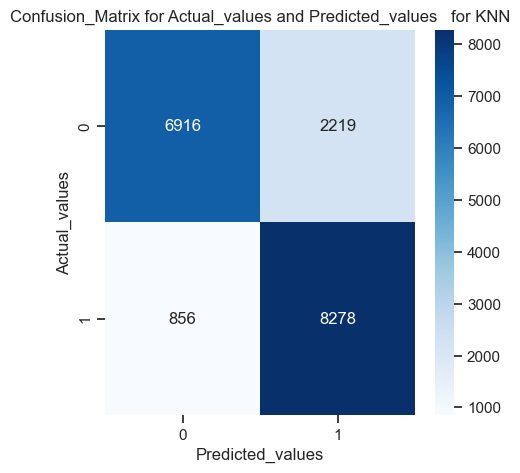

In [153]:
%%time
plt.figure(figsize = (5, 5))
cm =confusion_matrix(y_test, y_kn)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Confusion_Matrix for Actual_values and Predicted_values   for KNN")
plt.xlabel("Predicted_values")
plt.ylabel("Actual_values")

#### AdaBoostClassifier:

In [154]:
from sklearn.ensemble import AdaBoostClassifier

In [155]:
ad = AdaBoostClassifier(n_estimators=300)

In [156]:
ad.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=300)

In [157]:
y_ad= ad.predict(x_test)

In [158]:
ad_f1 = f1_score(y_test, y_ad)
ad_acc =accuracy_score(y_test, y_ad)
ad_recall = recall_score(y_test,y_ad)
ad_pre = precision_score(y_test, y_ad)

In [159]:
print("AdaBoostClassifier f1_score : {}".format(ad_f1))
print("...............................")
print("AdaBoostClassifier accuracy_score : {}".format(ad_acc))
print("...............................")
print("AdaBoostClassifier recall_score : {}".format(ad_recall))
print("...............................")
print("AdaBoostClassifier precision_score : {}".format(ad_pre))
print("...............................")
print()

AdaBoostClassifier f1_score : 0.8309243697478992
...............................
AdaBoostClassifier accuracy_score : 0.8348021238163008
...............................
AdaBoostClassifier recall_score : 0.8119115393037004
...............................
AdaBoostClassifier precision_score : 0.8508490133088573
...............................



In [160]:
cr = classification_report(y_test, y_ad)
print("Classification_report for AdaBoostClassifier:\n  {}".format(cr))

Classification_report for AdaBoostClassifier:
                precision    recall  f1-score   support

           0       0.82      0.86      0.84      9135
           1       0.85      0.81      0.83      9134

    accuracy                           0.83     18269
   macro avg       0.84      0.83      0.83     18269
weighted avg       0.84      0.83      0.83     18269



CPU times: total: 78.1 ms
Wall time: 162 ms


Text(29.75, 0.5, 'Actual_values')

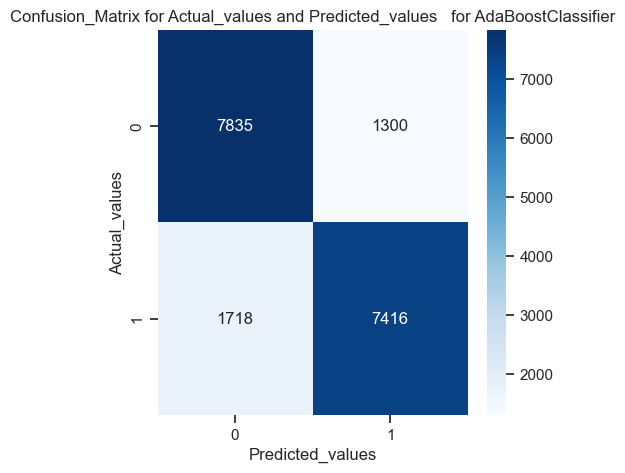

In [161]:
%%time
plt.figure(figsize = (5, 5))
cm =confusion_matrix(y_test, y_ad)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Confusion_Matrix for Actual_values and Predicted_values   for AdaBoostClassifier")
plt.xlabel("Predicted_values")
plt.ylabel("Actual_values")

#### XGBoost:

In [162]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [163]:
xg = XGBClassifier()

In [164]:
%%time
xg.fit(x_train, y_train)

CPU times: total: 19.8 s
Wall time: 2.94 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [165]:
y_xg  = xg.predict(x_test)

In [166]:
f1_score(y_test, y_xg)

0.9317309297279252

##### Hyper Parameter For XGBClassifier:

In [167]:
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]
             }

XGB = XGBClassifier(random_state = 42, verbosity = 0, silent = 0)
xg_clf = RandomizedSearchCV(estimator=XGB,param_distributions=param_grid,verbose=2,scoring='f1' ,cv=5,random_state=42)

In [168]:
# %%time
# xg_clf.fit(x_train, y_train)

In [169]:
# xg_clf.best_score_

In [170]:
# xg_clf.best_params_

In [171]:
# plot_importance(xg_clf.best_estimator_)

In [172]:
xgb_clf = XGBClassifier(reg_lambda= 6.4,
 reg_alpha = 1.6,
 n_estimators = 150,
 max_depth  = 13,
 learning_rate = 0.03,
 gamma= 1.)

In [173]:
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [174]:
y_xgb_clf = xgb_clf.predict(x_test)

In [175]:
tune_xgb_f1 = f1_score(y_test, y_xgb_clf)
tune_xgb_acc = accuracy_score(y_test, y_xgb_clf)
tune_xgb_recall = recall_score(y_test, y_xgb_clf)
tune_xgb_precision = precision_score(y_test, y_xgb_clf)

In [176]:
print("Tuned_XGBC_f1_score:  {}".format(tune_xgb_f1))
print("........................")
print("Tuned_XGBC_accuracy_score : {}".format(tune_xgb_acc))
print(".............................")
print("Tuned_XGBC_recall_score:  {}".format(tune_xgb_recall))
print("............................")
print("Tuned_XGBC_precision_score : {}".format(tune_xgb_precision))

Tuned_XGBC_f1_score:  0.9044515014764055
........................
Tuned_XGBC_accuracy_score : 0.9061251300016421
.............................
Tuned_XGBC_recall_score:  0.8886577622071382
............................
Tuned_XGBC_precision_score : 0.9208167895632444


In [177]:
cr = classification_report(y_test, y_xgb_clf)
print("Classification_report of XGBClassifier:\n  {}".format(cr))

Classification_report of XGBClassifier:
                precision    recall  f1-score   support

           0       0.89      0.92      0.91      9135
           1       0.92      0.89      0.90      9134

    accuracy                           0.91     18269
   macro avg       0.91      0.91      0.91     18269
weighted avg       0.91      0.91      0.91     18269



### Logistic Regression:

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
lr = LogisticRegression(random_state=1)

In [180]:
lr.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [181]:
y_lr = lr.predict(x_test)

In [182]:
lr_f1 = f1_score(y_test,y_lr)
lr_acc = accuracy_score(y_test,y_lr)
lr_recall = recall_score(y_test, y_lr)
lr_pre= precision_score(y_test, y_lr)

In [183]:
print("Logisticregresion f1_score : {}".format(lr_f1))
print("..............................")
print("Logisticregresion accuracy_score : {}".format(lr_acc))
print("..............................")
print("Logisticregresion recall_score : {}".format(lr_recall))
print("..............................")
print("Logisticregresion Precision_score : {}".format(lr_pre))
print("..............................")

Logisticregresion f1_score : 0.7857021853294937
..............................
Logisticregresion accuracy_score : 0.7922710602660245
..............................
Logisticregresion recall_score : 0.7616597328662141
..............................
Logisticregresion Precision_score : 0.8113119533527697
..............................


In [184]:
cr = classification_report(y_test, y_lr)
print("Classification_report:\n    {}".format(cr))

Classification_report:
                  precision    recall  f1-score   support

           0       0.78      0.82      0.80      9135
           1       0.81      0.76      0.79      9134

    accuracy                           0.79     18269
   macro avg       0.79      0.79      0.79     18269
weighted avg       0.79      0.79      0.79     18269



#### SVM:

In [185]:
from sklearn.svm import SVC

In [186]:
sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [187]:
y_sv = sv.predict(x_test)

In [188]:
f1_score(y_test, y_sv)

0.7966024915062287

#### Hyper Parameters for SVM:

In [189]:
param = {
    'C':[0.1, 5, 10, 50 ,60, 70],
    'gamma':[1,0.1,0.01, 0.001,0.0001],
    'random_state' : (list(range(1,20)))
}
sv_cv =RandomizedSearchCV(estimator=sv,param_distributions=param, scoring='f1', verbose=2, cv=5,n_iter = 100, refit=True)

In [190]:
# sv_cv.fit(x_train, y_train)
# sv_cv.best_params_

In [191]:
sv = SVC(C=70, gamma=0.001,random_state=42)

In [192]:
sv.fit(x_train, y_train)

SVC(C=70, gamma=0.001, random_state=42)

In [193]:
y_sv_tune = sv.predict(x_test)

In [194]:
sv_tune_f1 = f1_score(y_test, y_sv_tune)
sv_tune_acc = accuracy_score(y_test, y_sv_tune)
sv_tune_recall = recall_score(y_test, y_sv_tune)
sv_tune_pre = precision_score(y_test, y_sv_tune)

In [195]:
print("SVC tuned_f1_score : {}".format(sv_tune_f1))
print(".......................")
print("SVC tuned_accuracy_score : {}".format(sv_tune_acc))
print(".......................")
print("SVC tuned_recall_score : {}".format(sv_tune_recall))
print(".......................")
print("SVC tuned_precision_score : {}".format(sv_tune_pre))
print(".......................")

SVC tuned_f1_score : 0.7908215297450425
.......................
SVC tuned_accuracy_score : 0.7979090262192785
.......................
SVC tuned_recall_score : 0.7640683161813007
.......................
SVC tuned_precision_score : 0.8195162047909816
.......................


### Complete Analysis Overview and Model comparison report :

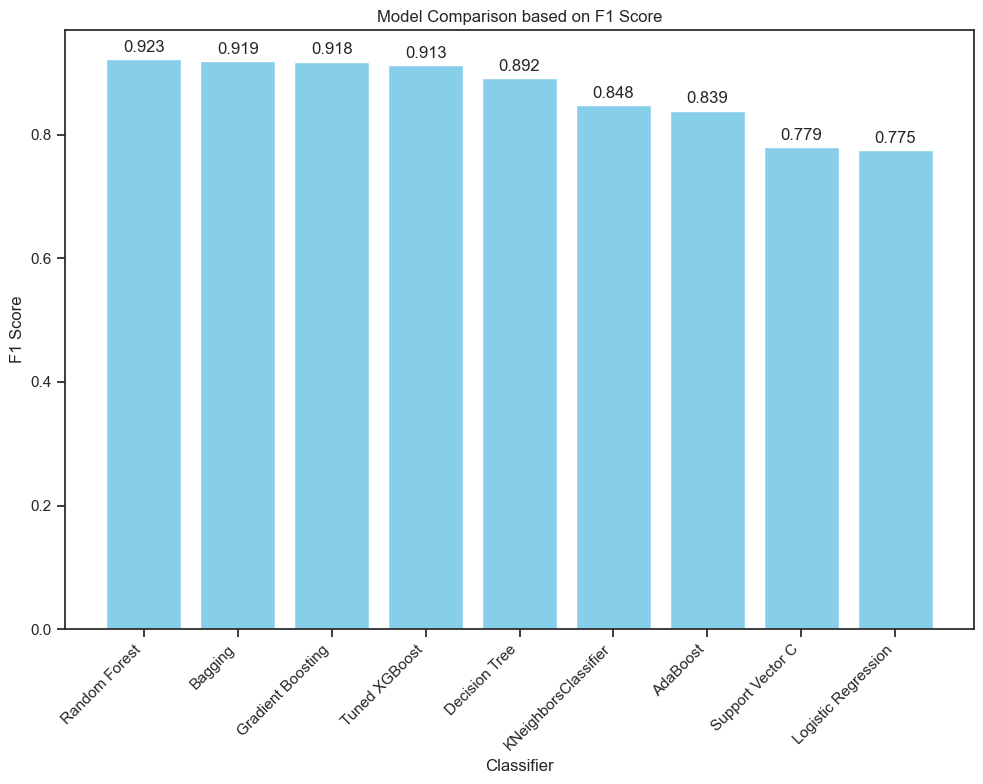

In [198]:
# Your scores dictionary
scores = {
    'Classifier': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Bagging', 'AdaBoost', 'Tuned XGBoost', 'Logistic Regression', 'Support Vector C', 'KNeighborsClassifier'],
    'F1 Score': [0.8917631778330988, 0.9228083574273089, 0.9183570829840738, 0.9192722518792897, 0.8390889052167524, 0.9129998886042108, 0.774533703724701, 0.779407724850283, 0.848384424192212]
}

# Creating DataFrame from scores
scores_df = pd.DataFrame(scores)

# Sorting the DataFrame by F1 Score in descending order
scores_df = scores_df.sort_values(by='F1 Score', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
bars = plt.bar(scores_df['Classifier'], scores_df['F1 Score'], color='skyblue')

# Adding annotations to each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.title('Model Comparison based on F1 Score')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Suggestion to Bank Market Team  :


Based on the analysis of categorical and numerical features, here are some suggestions for the bank's marketing team to improve customer subscription rates for their product:

1. **Target Marketing Segmentation**: Utilize insights from categorical variables such as job, marital status, education, and contact method to segment customers effectively. Tailor marketing messages and offers based on these segments to increase relevance and engagement.

2. **Focus on High-Performing Groups**: Target married individuals, those with university degrees, and retired individuals, as they have shown relatively higher subscription rates. Develop personalized campaigns and incentives to further encourage these groups to subscribe.

3. **Optimize Contact Strategies**: Prioritize cellular communication channels, as they have shown higher subscription rates compared to telephone. Implement targeted and strategic communication schedules, considThursdayhe day of the weeMarch, May, June, July and December month when clients are more likely to respond positively.

4. **Enhance Previous Campaign Strategies**: Leverage insights from previous campaign outcomes (poutcome) to refine future strategies. Clients with successful outcomes from previous campaigns have shown higher subscription rates, indicating the potential for re-engagement. Tailor offers and communication to these clients based on their past responses.

5. **Improve Duration of Contact**: Given the positive correlation between call duration and subscription rates, focus on extending the duration of interactions with clients during marketing calls. Train agents to engage clients effectively, address their concerns, and highlight the benefits of the product to increase subscription likelihood.

6. **Offer Competitive Interest Rates**: Given the negative correlation between Euribor 3-month rates and subscription rates, consider offering competitive interest rates or other financial incentives to attract clients during periods of lower Euribor rates.

7. **Streamline Campaign Processes**: Simplify the subscription process and ensure clear communication of product features, benefits, and terms to potential clients. Provide easy-to-understand information and streamline administrative procedures to reduce friction and encourage more subscriptions.

By implementing these suggestions, the bank's marketing team can optimize their strategies, effectively target potential clients, and ultimately increase subscription rates for their product.

#### Suggestions for Stakeholders:
Based on the performance metrics, we recommend considering the following two models:

Random Forest: With the highest F1 score of 0.9228, Random Forest offers excellent overall performance across all metrics, including accuracy, recall, and precision. It's a robust ensemble method that handles complex datasets well and reduces the risk of overfitting.

Gradient Boosting & BaggingClassifier: With a slightly lower but still strong F1 score of 0.9184, Gradient Boosting provides high accuracy and precision while maintaining a good balance between recall and precision. It's particularly effective in improving predictive performance through sequential learning and gradient descent optimization.

# Final Conclusion 

*The addition of 5 additional social and economic features did not impact prediction acccuracy for all the algorithms except for SVM. SVM did much better with limited features (dataset-full) when compared with the dataset with more  robust features (dataset-addtional-full)*